#Importing Libraries and Datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train

,Id,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,0,2033-03-01,159.271109,167.221488,157.380478,161.915062,160.167043,40490589,Company_0
1,1,2033-03-01,114.571843,114.409664,112.921505,113.066659,87.844722,8592865,Company_1
2,2,2033-03-01,50.984499,51.262529,50.266272,50.094499,49.329834,25085661,Company_2
3,3,2033-03-01,98.585428,99.988079,97.867719,98.811966,91.784469,823271,Company_3
4,4,2033-03-01,8874.646107,8935.704765,8811.247764,8873.173069,8407.389386,609369,Company_4
...,...,...,...,...,...,...,...,...,...
7411,7411,2038-02-28,104.074758,104.325097,102.299154,102.070115,95.938421,17617907,Company_1
7412,7412,2038-02-28,6.825210,7.378966,6.536319,6.484569,6.664250,67725048,Company_2
7413,7413,2038-02-28,96.702497,102.527327,96.123058,101.977618,100.731773,5257824,Company_3
7414,7414,2038-02-28,8650.533559,8709.103373,8604.908934,8623.897896,8543.781858,370998,Company_4


In [ ]:
train.describe()

,Id,Open,High,Low,Close,Adj Close,Volume
count,7416.000000,7416.000000,7416.000000,7416.000000,7416.000000,7416.000000,7.416000e+03
mean,3707.500000,1322.970742,1338.768595,1305.328823,1321.298741,1280.440414,3.975197e+07
std,2140.959131,2777.109807,2808.083803,2742.046008,2773.452166,2698.389268,1.102362e+08
min,0.000000,2.564008,2.507671,2.407399,2.358517,2.527507,1.277000e+03
25%,1853.750000,56.270001,57.199683,55.096529,55.836524,50.836902,1.034437e+06
50%,3707.500000,109.799270,111.421736,107.923378,109.613059,91.488025,6.081018e+06
75%,5561.250000,164.955953,167.238755,163.383748,165.097484,158.495970,2.029659e+07
max,7415.000000,9853.304141,9929.409504,9724.918827,9832.117608,9438.189612,1.073742e+09


In [ ]:
# checking for missing values
train.isna().sum()

Id           0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

In [ ]:
# Understanding the data better
train.corr()

<ipython-input-6-d1053354c8fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Id,Open,High,Low,Close,Adj Close,Volume
Id,1.000000,0.013821,0.013974,0.014024,0.014048,0.021705,0.064501
Open,0.013821,1.000000,0.999904,0.999916,0.999822,0.999668,-0.164996
High,0.013974,0.999904,1.000000,0.999873,0.999932,0.999790,-0.165058
Low,0.014024,0.999916,0.999873,1.000000,0.999913,0.999758,-0.164926
Close,0.014048,0.999822,0.999932,0.999913,1.000000,0.999854,-0.164993
Adj Close,0.021705,0.999668,0.999790,0.999758,0.999854,1.000000,-0.164522
Volume,0.064501,-0.164996,-0.165058,-0.164926,-0.164993,-0.164522,1.000000


## Pivoting the data
Pivoting the data so that all the data is organized through dates.

In [ ]:
# Pivot the DataFrame
df1 = train.pivot(index='Date', columns='Company', values=['Open', 'High', 'Low', 'Close' , 'Adj Close', 'Volume','Id'])
df2 = test.pivot(index='Date', columns='Company', values=['Id'])

# Flatten the MultiIndex columns
df1.columns = ['_'.join(col).strip() for col in df1.columns.values]
df2.columns = ['_'.join(col).strip() for col in df2.columns.values]

# Reset index for better structure
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

# Display the result
df1.head()

,Date,Open_Company_0,Open_Company_1,Open_Company_2,Open_Company_3,Open_Company_4,Open_Company_5,High_Company_0,High_Company_1,High_Company_2,...,Volume_Company_2,Volume_Company_3,Volume_Company_4,Volume_Company_5,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,2033-03-01,159.271109,114.571843,50.984499,98.585428,8874.646107,136.430652,167.221488,114.409664,51.262529,...,25085661.0,823271.0,609369.0,2576112.0,0.0,1.0,2.0,3.0,4.0,5.0
1,2033-03-05,158.049337,113.266631,50.534860,99.338531,8867.074823,135.100632,167.347904,113.161314,49.383999,...,15073917.0,830714.0,388180.0,3945470.0,6.0,7.0,8.0,9.0,10.0,11.0
2,2033-03-06,163.686732,110.756424,49.838053,97.339020,8855.832360,137.119321,167.057890,112.339453,50.240192,...,16314199.0,1287970.0,543686.0,6137704.0,12.0,13.0,14.0,15.0,16.0,17.0
3,2033-03-07,160.461622,109.827335,49.242896,93.144173,8621.791003,135.576175,161.422258,111.136768,49.930463,...,22678239.0,1755708.0,598715.0,3130801.0,18.0,19.0,20.0,21.0,22.0,23.0
4,2033-03-08,150.289989,111.168595,48.728623,90.821417,8699.274117,136.789364,154.889808,111.415207,49.391428,...,33250438.0,1441977.0,533856.0,5446693.0,24.0,25.0,26.0,27.0,28.0,29.0


In [ ]:
df2.head()

,Date,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,2038-03-01,0,1,2,3,4,5
1,2038-03-02,6,7,8,9,10,11
2,2038-03-03,12,13,14,15,16,17
3,2038-03-06,18,19,20,21,22,23
4,2038-03-08,24,25,26,27,28,29


In [ ]:
df = df1.drop(['Date'] , axis=1)
df.head()

,Open_Company_0,Open_Company_1,Open_Company_2,Open_Company_3,Open_Company_4,Open_Company_5,High_Company_0,High_Company_1,High_Company_2,High_Company_3,...,Volume_Company_2,Volume_Company_3,Volume_Company_4,Volume_Company_5,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,159.271109,114.571843,50.984499,98.585428,8874.646107,136.430652,167.221488,114.409664,51.262529,99.988079,...,25085661.0,823271.0,609369.0,2576112.0,0.0,1.0,2.0,3.0,4.0,5.0
1,158.049337,113.266631,50.534860,99.338531,8867.074823,135.100632,167.347904,113.161314,49.383999,99.160609,...,15073917.0,830714.0,388180.0,3945470.0,6.0,7.0,8.0,9.0,10.0,11.0
2,163.686732,110.756424,49.838053,97.339020,8855.832360,137.119321,167.057890,112.339453,50.240192,97.927173,...,16314199.0,1287970.0,543686.0,6137704.0,12.0,13.0,14.0,15.0,16.0,17.0
3,160.461622,109.827335,49.242896,93.144173,8621.791003,135.576175,161.422258,111.136768,49.930463,94.091662,...,22678239.0,1755708.0,598715.0,3130801.0,18.0,19.0,20.0,21.0,22.0,23.0
4,150.289989,111.168595,48.728623,90.821417,8699.274117,136.789364,154.889808,111.415207,49.391428,93.319480,...,33250438.0,1441977.0,533856.0,5446693.0,24.0,25.0,26.0,27.0,28.0,29.0


In [ ]:
test_d = df2.drop(['Date'] , axis=1)
test_d.head()

,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29


In [ ]:
df.columns

Index(['Open_Company_0', 'Open_Company_1', 'Open_Company_2', 'Open_Company_3',
       'Open_Company_4', 'Open_Company_5', 'High_Company_0', 'High_Company_1',
       'High_Company_2', 'High_Company_3', 'High_Company_4', 'High_Company_5',
       'Low_Company_0', 'Low_Company_1', 'Low_Company_2', 'Low_Company_3',
       'Low_Company_4', 'Low_Company_5', 'Close_Company_0', 'Close_Company_1',
       'Close_Company_2', 'Close_Company_3', 'Close_Company_4',
       'Close_Company_5', 'Adj Close_Company_0', 'Adj Close_Company_1',
       'Adj Close_Company_2', 'Adj Close_Company_3', 'Adj Close_Company_4',
       'Adj Close_Company_5', 'Volume_Company_0', 'Volume_Company_1',
       'Volume_Company_2', 'Volume_Company_3', 'Volume_Company_4',
       'Volume_Company_5', 'Id_Company_0', 'Id_Company_1', 'Id_Company_2',
       'Id_Company_3', 'Id_Company_4', 'Id_Company_5'],
      dtype='object')

In [ ]:
# The close company values of train data is stored separately in features dataframe because the test data is given in the form of company id and close values only.
features = df[['Close_Company_0', 'Close_Company_1', 'Close_Company_2', 'Close_Company_3', 'Close_Company_4', 'Close_Company_5']]
features

,Close_Company_0,Close_Company_1,Close_Company_2,Close_Company_3,Close_Company_4,Close_Company_5
0,161.915062,113.066659,50.094499,98.811966,8873.173069,135.882546
1,163.108507,110.561246,49.250071,96.594597,8794.758109,135.970813
2,161.716298,109.651386,48.878616,93.602065,8616.178598,136.070561
3,148.051907,109.723772,48.670564,90.718080,8679.165970,135.772818
4,148.483368,109.118052,47.642654,90.771456,8729.613528,137.854360
...,...,...,...,...,...,...
1231,273.183503,95.343456,7.386902,96.758536,8659.146383,171.312821
1232,273.416583,98.352903,6.134974,102.175757,8696.124743,169.310179
1233,270.560046,103.677731,7.301937,99.276798,8660.695734,170.810543
1234,265.683943,103.974218,6.219622,96.482185,8632.196362,173.046282


## Plotting dataset close values

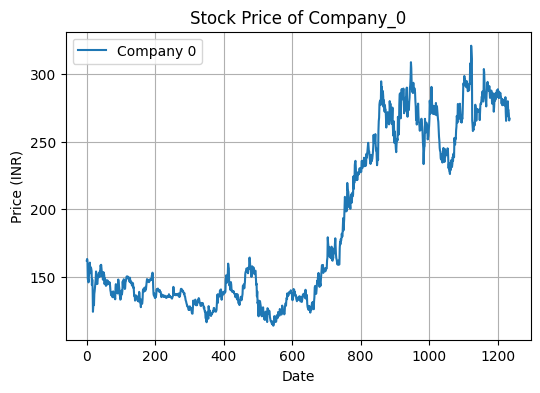

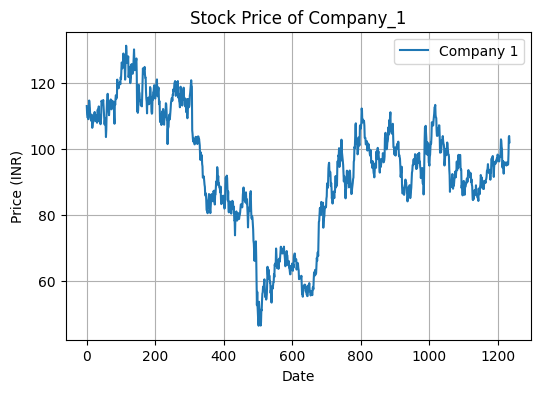

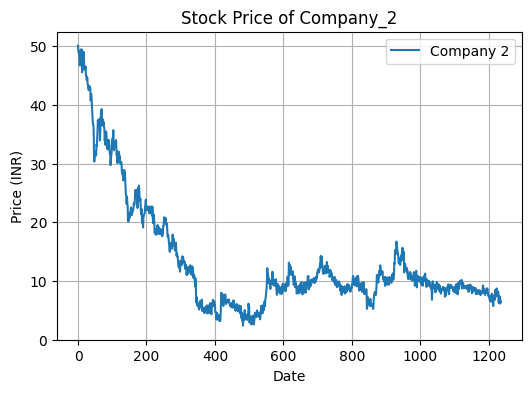

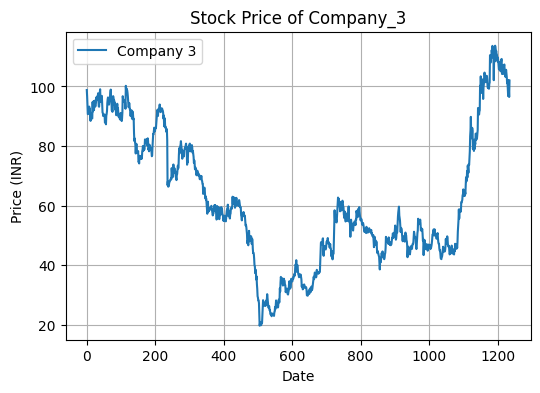

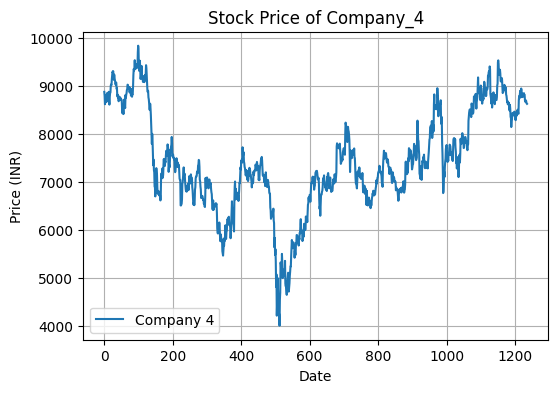

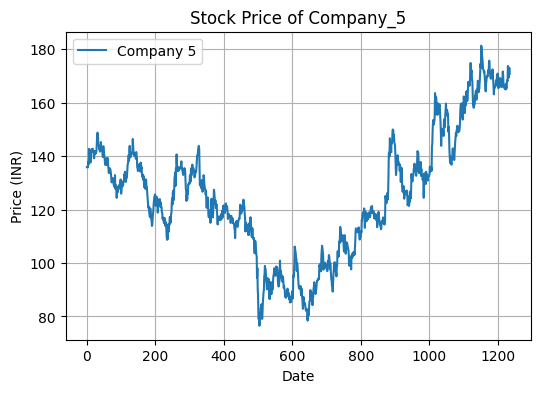

In [ ]:
# Plotting close prices for each company
for i in range(6):
    plt.figure(figsize=(6, 4))
    plt.plot(features[f'Close_Company_{i}'], label=f'Company {i}')
    plt.title(f"Stock Price of Company_{i}")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.grid(True)
    plt.legend()
    plt.show()



##Plotting Moving Average for 100 Days and 10 Days

In [ ]:
ma100 = df.Close_Company_0.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1231    280.485559
1232    280.579953
1233    280.665021
1234    280.650419
1235    280.547307
Name: Close_Company_0, Length: 1236, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days of Company_0')

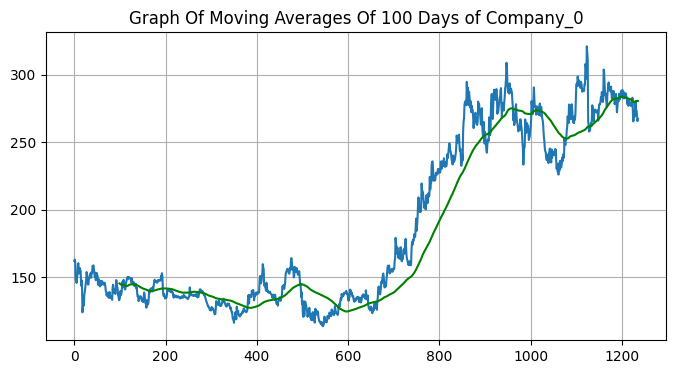

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(df.Close_Company_0)
plt.plot(ma100, 'g')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days of Company_0')

In [ ]:
ma10 = df.Close_Company_0.rolling(10).mean()
ma10

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1231    273.812018
1232    273.486755
1233    272.248842
1234    271.631555
1235    271.795428
Name: Close_Company_0, Length: 1236, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days(green) And 10 Days(red) Moving Averages of Company_0')

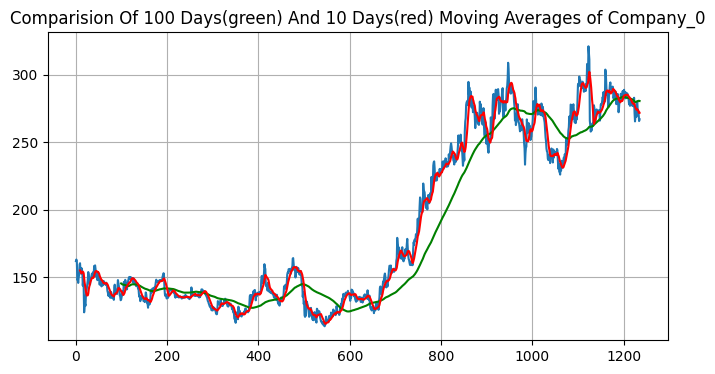

In [ ]:
#Plotting comparison between Moving Average of 100 Days and 10 Days

plt.figure(figsize = (8,4))
plt.plot(df.Close_Company_0)
plt.plot(ma100, 'g')
plt.plot(ma10, 'r')
plt.grid(True)
plt.title('Comparision Of 100 Days(green) And 10 Days(red) Moving Averages of Company_0')

#Normalizing Dataset using MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
# Retrieve just the numeric input values
data = features.values[:, :6]

# Perform a MinMaxScaler transform of the dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled array back to a DataFrame
dataset_scaled = pd.DataFrame(data_scaled)

# Summarize the scaled dataset
dataset_scaled

,0,1,2,3,4,5
0,0.232705,0.784631,1.000000,0.841810,0.835245,0.566548
1,0.238458,0.755159,0.982310,0.818217,0.821773,0.567391
2,0.231746,0.744456,0.974529,0.786375,0.791092,0.568343
3,0.165869,0.745307,0.970171,0.755688,0.801913,0.565500
4,0.167949,0.738182,0.948637,0.756256,0.810581,0.585373
...,...,...,...,...,...,...
1231,0.769143,0.576146,0.105337,0.819961,0.798474,0.904805
1232,0.770267,0.611547,0.079111,0.877602,0.804827,0.885686
1233,0.756495,0.674185,0.103558,0.846756,0.798740,0.900010
1234,0.732987,0.677673,0.080885,0.817020,0.793843,0.921355


# Forming Training and Test Datasets

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(dataset_scaled[0:int(len(dataset_scaled)*0.70)])
test = pd.DataFrame(dataset_scaled[int(len(dataset_scaled)*0.70): int(len(dataset_scaled))])

train_array = train.values
test_array = test.values

print(train_array.shape)
print(test_array.shape)

(865, 6)
(371, 6)


In [ ]:
# Initialize arrays for each company
train_array_0 = np.zeros((865, 1))
train_array_1 = np.zeros((865, 1))
train_array_2 = np.zeros((865, 1))
train_array_3 = np.zeros((865, 1))
train_array_4 = np.zeros((865, 1))
train_array_5 = np.zeros((865, 1))

# Split the data into arrays for each company
for i in range(865):
    train_array_0[i] = train_array[i][0]
    train_array_1[i] = train_array[i][1]
    train_array_2[i] = train_array[i][2]
    train_array_3[i] = train_array[i][3]
    train_array_4[i] = train_array[i][4]
    train_array_5[i] = train_array[i][5]

# Print the shapes of the arrays
print("Shape of train_array_0:", train_array_0.shape)
print("Shape of train_array_1:", train_array_1.shape)
print("Shape of train_array_2:", train_array_2.shape)
print("Shape of train_array_3:", train_array_3.shape)
print("Shape of train_array_4:", train_array_4.shape)
print("Shape of train_array_5:", train_array_5.shape)



Shape of train_array_0: (865, 1)
Shape of train_array_1: (865, 1)
Shape of train_array_2: (865, 1)
Shape of train_array_3: (865, 1)
Shape of train_array_4: (865, 1)
Shape of train_array_5: (865, 1)


In [ ]:
# Initialize arrays for each company
test_array_0 = np.zeros((371, 1))
test_array_1 = np.zeros((371, 1))
test_array_2 = np.zeros((371, 1))
test_array_3 = np.zeros((371, 1))
test_array_4 = np.zeros((371, 1))
test_array_5 = np.zeros((371, 1))

# Split the data into arrays for each company
for i in range(371):
    test_array_0[i] = test_array[i][0]
    test_array_1[i] = test_array[i][1]
    test_array_2[i] = test_array[i][2]
    test_array_3[i] = test_array[i][3]
    test_array_4[i] = test_array[i][4]
    test_array_5[i] = test_array[i][5]

# Print the shapes of the arrays
print("Shape of test_array_0:", test_array_0.shape)
print("Shape of test_array_1:", test_array_1.shape)
print("Shape of test_array_2:", test_array_2.shape)
print("Shape of test_array_3:", test_array_3.shape)
print("Shape of test_array_4:", test_array_4.shape)
print("Shape of test_array_5:", test_array_5.shape)


Shape of test_array_0: (371, 1)
Shape of test_array_1: (371, 1)
Shape of test_array_2: (371, 1)
Shape of test_array_3: (371, 1)
Shape of test_array_4: (371, 1)
Shape of test_array_5: (371, 1)


In [ ]:
# Define the number of time steps
time_steps = 10

# Initialize lists to store x_train and y_train for each company
x_train_lists = [[] for _ in range(6)]
y_train_lists = [[] for _ in range(6)]

# Split the data into x_train and y_train for each company
for company_data, x_train_list, y_train_list in zip([train_array_0, train_array_1, train_array_2, train_array_3, train_array_4, train_array_5], x_train_lists, y_train_lists):
    x_train_company = []
    y_train_company = []

    # Iterate through the data to create sequences of length `time_steps`
    for i in range(len(company_data) - time_steps):
        x_train_company.append(company_data[i:i+time_steps])
        y_train_company.append(company_data[i+time_steps])

    # Append the sequences to the corresponding lists for each company
    x_train_list.extend(x_train_company)
    y_train_list.extend(y_train_company)

# Convert lists to numpy arrays for each company and name each array differently
x_train_array_0 = np.array(x_train_lists[0])
y_train_array_0 = np.array(y_train_lists[0])
x_train_array_1 = np.array(x_train_lists[1])
y_train_array_1 = np.array(y_train_lists[1])
x_train_array_2 = np.array(x_train_lists[2])
y_train_array_2 = np.array(y_train_lists[2])
x_train_array_3 = np.array(x_train_lists[3])
y_train_array_3 = np.array(y_train_lists[3])
x_train_array_4 = np.array(x_train_lists[4])
y_train_array_4 = np.array(y_train_lists[4])
x_train_array_5 = np.array(x_train_lists[5])
y_train_array_5 = np.array(y_train_lists[5])

# Check the shapes of x_train and y_train for each company
for i, (x_train, y_train) in enumerate(zip([x_train_array_0, x_train_array_1, x_train_array_2, x_train_array_3, x_train_array_4, x_train_array_5], [y_train_array_0, y_train_array_1, y_train_array_2, y_train_array_3, y_train_array_4, y_train_array_5])):
    print(f"Company {i}:")
    print("x_train shape:", x_train.shape)
    print("y_train shape:", y_train.shape)


Company 0:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 1:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 2:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 3:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 4:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)
Company 5:
x_train shape: (855, 10, 1)
y_train shape: (855, 1)


In [ ]:
# Define the number of time steps
time_steps = 10

# Initialize lists to store x_test and y_test for each company
x_test_lists = [[] for _ in range(6)]
y_test_lists = [[] for _ in range(6)]

# Split the data into x_test and y_test for each company
for company_data, x_test_list, y_test_list in zip([test_array_0, test_array_1, test_array_2, test_array_3, test_array_4, test_array_5], x_test_lists, y_test_lists):
    x_test_company = []
    y_test_company = []

    # Iterate through the data to create sequences of length `time_steps`
    for i in range(len(company_data) - time_steps):
        x_test_company.append(company_data[i:i+time_steps])
        y_test_company.append(company_data[i+time_steps])

    # Append the sequences to the corresponding lists for each company
    x_test_list.extend(x_test_company)
    y_test_list.extend(y_test_company)

# Convert lists to numpy arrays for each company and name each array differently
x_test_array_0 = np.array(x_test_lists[0])
y_test_array_0 = np.array(y_test_lists[0])
x_test_array_1 = np.array(x_test_lists[1])
y_test_array_1 = np.array(y_test_lists[1])
x_test_array_2 = np.array(x_test_lists[2])
y_test_array_2 = np.array(y_test_lists[2])
x_test_array_3 = np.array(x_test_lists[3])
y_test_array_3 = np.array(y_test_lists[3])
x_test_array_4 = np.array(x_test_lists[4])
y_test_array_4 = np.array(y_test_lists[4])
x_test_array_5 = np.array(x_test_lists[5])
y_test_array_5 = np.array(y_test_lists[5])

# Check the shapes of x_test and y_test for each company
for i, (x_test, y_test) in enumerate(zip([x_test_array_0, x_test_array_1, x_test_array_2, x_test_array_3, x_test_array_4, x_test_array_5], [y_test_array_0, y_test_array_1, y_test_array_2, y_test_array_3, y_test_array_4, y_test_array_5])):
    print(f"Company {i}:")
    print("x_test shape:", x_test.shape)
    print("y_test shape:", y_test.shape)


Company 0:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 1:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 2:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 3:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 4:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)
Company 5:
x_test shape: (361, 10, 1)
y_test shape: (361, 1)


# Building Stacked LSTM Model and creating Callback

In [ ]:
# Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Company_0_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',  metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Steps that were used in the folowing section (Training Model):
1. Fitting the Model
2. Saving the Model
3. Predicting on the past 10 days
4. Printing weights of each lstm layer
## For Company 1

In [ ]:
model.fit(x_train_array_0,y_train_array_0,validation_data=(x_test_array_0,y_test_array_0),epochs=100,batch_size=69,verbose=1 , callbacks = [model_checkpoint_callback])

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 0.0244 - root_mean_squared_error: 0.1563

13/13 [==============================] - 8s 132ms/step - loss: 0.0244 - root_mean_squared_error: 0.1563 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0687

13/13 [==============================] - 0s 27ms/step - loss: 0.0047 - root_mean_squared_error: 0.0687 - val_loss: 0.0451 - val_root_mean_squared_error: 0.2125
Epoch 3/100
13/13 [==============================] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0428

13/13 [==============================] - 0s 28ms/step - loss: 0.0018 - root_mean_squared_error: 0.0428 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1061
Epoch 4/100
13/13 [==============================] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0354

13/13 [==============================] - 1s 51ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 5/100
13/13 [==============================] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0341

13/13 [==============================] - 1s 44ms/step - loss: 0.0012 - root_mean_squared_error: 0.0341 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 6/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0339

13/13 [==============================] - 1s 43ms/step - loss: 0.0011 - root_mean_squared_error: 0.0339 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0332

13/13 [==============================] - 1s 49ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0811
Epoch 8/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0333

13/13 [==============================] - 0s 33ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 9/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0334

13/13 [==============================] - 0s 26ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
Epoch 10/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0328

13/13 [==============================] - 0s 30ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0846
Epoch 11/100
13/13 [==============================] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0343

13/13 [==============================] - 0s 28ms/step - loss: 0.0012 - root_mean_squared_error: 0.0343 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0881
Epoch 12/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0335

13/13 [==============================] - 0s 28ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775
Epoch 13/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0336

13/13 [==============================] - 0s 28ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0618
Epoch 14/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0328

13/13 [==============================] - 0s 26ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 15/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0335

13/13 [==============================] - 0s 29ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0620
Epoch 16/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0326

13/13 [==============================] - 0s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 17/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0333

13/13 [==============================] - 0s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 18/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0329

13/13 [==============================] - 0s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0940
Epoch 19/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0335

13/13 [==============================] - 0s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0335 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0940
Epoch 20/100
13/13 [==============================] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0345

13/13 [==============================] - 0s 29ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0570
Epoch 21/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0329

13/13 [==============================] - 0s 28ms/step - loss: 0.0011 - root_mean_squared_error: 0.0327 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0575
Epoch 22/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0334

13/13 [==============================] - 0s 27ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0810
Epoch 23/100
13/13 [==============================] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0320    

13/13 [==============================] - 0s 28ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0586
Epoch 24/100
12/13 [==========================>...] - ETA: 0s - loss: 9.9903e-04 - root_mean_squared_error: 0.0316

13/13 [==============================] - 0s 28ms/step - loss: 0.0010 - root_mean_squared_error: 0.0316 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0691
Epoch 25/100
13/13 [==============================] - ETA: 0s - loss: 9.9071e-04 - root_mean_squared_error: 0.0315

13/13 [==============================] - 0s 26ms/step - loss: 9.9071e-04 - root_mean_squared_error: 0.0315 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0533
Epoch 26/100
13/13 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0336

13/13 [==============================] - 0s 28ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 27/100
13/13 [==============================] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0324

13/13 [==============================] - 0s 30ms/step - loss: 0.0010 - root_mean_squared_error: 0.0324 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0555
Epoch 28/100
13/13 [==============================] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0317    

13/13 [==============================] - 0s 27ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0848
Epoch 29/100
13/13 [==============================] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0322

13/13 [==============================] - 0s 26ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0783
Epoch 30/100
12/13 [==========================>...] - ETA: 0s - loss: 9.6888e-04 - root_mean_squared_error: 0.0311

13/13 [==============================] - 0s 27ms/step - loss: 9.5476e-04 - root_mean_squared_error: 0.0309 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0638
Epoch 31/100
13/13 [==============================] - ETA: 0s - loss: 9.5913e-04 - root_mean_squared_error: 0.0310

13/13 [==============================] - 0s 28ms/step - loss: 9.5913e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0852
Epoch 32/100
13/13 [==============================] - ETA: 0s - loss: 9.6843e-04 - root_mean_squared_error: 0.0311

13/13 [==============================] - 0s 27ms/step - loss: 9.6843e-04 - root_mean_squared_error: 0.0311 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0508
Epoch 33/100
13/13 [==============================] - ETA: 0s - loss: 9.9652e-04 - root_mean_squared_error: 0.0316

13/13 [==============================] - 0s 28ms/step - loss: 9.9652e-04 - root_mean_squared_error: 0.0316 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 34/100
13/13 [==============================] - ETA: 0s - loss: 8.8893e-04 - root_mean_squared_error: 0.0298

13/13 [==============================] - 0s 29ms/step - loss: 8.8893e-04 - root_mean_squared_error: 0.0298 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 35/100
12/13 [==========================>...] - ETA: 0s - loss: 9.4740e-04 - root_mean_squared_error: 0.0308

13/13 [==============================] - 0s 29ms/step - loss: 9.4872e-04 - root_mean_squared_error: 0.0308 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0784
Epoch 36/100
13/13 [==============================] - ETA: 0s - loss: 9.6327e-04 - root_mean_squared_error: 0.0310

13/13 [==============================] - 1s 41ms/step - loss: 9.6327e-04 - root_mean_squared_error: 0.0310 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0490
Epoch 37/100
13/13 [==============================] - ETA: 0s - loss: 9.0453e-04 - root_mean_squared_error: 0.0301

13/13 [==============================] - 1s 50ms/step - loss: 9.0453e-04 - root_mean_squared_error: 0.0301 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0690
Epoch 38/100
13/13 [==============================] - ETA: 0s - loss: 9.1335e-04 - root_mean_squared_error: 0.0302

13/13 [==============================] - 1s 41ms/step - loss: 9.1335e-04 - root_mean_squared_error: 0.0302 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0482
Epoch 39/100
13/13 [==============================] - ETA: 0s - loss: 8.7688e-04 - root_mean_squared_error: 0.0296

13/13 [==============================] - 1s 49ms/step - loss: 8.7688e-04 - root_mean_squared_error: 0.0296 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 40/100
12/13 [==========================>...] - ETA: 0s - loss: 8.7541e-04 - root_mean_squared_error: 0.0296

13/13 [==============================] - 0s 36ms/step - loss: 8.8275e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 41/100
13/13 [==============================] - ETA: 0s - loss: 8.5997e-04 - root_mean_squared_error: 0.0293

13/13 [==============================] - 0s 29ms/step - loss: 8.5997e-04 - root_mean_squared_error: 0.0293 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0470
Epoch 42/100
12/13 [==========================>...] - ETA: 0s - loss: 8.0445e-04 - root_mean_squared_error: 0.0284

13/13 [==============================] - 0s 28ms/step - loss: 8.1339e-04 - root_mean_squared_error: 0.0285 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462
Epoch 43/100
13/13 [==============================] - ETA: 0s - loss: 8.5560e-04 - root_mean_squared_error: 0.0293

13/13 [==============================] - 0s 28ms/step - loss: 8.5560e-04 - root_mean_squared_error: 0.0293 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468
Epoch 44/100
13/13 [==============================] - ETA: 0s - loss: 9.2063e-04 - root_mean_squared_error: 0.0303

13/13 [==============================] - 0s 28ms/step - loss: 9.2063e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 45/100
13/13 [==============================] - ETA: 0s - loss: 8.4324e-04 - root_mean_squared_error: 0.0290

13/13 [==============================] - 0s 27ms/step - loss: 8.4324e-04 - root_mean_squared_error: 0.0290 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0486
Epoch 46/100
13/13 [==============================] - ETA: 0s - loss: 7.9458e-04 - root_mean_squared_error: 0.0282

13/13 [==============================] - 0s 27ms/step - loss: 7.9458e-04 - root_mean_squared_error: 0.0282 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0560
Epoch 47/100
12/13 [==========================>...] - ETA: 0s - loss: 7.5997e-04 - root_mean_squared_error: 0.0276

13/13 [==============================] - 0s 29ms/step - loss: 7.6217e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0465
Epoch 48/100
13/13 [==============================] - ETA: 0s - loss: 7.8379e-04 - root_mean_squared_error: 0.0280

13/13 [==============================] - 0s 28ms/step - loss: 7.8379e-04 - root_mean_squared_error: 0.0280 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0485
Epoch 49/100
13/13 [==============================] - ETA: 0s - loss: 7.4423e-04 - root_mean_squared_error: 0.0273

13/13 [==============================] - 0s 28ms/step - loss: 7.4423e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 50/100
13/13 [==============================] - ETA: 0s - loss: 7.7840e-04 - root_mean_squared_error: 0.0279

13/13 [==============================] - 0s 27ms/step - loss: 7.7840e-04 - root_mean_squared_error: 0.0279 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0495
Epoch 51/100
13/13 [==============================] - ETA: 0s - loss: 7.1956e-04 - root_mean_squared_error: 0.0268

13/13 [==============================] - 0s 26ms/step - loss: 7.1956e-04 - root_mean_squared_error: 0.0268 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0437
Epoch 52/100
13/13 [==============================] - ETA: 0s - loss: 7.0714e-04 - root_mean_squared_error: 0.0266

13/13 [==============================] - 0s 26ms/step - loss: 7.0714e-04 - root_mean_squared_error: 0.0266 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 53/100
12/13 [==========================>...] - ETA: 0s - loss: 8.1687e-04 - root_mean_squared_error: 0.0286

13/13 [==============================] - 0s 29ms/step - loss: 7.9844e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 54/100
13/13 [==============================] - ETA: 0s - loss: 8.3341e-04 - root_mean_squared_error: 0.0289

13/13 [==============================] - 0s 27ms/step - loss: 8.3341e-04 - root_mean_squared_error: 0.0289 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 55/100
13/13 [==============================] - ETA: 0s - loss: 7.1499e-04 - root_mean_squared_error: 0.0267

13/13 [==============================] - 0s 26ms/step - loss: 7.1499e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0421
Epoch 56/100
13/13 [==============================] - ETA: 0s - loss: 7.0218e-04 - root_mean_squared_error: 0.0265

13/13 [==============================] - 0s 27ms/step - loss: 7.0218e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0453
Epoch 57/100
12/13 [==========================>...] - ETA: 0s - loss: 6.7829e-04 - root_mean_squared_error: 0.0260

13/13 [==============================] - 0s 28ms/step - loss: 6.7061e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0442
Epoch 58/100
13/13 [==============================] - ETA: 0s - loss: 6.7023e-04 - root_mean_squared_error: 0.0259

13/13 [==============================] - 0s 28ms/step - loss: 6.7023e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 59/100
13/13 [==============================] - ETA: 0s - loss: 7.1045e-04 - root_mean_squared_error: 0.0267

13/13 [==============================] - 0s 26ms/step - loss: 7.1045e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 60/100
13/13 [==============================] - ETA: 0s - loss: 7.2833e-04 - root_mean_squared_error: 0.0270

13/13 [==============================] - 0s 27ms/step - loss: 7.2833e-04 - root_mean_squared_error: 0.0270 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0501
Epoch 61/100
13/13 [==============================] - ETA: 0s - loss: 6.6826e-04 - root_mean_squared_error: 0.0259

13/13 [==============================] - 0s 29ms/step - loss: 6.6826e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0511
Epoch 62/100
12/13 [==========================>...] - ETA: 0s - loss: 7.1944e-04 - root_mean_squared_error: 0.0268

13/13 [==============================] - 0s 27ms/step - loss: 7.2731e-04 - root_mean_squared_error: 0.0270 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0430
Epoch 63/100
13/13 [==============================] - ETA: 0s - loss: 6.2757e-04 - root_mean_squared_error: 0.0251

13/13 [==============================] - 0s 27ms/step - loss: 6.2757e-04 - root_mean_squared_error: 0.0251 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0486
Epoch 64/100
12/13 [==========================>...] - ETA: 0s - loss: 7.4026e-04 - root_mean_squared_error: 0.0272

13/13 [==============================] - 0s 27ms/step - loss: 7.5257e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0823
Epoch 65/100
13/13 [==============================] - ETA: 0s - loss: 7.5945e-04 - root_mean_squared_error: 0.0276

13/13 [==============================] - 0s 27ms/step - loss: 7.5945e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0414
Epoch 66/100
13/13 [==============================] - ETA: 0s - loss: 6.3352e-04 - root_mean_squared_error: 0.0252

13/13 [==============================] - 0s 26ms/step - loss: 6.3352e-04 - root_mean_squared_error: 0.0252 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0495
Epoch 67/100
11/13 [========================>.....] - ETA: 0s - loss: 7.1665e-04 - root_mean_squared_error: 0.0268

13/13 [==============================] - 0s 30ms/step - loss: 7.2681e-04 - root_mean_squared_error: 0.0270 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 68/100
13/13 [==============================] - ETA: 0s - loss: 6.4712e-04 - root_mean_squared_error: 0.0254

13/13 [==============================] - 1s 43ms/step - loss: 6.4712e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0403
Epoch 69/100
13/13 [==============================] - ETA: 0s - loss: 6.0616e-04 - root_mean_squared_error: 0.0246

13/13 [==============================] - 1s 40ms/step - loss: 6.0616e-04 - root_mean_squared_error: 0.0246 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0399
Epoch 70/100
13/13 [==============================] - ETA: 0s - loss: 6.5145e-04 - root_mean_squared_error: 0.0255

13/13 [==============================] - 1s 50ms/step - loss: 6.5145e-04 - root_mean_squared_error: 0.0255 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 71/100
13/13 [==============================] - ETA: 0s - loss: 6.7959e-04 - root_mean_squared_error: 0.0261

13/13 [==============================] - 1s 50ms/step - loss: 6.7959e-04 - root_mean_squared_error: 0.0261 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 72/100
13/13 [==============================] - ETA: 0s - loss: 6.3559e-04 - root_mean_squared_error: 0.0252

13/13 [==============================] - 0s 34ms/step - loss: 6.3559e-04 - root_mean_squared_error: 0.0252 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 73/100
13/13 [==============================] - ETA: 0s - loss: 7.1866e-04 - root_mean_squared_error: 0.0268

13/13 [==============================] - 0s 28ms/step - loss: 7.1866e-04 - root_mean_squared_error: 0.0268 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 74/100
13/13 [==============================] - ETA: 0s - loss: 7.5020e-04 - root_mean_squared_error: 0.0274

13/13 [==============================] - 0s 28ms/step - loss: 7.5020e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 75/100
12/13 [==========================>...] - ETA: 0s - loss: 6.4249e-04 - root_mean_squared_error: 0.0253

13/13 [==============================] - 0s 28ms/step - loss: 6.3920e-04 - root_mean_squared_error: 0.0253 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0454
Epoch 76/100
12/13 [==========================>...] - ETA: 0s - loss: 6.3578e-04 - root_mean_squared_error: 0.0252

13/13 [==============================] - 0s 29ms/step - loss: 6.4585e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0410
Epoch 77/100
13/13 [==============================] - ETA: 0s - loss: 6.3541e-04 - root_mean_squared_error: 0.0252

13/13 [==============================] - 0s 27ms/step - loss: 6.3541e-04 - root_mean_squared_error: 0.0252 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409
Epoch 78/100
13/13 [==============================] - ETA: 0s - loss: 5.7543e-04 - root_mean_squared_error: 0.0240

13/13 [==============================] - 0s 26ms/step - loss: 5.7543e-04 - root_mean_squared_error: 0.0240 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 79/100
13/13 [==============================] - ETA: 0s - loss: 5.3969e-04 - root_mean_squared_error: 0.0232

13/13 [==============================] - 0s 29ms/step - loss: 5.3969e-04 - root_mean_squared_error: 0.0232 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0377
Epoch 80/100
12/13 [==========================>...] - ETA: 0s - loss: 5.4651e-04 - root_mean_squared_error: 0.0234

13/13 [==============================] - 0s 27ms/step - loss: 5.3665e-04 - root_mean_squared_error: 0.0232 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0376
Epoch 81/100
13/13 [==============================] - ETA: 0s - loss: 5.3929e-04 - root_mean_squared_error: 0.0232

13/13 [==============================] - 0s 28ms/step - loss: 5.3929e-04 - root_mean_squared_error: 0.0232 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0376
Epoch 82/100
12/13 [==========================>...] - ETA: 0s - loss: 5.5888e-04 - root_mean_squared_error: 0.0236

13/13 [==============================] - 0s 29ms/step - loss: 5.5765e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0399
Epoch 83/100
13/13 [==============================] - ETA: 0s - loss: 5.3203e-04 - root_mean_squared_error: 0.0231

13/13 [==============================] - 0s 29ms/step - loss: 5.3203e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0373
Epoch 84/100
13/13 [==============================] - ETA: 0s - loss: 5.2476e-04 - root_mean_squared_error: 0.0229

13/13 [==============================] - 0s 27ms/step - loss: 5.2476e-04 - root_mean_squared_error: 0.0229 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651
Epoch 85/100
13/13 [==============================] - ETA: 0s - loss: 6.1731e-04 - root_mean_squared_error: 0.0248

13/13 [==============================] - 0s 27ms/step - loss: 6.1731e-04 - root_mean_squared_error: 0.0248 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0421
Epoch 86/100
13/13 [==============================] - ETA: 0s - loss: 5.5871e-04 - root_mean_squared_error: 0.0236

13/13 [==============================] - 0s 28ms/step - loss: 5.5871e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0394
Epoch 87/100
12/13 [==========================>...] - ETA: 0s - loss: 5.9781e-04 - root_mean_squared_error: 0.0245

13/13 [==============================] - 0s 30ms/step - loss: 5.9776e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0429
Epoch 88/100
13/13 [==============================] - ETA: 0s - loss: 5.0065e-04 - root_mean_squared_error: 0.0224

13/13 [==============================] - 0s 26ms/step - loss: 5.0065e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0415
Epoch 89/100
13/13 [==============================] - ETA: 0s - loss: 4.9515e-04 - root_mean_squared_error: 0.0223

13/13 [==============================] - 0s 28ms/step - loss: 4.9515e-04 - root_mean_squared_error: 0.0223 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386
Epoch 90/100
12/13 [==========================>...] - ETA: 0s - loss: 4.8259e-04 - root_mean_squared_error: 0.0220

13/13 [==============================] - 0s 29ms/step - loss: 4.9316e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 91/100
12/13 [==========================>...] - ETA: 0s - loss: 4.7482e-04 - root_mean_squared_error: 0.0218

13/13 [==============================] - 0s 29ms/step - loss: 4.7738e-04 - root_mean_squared_error: 0.0218 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 92/100
12/13 [==========================>...] - ETA: 0s - loss: 4.7719e-04 - root_mean_squared_error: 0.0218

13/13 [==============================] - 0s 30ms/step - loss: 4.6970e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0358
Epoch 93/100
13/13 [==============================] - ETA: 0s - loss: 4.6211e-04 - root_mean_squared_error: 0.0215

13/13 [==============================] - 0s 28ms/step - loss: 4.6211e-04 - root_mean_squared_error: 0.0215 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 94/100
13/13 [==============================] - ETA: 0s - loss: 4.6179e-04 - root_mean_squared_error: 0.0215

13/13 [==============================] - 0s 27ms/step - loss: 4.6179e-04 - root_mean_squared_error: 0.0215 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0371
Epoch 95/100
13/13 [==============================] - ETA: 0s - loss: 4.6556e-04 - root_mean_squared_error: 0.0216

13/13 [==============================] - 0s 29ms/step - loss: 4.6556e-04 - root_mean_squared_error: 0.0216 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 96/100
13/13 [==============================] - ETA: 0s - loss: 4.8260e-04 - root_mean_squared_error: 0.0220

13/13 [==============================] - 0s 26ms/step - loss: 4.8260e-04 - root_mean_squared_error: 0.0220 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0395
Epoch 97/100
13/13 [==============================] - ETA: 0s - loss: 5.0960e-04 - root_mean_squared_error: 0.0226

13/13 [==============================] - 0s 29ms/step - loss: 5.0960e-04 - root_mean_squared_error: 0.0226 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381
Epoch 98/100
13/13 [==============================] - ETA: 0s - loss: 4.8435e-04 - root_mean_squared_error: 0.0220

13/13 [==============================] - 0s 29ms/step - loss: 4.8435e-04 - root_mean_squared_error: 0.0220 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0366
Epoch 99/100
12/13 [==========================>...] - ETA: 0s - loss: 4.5739e-04 - root_mean_squared_error: 0.0214

13/13 [==============================] - 0s 32ms/step - loss: 4.5434e-04 - root_mean_squared_error: 0.0213 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0371
Epoch 100/100
13/13 [==============================] - ETA: 0s - loss: 4.4318e-04 - root_mean_squared_error: 0.0211

13/13 [==============================] - 1s 43ms/step - loss: 4.4318e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333


In [ ]:
model.save('Company_0_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
weights_0=model.load_weights('Company_0_model.h5')


In [ ]:
for layer in model.layers:
    weights = layer.get_weights()  # Get the weights of the current layer
    print("Layer:", layer.name)
    for w in weights:
        print(w)

Layer: lstm
[[-0.06277116 -0.06462129  0.04492136 -0.04563506  0.02267899 -0.15817553
   0.09512873  0.08717722 -0.06585569 -0.03447715 -0.03033557 -0.02675544
   0.18826199 -0.10584492  0.0111047   0.1734447  -0.09778882  0.06992886
   0.06357488  0.08912174  0.13843894  0.10655753  0.17505135  0.15924367
  -0.05172008 -0.03972555 -0.05099932  0.06923155  0.18342917  0.05496847
  -0.19713014 -0.12667227  0.08041968 -0.06235427 -0.08651813  0.12234481
   0.01426346  0.04095225 -0.03486785 -0.05809363 -0.09936075  0.20192605
  -0.02810279  0.17269515  0.15535381 -0.06270181 -0.02910549  0.10908449
   0.11352596  0.1282267  -0.03817946  0.00396932  0.06004662  0.08347754
   0.1187999   0.11034732  0.20380259 -0.05076945  0.06532161 -0.09215777
  -0.20668145 -0.08515486 -0.12573013  0.10185163  0.13929518 -0.09283035
   0.15970463  0.06281137  0.17493732  0.1809954  -0.05410019 -0.03833277
   0.13684084 -0.0491491  -0.09320545 -0.07278468 -0.02731777 -0.05922151
   0.14466476 -0.04325601 

In [ ]:
past_10_days_0 = pd.DataFrame(train_array_0[-10:])
test_df_0 = pd.DataFrame(test_array_0)
final_df_0 = past_10_days_0.append(test_df_0, ignore_index = True)
input_data_0 = scaler.fit_transform(final_df_0)

x_test_0 = []
y_test_0 = []
for i in range(10, input_data_0.shape[0]):
   x_test_0.append(input_data_0[i-10: i])
   y_test_0.append(input_data_0[i,0:6])

x_test_0, y_test_0 = np.array(x_test_0), np.array(y_test_0)
y_pred_0 = model.predict(x_test_0)

scale_factor = 1 / scaler.scale_
y_pred_0 = y_pred_0 * scale_factor
y_test_0 = y_test_0 * scale_factor

<ipython-input-33-92faca6e19d5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_0 = past_10_days_0.append(test_df_0, ignore_index = True)


12/12 [==============================] - 2s 6ms/step


## For Company 2

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Company_1_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.fit(x_train_array_1,y_train_array_1,validation_data=(x_test_array_1,y_test_array_1),epochs=100,batch_size=69,verbose=1, callbacks = [model_checkpoint_callback])

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0322

13/13 [==============================] - 0s 32ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 8.6846e-04 - val_root_mean_squared_error: 0.0295
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 0.0010 - root_mean_squared_error: 0.0319    

13/13 [==============================] - 0s 27ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 7.0970e-04 - val_root_mean_squared_error: 0.0266
Epoch 3/100
11/13 [========================>.....] - ETA: 0s - loss: 9.7255e-04 - root_mean_squared_error: 0.0312

13/13 [==============================] - 0s 31ms/step - loss: 9.3797e-04 - root_mean_squared_error: 0.0306 - val_loss: 7.5080e-04 - val_root_mean_squared_error: 0.0274
Epoch 4/100
13/13 [==============================] - ETA: 0s - loss: 9.4909e-04 - root_mean_squared_error: 0.0308

13/13 [==============================] - 0s 27ms/step - loss: 9.4909e-04 - root_mean_squared_error: 0.0308 - val_loss: 6.9561e-04 - val_root_mean_squared_error: 0.0264
Epoch 5/100
13/13 [==============================] - ETA: 0s - loss: 8.7268e-04 - root_mean_squared_error: 0.0295

13/13 [==============================] - 0s 28ms/step - loss: 8.7268e-04 - root_mean_squared_error: 0.0295 - val_loss: 6.9175e-04 - val_root_mean_squared_error: 0.0263
Epoch 6/100
13/13 [==============================] - ETA: 0s - loss: 9.9775e-04 - root_mean_squared_error: 0.0316

13/13 [==============================] - 0s 27ms/step - loss: 9.9775e-04 - root_mean_squared_error: 0.0316 - val_loss: 6.6433e-04 - val_root_mean_squared_error: 0.0258
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 8.6870e-04 - root_mean_squared_error: 0.0295

13/13 [==============================] - 0s 26ms/step - loss: 8.6870e-04 - root_mean_squared_error: 0.0295 - val_loss: 6.1371e-04 - val_root_mean_squared_error: 0.0248
Epoch 8/100
13/13 [==============================] - ETA: 0s - loss: 9.6576e-04 - root_mean_squared_error: 0.0311

13/13 [==============================] - 0s 28ms/step - loss: 9.6576e-04 - root_mean_squared_error: 0.0311 - val_loss: 7.2019e-04 - val_root_mean_squared_error: 0.0268
Epoch 9/100
13/13 [==============================] - ETA: 0s - loss: 9.1899e-04 - root_mean_squared_error: 0.0303

13/13 [==============================] - 0s 26ms/step - loss: 9.1899e-04 - root_mean_squared_error: 0.0303 - val_loss: 5.8735e-04 - val_root_mean_squared_error: 0.0242
Epoch 10/100
13/13 [==============================] - ETA: 0s - loss: 8.8061e-04 - root_mean_squared_error: 0.0297

13/13 [==============================] - 0s 29ms/step - loss: 8.8061e-04 - root_mean_squared_error: 0.0297 - val_loss: 5.9308e-04 - val_root_mean_squared_error: 0.0244
Epoch 11/100
13/13 [==============================] - ETA: 0s - loss: 7.8579e-04 - root_mean_squared_error: 0.0280

13/13 [==============================] - 0s 29ms/step - loss: 7.8579e-04 - root_mean_squared_error: 0.0280 - val_loss: 6.0626e-04 - val_root_mean_squared_error: 0.0246
Epoch 12/100
12/13 [==========================>...] - ETA: 0s - loss: 9.8378e-04 - root_mean_squared_error: 0.0314

13/13 [==============================] - 0s 27ms/step - loss: 9.7376e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 13/100
13/13 [==============================] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0396

13/13 [==============================] - 0s 28ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 9.8606e-04 - val_root_mean_squared_error: 0.0314
Epoch 14/100
12/13 [==========================>...] - ETA: 0s - loss: 8.1313e-04 - root_mean_squared_error: 0.0285

13/13 [==============================] - 0s 30ms/step - loss: 8.0231e-04 - root_mean_squared_error: 0.0283 - val_loss: 5.6643e-04 - val_root_mean_squared_error: 0.0238
Epoch 15/100
12/13 [==========================>...] - ETA: 0s - loss: 8.0287e-04 - root_mean_squared_error: 0.0283

13/13 [==============================] - 0s 28ms/step - loss: 8.0152e-04 - root_mean_squared_error: 0.0283 - val_loss: 8.1014e-04 - val_root_mean_squared_error: 0.0285
Epoch 16/100
13/13 [==============================] - ETA: 0s - loss: 8.1584e-04 - root_mean_squared_error: 0.0286

13/13 [==============================] - 0s 27ms/step - loss: 8.1584e-04 - root_mean_squared_error: 0.0286 - val_loss: 5.6137e-04 - val_root_mean_squared_error: 0.0237
Epoch 17/100
12/13 [==========================>...] - ETA: 0s - loss: 7.8405e-04 - root_mean_squared_error: 0.0280

13/13 [==============================] - 0s 29ms/step - loss: 7.7923e-04 - root_mean_squared_error: 0.0279 - val_loss: 6.0991e-04 - val_root_mean_squared_error: 0.0247
Epoch 18/100
13/13 [==============================] - ETA: 0s - loss: 7.7780e-04 - root_mean_squared_error: 0.0279

13/13 [==============================] - 0s 28ms/step - loss: 7.7780e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.3307e-04 - val_root_mean_squared_error: 0.0289
Epoch 19/100
13/13 [==============================] - ETA: 0s - loss: 9.5489e-04 - root_mean_squared_error: 0.0309

13/13 [==============================] - 0s 26ms/step - loss: 9.5489e-04 - root_mean_squared_error: 0.0309 - val_loss: 6.2405e-04 - val_root_mean_squared_error: 0.0250
Epoch 20/100
12/13 [==========================>...] - ETA: 0s - loss: 7.3559e-04 - root_mean_squared_error: 0.0271

13/13 [==============================] - 0s 29ms/step - loss: 7.3574e-04 - root_mean_squared_error: 0.0271 - val_loss: 6.0470e-04 - val_root_mean_squared_error: 0.0246
Epoch 21/100
12/13 [==========================>...] - ETA: 0s - loss: 8.9623e-04 - root_mean_squared_error: 0.0299

13/13 [==============================] - 0s 28ms/step - loss: 9.0816e-04 - root_mean_squared_error: 0.0301 - val_loss: 6.1393e-04 - val_root_mean_squared_error: 0.0248
Epoch 22/100
13/13 [==============================] - ETA: 0s - loss: 7.7855e-04 - root_mean_squared_error: 0.0279

13/13 [==============================] - 0s 27ms/step - loss: 7.7855e-04 - root_mean_squared_error: 0.0279 - val_loss: 6.1163e-04 - val_root_mean_squared_error: 0.0247
Epoch 23/100
13/13 [==============================] - ETA: 0s - loss: 7.3720e-04 - root_mean_squared_error: 0.0272

13/13 [==============================] - 0s 28ms/step - loss: 7.3720e-04 - root_mean_squared_error: 0.0272 - val_loss: 5.4051e-04 - val_root_mean_squared_error: 0.0232
Epoch 24/100
13/13 [==============================] - ETA: 0s - loss: 7.1670e-04 - root_mean_squared_error: 0.0268

13/13 [==============================] - 0s 27ms/step - loss: 7.1670e-04 - root_mean_squared_error: 0.0268 - val_loss: 5.6668e-04 - val_root_mean_squared_error: 0.0238
Epoch 25/100
13/13 [==============================] - ETA: 0s - loss: 7.5478e-04 - root_mean_squared_error: 0.0275

13/13 [==============================] - 0s 27ms/step - loss: 7.5478e-04 - root_mean_squared_error: 0.0275 - val_loss: 5.6787e-04 - val_root_mean_squared_error: 0.0238
Epoch 26/100
12/13 [==========================>...] - ETA: 0s - loss: 6.8412e-04 - root_mean_squared_error: 0.0262

13/13 [==============================] - 0s 28ms/step - loss: 7.1105e-04 - root_mean_squared_error: 0.0267 - val_loss: 7.7737e-04 - val_root_mean_squared_error: 0.0279
Epoch 27/100
13/13 [==============================] - ETA: 0s - loss: 9.3578e-04 - root_mean_squared_error: 0.0306

13/13 [==============================] - 1s 43ms/step - loss: 9.3578e-04 - root_mean_squared_error: 0.0306 - val_loss: 5.7943e-04 - val_root_mean_squared_error: 0.0241
Epoch 28/100
13/13 [==============================] - ETA: 0s - loss: 7.9260e-04 - root_mean_squared_error: 0.0282

13/13 [==============================] - 1s 41ms/step - loss: 7.9260e-04 - root_mean_squared_error: 0.0282 - val_loss: 6.8064e-04 - val_root_mean_squared_error: 0.0261
Epoch 29/100
13/13 [==============================] - ETA: 0s - loss: 7.3335e-04 - root_mean_squared_error: 0.0271

13/13 [==============================] - 1s 39ms/step - loss: 7.3335e-04 - root_mean_squared_error: 0.0271 - val_loss: 5.3003e-04 - val_root_mean_squared_error: 0.0230
Epoch 30/100
13/13 [==============================] - ETA: 0s - loss: 6.9382e-04 - root_mean_squared_error: 0.0263

13/13 [==============================] - 1s 50ms/step - loss: 6.9382e-04 - root_mean_squared_error: 0.0263 - val_loss: 5.3262e-04 - val_root_mean_squared_error: 0.0231
Epoch 31/100
11/13 [========================>.....] - ETA: 0s - loss: 7.2828e-04 - root_mean_squared_error: 0.0270

13/13 [==============================] - 1s 40ms/step - loss: 7.3875e-04 - root_mean_squared_error: 0.0272 - val_loss: 6.8049e-04 - val_root_mean_squared_error: 0.0261
Epoch 32/100
13/13 [==============================] - ETA: 0s - loss: 7.5047e-04 - root_mean_squared_error: 0.0274

13/13 [==============================] - 0s 28ms/step - loss: 7.5047e-04 - root_mean_squared_error: 0.0274 - val_loss: 6.2480e-04 - val_root_mean_squared_error: 0.0250
Epoch 33/100
13/13 [==============================] - ETA: 0s - loss: 6.9891e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 0s 27ms/step - loss: 6.9891e-04 - root_mean_squared_error: 0.0264 - val_loss: 5.2115e-04 - val_root_mean_squared_error: 0.0228
Epoch 34/100
13/13 [==============================] - ETA: 0s - loss: 7.0151e-04 - root_mean_squared_error: 0.0265

13/13 [==============================] - 0s 26ms/step - loss: 7.0151e-04 - root_mean_squared_error: 0.0265 - val_loss: 6.5254e-04 - val_root_mean_squared_error: 0.0255
Epoch 35/100
13/13 [==============================] - ETA: 0s - loss: 8.3714e-04 - root_mean_squared_error: 0.0289

13/13 [==============================] - 0s 27ms/step - loss: 8.3714e-04 - root_mean_squared_error: 0.0289 - val_loss: 5.1669e-04 - val_root_mean_squared_error: 0.0227
Epoch 36/100
13/13 [==============================] - ETA: 0s - loss: 7.2251e-04 - root_mean_squared_error: 0.0269

13/13 [==============================] - 0s 26ms/step - loss: 7.2251e-04 - root_mean_squared_error: 0.0269 - val_loss: 5.2940e-04 - val_root_mean_squared_error: 0.0230
Epoch 37/100
12/13 [==========================>...] - ETA: 0s - loss: 6.8326e-04 - root_mean_squared_error: 0.0261

13/13 [==============================] - 0s 27ms/step - loss: 6.8975e-04 - root_mean_squared_error: 0.0263 - val_loss: 8.9146e-04 - val_root_mean_squared_error: 0.0299
Epoch 38/100
13/13 [==============================] - ETA: 0s - loss: 7.7404e-04 - root_mean_squared_error: 0.0278

13/13 [==============================] - 0s 26ms/step - loss: 7.7404e-04 - root_mean_squared_error: 0.0278 - val_loss: 7.0018e-04 - val_root_mean_squared_error: 0.0265
Epoch 39/100
13/13 [==============================] - ETA: 0s - loss: 7.7185e-04 - root_mean_squared_error: 0.0278

13/13 [==============================] - 0s 28ms/step - loss: 7.7185e-04 - root_mean_squared_error: 0.0278 - val_loss: 5.2602e-04 - val_root_mean_squared_error: 0.0229
Epoch 40/100
12/13 [==========================>...] - ETA: 0s - loss: 7.7848e-04 - root_mean_squared_error: 0.0279

13/13 [==============================] - 0s 29ms/step - loss: 7.6673e-04 - root_mean_squared_error: 0.0277 - val_loss: 7.2678e-04 - val_root_mean_squared_error: 0.0270
Epoch 41/100
13/13 [==============================] - ETA: 0s - loss: 8.2189e-04 - root_mean_squared_error: 0.0287

13/13 [==============================] - 0s 26ms/step - loss: 8.2189e-04 - root_mean_squared_error: 0.0287 - val_loss: 5.1338e-04 - val_root_mean_squared_error: 0.0227
Epoch 42/100
13/13 [==============================] - ETA: 0s - loss: 7.1553e-04 - root_mean_squared_error: 0.0267

13/13 [==============================] - 0s 27ms/step - loss: 7.1553e-04 - root_mean_squared_error: 0.0267 - val_loss: 5.2279e-04 - val_root_mean_squared_error: 0.0229
Epoch 43/100
12/13 [==========================>...] - ETA: 0s - loss: 6.9681e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 0s 28ms/step - loss: 6.9272e-04 - root_mean_squared_error: 0.0263 - val_loss: 5.3565e-04 - val_root_mean_squared_error: 0.0231
Epoch 44/100
13/13 [==============================] - ETA: 0s - loss: 6.9426e-04 - root_mean_squared_error: 0.0263

13/13 [==============================] - 0s 26ms/step - loss: 6.9426e-04 - root_mean_squared_error: 0.0263 - val_loss: 5.1714e-04 - val_root_mean_squared_error: 0.0227
Epoch 45/100
13/13 [==============================] - ETA: 0s - loss: 6.7539e-04 - root_mean_squared_error: 0.0260

13/13 [==============================] - 0s 28ms/step - loss: 6.7539e-04 - root_mean_squared_error: 0.0260 - val_loss: 5.4659e-04 - val_root_mean_squared_error: 0.0234
Epoch 46/100
13/13 [==============================] - ETA: 0s - loss: 6.8747e-04 - root_mean_squared_error: 0.0262

13/13 [==============================] - 0s 27ms/step - loss: 6.8747e-04 - root_mean_squared_error: 0.0262 - val_loss: 6.0556e-04 - val_root_mean_squared_error: 0.0246
Epoch 47/100
13/13 [==============================] - ETA: 0s - loss: 6.7628e-04 - root_mean_squared_error: 0.0260

13/13 [==============================] - 0s 26ms/step - loss: 6.7628e-04 - root_mean_squared_error: 0.0260 - val_loss: 7.0144e-04 - val_root_mean_squared_error: 0.0265
Epoch 48/100
13/13 [==============================] - ETA: 0s - loss: 6.8756e-04 - root_mean_squared_error: 0.0262

13/13 [==============================] - 0s 25ms/step - loss: 6.8756e-04 - root_mean_squared_error: 0.0262 - val_loss: 5.3271e-04 - val_root_mean_squared_error: 0.0231
Epoch 49/100
11/13 [========================>.....] - ETA: 0s - loss: 6.8735e-04 - root_mean_squared_error: 0.0262

13/13 [==============================] - 0s 30ms/step - loss: 7.0298e-04 - root_mean_squared_error: 0.0265 - val_loss: 5.4156e-04 - val_root_mean_squared_error: 0.0233
Epoch 50/100
13/13 [==============================] - ETA: 0s - loss: 6.9725e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 0s 28ms/step - loss: 6.9725e-04 - root_mean_squared_error: 0.0264 - val_loss: 6.4068e-04 - val_root_mean_squared_error: 0.0253
Epoch 51/100
13/13 [==============================] - ETA: 0s - loss: 6.9782e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 0s 25ms/step - loss: 6.9782e-04 - root_mean_squared_error: 0.0264 - val_loss: 5.4432e-04 - val_root_mean_squared_error: 0.0233
Epoch 52/100
13/13 [==============================] - ETA: 0s - loss: 7.2238e-04 - root_mean_squared_error: 0.0269

13/13 [==============================] - 0s 27ms/step - loss: 7.2238e-04 - root_mean_squared_error: 0.0269 - val_loss: 5.3917e-04 - val_root_mean_squared_error: 0.0232
Epoch 53/100
13/13 [==============================] - ETA: 0s - loss: 7.5869e-04 - root_mean_squared_error: 0.0275

13/13 [==============================] - 0s 26ms/step - loss: 7.5869e-04 - root_mean_squared_error: 0.0275 - val_loss: 7.2342e-04 - val_root_mean_squared_error: 0.0269
Epoch 54/100
13/13 [==============================] - ETA: 0s - loss: 7.5274e-04 - root_mean_squared_error: 0.0274

13/13 [==============================] - 0s 28ms/step - loss: 7.5274e-04 - root_mean_squared_error: 0.0274 - val_loss: 6.0557e-04 - val_root_mean_squared_error: 0.0246
Epoch 55/100
12/13 [==========================>...] - ETA: 0s - loss: 6.6513e-04 - root_mean_squared_error: 0.0258

13/13 [==============================] - 0s 30ms/step - loss: 6.6292e-04 - root_mean_squared_error: 0.0257 - val_loss: 5.2144e-04 - val_root_mean_squared_error: 0.0228
Epoch 56/100
13/13 [==============================] - ETA: 0s - loss: 6.6504e-04 - root_mean_squared_error: 0.0258

13/13 [==============================] - 0s 26ms/step - loss: 6.6504e-04 - root_mean_squared_error: 0.0258 - val_loss: 5.2692e-04 - val_root_mean_squared_error: 0.0230
Epoch 57/100
13/13 [==============================] - ETA: 0s - loss: 6.8310e-04 - root_mean_squared_error: 0.0261

13/13 [==============================] - 0s 29ms/step - loss: 6.8310e-04 - root_mean_squared_error: 0.0261 - val_loss: 5.1503e-04 - val_root_mean_squared_error: 0.0227
Epoch 58/100
13/13 [==============================] - ETA: 0s - loss: 7.4554e-04 - root_mean_squared_error: 0.0273

13/13 [==============================] - 0s 27ms/step - loss: 7.4554e-04 - root_mean_squared_error: 0.0273 - val_loss: 6.1196e-04 - val_root_mean_squared_error: 0.0247
Epoch 59/100
13/13 [==============================] - ETA: 0s - loss: 7.1778e-04 - root_mean_squared_error: 0.0268

13/13 [==============================] - 0s 30ms/step - loss: 7.1778e-04 - root_mean_squared_error: 0.0268 - val_loss: 5.1282e-04 - val_root_mean_squared_error: 0.0226
Epoch 60/100
13/13 [==============================] - ETA: 0s - loss: 7.0565e-04 - root_mean_squared_error: 0.0266

13/13 [==============================] - 1s 43ms/step - loss: 7.0565e-04 - root_mean_squared_error: 0.0266 - val_loss: 5.9128e-04 - val_root_mean_squared_error: 0.0243
Epoch 61/100
13/13 [==============================] - ETA: 0s - loss: 6.8603e-04 - root_mean_squared_error: 0.0262

13/13 [==============================] - 1s 40ms/step - loss: 6.8603e-04 - root_mean_squared_error: 0.0262 - val_loss: 5.1577e-04 - val_root_mean_squared_error: 0.0227
Epoch 62/100
13/13 [==============================] - ETA: 0s - loss: 6.7961e-04 - root_mean_squared_error: 0.0261

13/13 [==============================] - 1s 44ms/step - loss: 6.7961e-04 - root_mean_squared_error: 0.0261 - val_loss: 5.3282e-04 - val_root_mean_squared_error: 0.0231
Epoch 63/100
13/13 [==============================] - ETA: 0s - loss: 7.3838e-04 - root_mean_squared_error: 0.0272

13/13 [==============================] - 1s 43ms/step - loss: 7.3838e-04 - root_mean_squared_error: 0.0272 - val_loss: 5.5030e-04 - val_root_mean_squared_error: 0.0235
Epoch 64/100
12/13 [==========================>...] - ETA: 0s - loss: 7.6541e-04 - root_mean_squared_error: 0.0277

13/13 [==============================] - 1s 38ms/step - loss: 7.6299e-04 - root_mean_squared_error: 0.0276 - val_loss: 5.5788e-04 - val_root_mean_squared_error: 0.0236
Epoch 65/100
13/13 [==============================] - ETA: 0s - loss: 7.6113e-04 - root_mean_squared_error: 0.0276

13/13 [==============================] - 0s 28ms/step - loss: 7.6113e-04 - root_mean_squared_error: 0.0276 - val_loss: 6.7197e-04 - val_root_mean_squared_error: 0.0259
Epoch 66/100
13/13 [==============================] - ETA: 0s - loss: 7.4409e-04 - root_mean_squared_error: 0.0273

13/13 [==============================] - 0s 27ms/step - loss: 7.4409e-04 - root_mean_squared_error: 0.0273 - val_loss: 5.3936e-04 - val_root_mean_squared_error: 0.0232
Epoch 67/100
12/13 [==========================>...] - ETA: 0s - loss: 6.8719e-04 - root_mean_squared_error: 0.0262

13/13 [==============================] - 0s 29ms/step - loss: 6.9106e-04 - root_mean_squared_error: 0.0263 - val_loss: 7.1337e-04 - val_root_mean_squared_error: 0.0267
Epoch 68/100
13/13 [==============================] - ETA: 0s - loss: 7.0828e-04 - root_mean_squared_error: 0.0266

13/13 [==============================] - 0s 28ms/step - loss: 7.0828e-04 - root_mean_squared_error: 0.0266 - val_loss: 5.3119e-04 - val_root_mean_squared_error: 0.0230
Epoch 69/100
13/13 [==============================] - ETA: 0s - loss: 6.6401e-04 - root_mean_squared_error: 0.0258

13/13 [==============================] - 0s 28ms/step - loss: 6.6401e-04 - root_mean_squared_error: 0.0258 - val_loss: 5.1497e-04 - val_root_mean_squared_error: 0.0227
Epoch 70/100
13/13 [==============================] - ETA: 0s - loss: 6.6790e-04 - root_mean_squared_error: 0.0258

13/13 [==============================] - 0s 26ms/step - loss: 6.6790e-04 - root_mean_squared_error: 0.0258 - val_loss: 5.1527e-04 - val_root_mean_squared_error: 0.0227
Epoch 71/100
13/13 [==============================] - ETA: 0s - loss: 6.9952e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 0s 26ms/step - loss: 6.9952e-04 - root_mean_squared_error: 0.0264 - val_loss: 5.1574e-04 - val_root_mean_squared_error: 0.0227
Epoch 72/100
13/13 [==============================] - ETA: 0s - loss: 7.1171e-04 - root_mean_squared_error: 0.0267

13/13 [==============================] - 0s 27ms/step - loss: 7.1171e-04 - root_mean_squared_error: 0.0267 - val_loss: 5.1422e-04 - val_root_mean_squared_error: 0.0227
Epoch 73/100
13/13 [==============================] - ETA: 0s - loss: 6.6094e-04 - root_mean_squared_error: 0.0257

13/13 [==============================] - 0s 26ms/step - loss: 6.6094e-04 - root_mean_squared_error: 0.0257 - val_loss: 5.2047e-04 - val_root_mean_squared_error: 0.0228
Epoch 74/100
13/13 [==============================] - ETA: 0s - loss: 6.5368e-04 - root_mean_squared_error: 0.0256

13/13 [==============================] - 0s 28ms/step - loss: 6.5368e-04 - root_mean_squared_error: 0.0256 - val_loss: 5.2490e-04 - val_root_mean_squared_error: 0.0229
Epoch 75/100
13/13 [==============================] - ETA: 0s - loss: 6.6882e-04 - root_mean_squared_error: 0.0259

13/13 [==============================] - 0s 26ms/step - loss: 6.6882e-04 - root_mean_squared_error: 0.0259 - val_loss: 6.7766e-04 - val_root_mean_squared_error: 0.0260
Epoch 76/100
13/13 [==============================] - ETA: 0s - loss: 7.4235e-04 - root_mean_squared_error: 0.0272

13/13 [==============================] - 0s 29ms/step - loss: 7.4235e-04 - root_mean_squared_error: 0.0272 - val_loss: 5.4586e-04 - val_root_mean_squared_error: 0.0234
Epoch 77/100
13/13 [==============================] - ETA: 0s - loss: 7.6037e-04 - root_mean_squared_error: 0.0276

13/13 [==============================] - 0s 26ms/step - loss: 7.6037e-04 - root_mean_squared_error: 0.0276 - val_loss: 5.4500e-04 - val_root_mean_squared_error: 0.0233
Epoch 78/100
12/13 [==========================>...] - ETA: 0s - loss: 6.9875e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 0s 28ms/step - loss: 6.9687e-04 - root_mean_squared_error: 0.0264 - val_loss: 6.5720e-04 - val_root_mean_squared_error: 0.0256
Epoch 79/100
13/13 [==============================] - ETA: 0s - loss: 7.2684e-04 - root_mean_squared_error: 0.0270

13/13 [==============================] - 0s 26ms/step - loss: 7.2684e-04 - root_mean_squared_error: 0.0270 - val_loss: 6.1798e-04 - val_root_mean_squared_error: 0.0249
Epoch 80/100
13/13 [==============================] - ETA: 0s - loss: 7.0619e-04 - root_mean_squared_error: 0.0266

13/13 [==============================] - 0s 28ms/step - loss: 7.0619e-04 - root_mean_squared_error: 0.0266 - val_loss: 5.2462e-04 - val_root_mean_squared_error: 0.0229
Epoch 81/100
13/13 [==============================] - ETA: 0s - loss: 6.7583e-04 - root_mean_squared_error: 0.0260

13/13 [==============================] - 0s 28ms/step - loss: 6.7583e-04 - root_mean_squared_error: 0.0260 - val_loss: 5.5712e-04 - val_root_mean_squared_error: 0.0236
Epoch 82/100
13/13 [==============================] - ETA: 0s - loss: 6.8516e-04 - root_mean_squared_error: 0.0262

13/13 [==============================] - 0s 26ms/step - loss: 6.8516e-04 - root_mean_squared_error: 0.0262 - val_loss: 5.4637e-04 - val_root_mean_squared_error: 0.0234
Epoch 83/100
13/13 [==============================] - ETA: 0s - loss: 6.8071e-04 - root_mean_squared_error: 0.0261

13/13 [==============================] - 0s 28ms/step - loss: 6.8071e-04 - root_mean_squared_error: 0.0261 - val_loss: 5.2892e-04 - val_root_mean_squared_error: 0.0230
Epoch 84/100
13/13 [==============================] - ETA: 0s - loss: 6.9629e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 0s 27ms/step - loss: 6.9629e-04 - root_mean_squared_error: 0.0264 - val_loss: 5.1790e-04 - val_root_mean_squared_error: 0.0228
Epoch 85/100
13/13 [==============================] - ETA: 0s - loss: 6.9421e-04 - root_mean_squared_error: 0.0263

13/13 [==============================] - 0s 28ms/step - loss: 6.9421e-04 - root_mean_squared_error: 0.0263 - val_loss: 5.5937e-04 - val_root_mean_squared_error: 0.0237
Epoch 86/100
13/13 [==============================] - ETA: 0s - loss: 6.9259e-04 - root_mean_squared_error: 0.0263

13/13 [==============================] - 0s 29ms/step - loss: 6.9259e-04 - root_mean_squared_error: 0.0263 - val_loss: 5.1035e-04 - val_root_mean_squared_error: 0.0226
Epoch 87/100
13/13 [==============================] - ETA: 0s - loss: 6.5792e-04 - root_mean_squared_error: 0.0257

13/13 [==============================] - 0s 27ms/step - loss: 6.5792e-04 - root_mean_squared_error: 0.0257 - val_loss: 5.4972e-04 - val_root_mean_squared_error: 0.0234
Epoch 88/100
13/13 [==============================] - ETA: 0s - loss: 6.8067e-04 - root_mean_squared_error: 0.0261

13/13 [==============================] - 0s 28ms/step - loss: 6.8067e-04 - root_mean_squared_error: 0.0261 - val_loss: 5.4540e-04 - val_root_mean_squared_error: 0.0234
Epoch 89/100
13/13 [==============================] - ETA: 0s - loss: 6.8012e-04 - root_mean_squared_error: 0.0261

13/13 [==============================] - 0s 28ms/step - loss: 6.8012e-04 - root_mean_squared_error: 0.0261 - val_loss: 6.5579e-04 - val_root_mean_squared_error: 0.0256
Epoch 90/100
13/13 [==============================] - ETA: 0s - loss: 7.1082e-04 - root_mean_squared_error: 0.0267

13/13 [==============================] - 0s 29ms/step - loss: 7.1082e-04 - root_mean_squared_error: 0.0267 - val_loss: 7.2644e-04 - val_root_mean_squared_error: 0.0270
Epoch 91/100
13/13 [==============================] - ETA: 0s - loss: 7.0355e-04 - root_mean_squared_error: 0.0265

13/13 [==============================] - 0s 27ms/step - loss: 7.0355e-04 - root_mean_squared_error: 0.0265 - val_loss: 5.5703e-04 - val_root_mean_squared_error: 0.0236
Epoch 92/100
12/13 [==========================>...] - ETA: 0s - loss: 6.7805e-04 - root_mean_squared_error: 0.0260

13/13 [==============================] - 1s 40ms/step - loss: 6.7152e-04 - root_mean_squared_error: 0.0259 - val_loss: 6.4305e-04 - val_root_mean_squared_error: 0.0254
Epoch 93/100
13/13 [==============================] - ETA: 0s - loss: 6.7199e-04 - root_mean_squared_error: 0.0259

13/13 [==============================] - 1s 45ms/step - loss: 6.7199e-04 - root_mean_squared_error: 0.0259 - val_loss: 6.3760e-04 - val_root_mean_squared_error: 0.0253
Epoch 94/100
13/13 [==============================] - ETA: 0s - loss: 7.4390e-04 - root_mean_squared_error: 0.0273

13/13 [==============================] - 1s 42ms/step - loss: 7.4390e-04 - root_mean_squared_error: 0.0273 - val_loss: 6.9027e-04 - val_root_mean_squared_error: 0.0263
Epoch 95/100
13/13 [==============================] - ETA: 0s - loss: 6.5770e-04 - root_mean_squared_error: 0.0256

13/13 [==============================] - 1s 43ms/step - loss: 6.5770e-04 - root_mean_squared_error: 0.0256 - val_loss: 7.5374e-04 - val_root_mean_squared_error: 0.0275
Epoch 96/100
13/13 [==============================] - ETA: 0s - loss: 6.9614e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 1s 53ms/step - loss: 6.9614e-04 - root_mean_squared_error: 0.0264 - val_loss: 5.5169e-04 - val_root_mean_squared_error: 0.0235
Epoch 97/100
13/13 [==============================] - ETA: 0s - loss: 6.6194e-04 - root_mean_squared_error: 0.0257

13/13 [==============================] - 0s 26ms/step - loss: 6.6194e-04 - root_mean_squared_error: 0.0257 - val_loss: 5.1557e-04 - val_root_mean_squared_error: 0.0227
Epoch 98/100
12/13 [==========================>...] - ETA: 0s - loss: 6.3602e-04 - root_mean_squared_error: 0.0252

13/13 [==============================] - 0s 28ms/step - loss: 6.3588e-04 - root_mean_squared_error: 0.0252 - val_loss: 6.6824e-04 - val_root_mean_squared_error: 0.0259
Epoch 99/100
13/13 [==============================] - ETA: 0s - loss: 7.0576e-04 - root_mean_squared_error: 0.0266

13/13 [==============================] - 0s 28ms/step - loss: 7.0576e-04 - root_mean_squared_error: 0.0266 - val_loss: 5.5138e-04 - val_root_mean_squared_error: 0.0235
Epoch 100/100
13/13 [==============================] - ETA: 0s - loss: 6.9854e-04 - root_mean_squared_error: 0.0264

13/13 [==============================] - 0s 26ms/step - loss: 6.9854e-04 - root_mean_squared_error: 0.0264 - val_loss: 6.0838e-04 - val_root_mean_squared_error: 0.0247


In [ ]:
model.save('Company_1_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
weights_1=model.load_weights('Company_1_model.h5')

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()  # Get the weights of the current layer
    print("Layer:", layer.name)
    for w in weights:
        print(w)

Layer: lstm
[[-4.62719053e-02 -9.03942063e-02  5.17621040e-02 -2.86296066e-02
   1.85686313e-02 -1.63133577e-01  1.03659146e-01  1.05023675e-01
  -5.78908920e-02  4.75989021e-02 -4.86358665e-02 -3.57339233e-02
   1.76735580e-01 -1.03347853e-01  2.50764713e-02  1.91761315e-01
  -9.94768366e-02  7.43548274e-02  6.63301647e-02  7.39898011e-02
   1.35912165e-01  1.00378044e-01  2.02908278e-01  1.43997714e-01
  -2.41108611e-02 -5.55852465e-02 -6.70422763e-02  7.90415034e-02
   1.88655898e-01  6.18447214e-02 -2.10536420e-01 -1.35586455e-01
   7.53123462e-02 -7.04934970e-02 -1.02371752e-01  1.19191505e-01
   1.48472060e-02  4.30184007e-02 -3.03878374e-02 -4.09970656e-02
  -9.83785316e-02  2.01813057e-01 -3.23001929e-02  1.90215468e-01
   1.62923783e-01 -5.45031317e-02 -2.70343274e-02  1.14250466e-01
   1.08868018e-01  8.52822289e-02 -3.26278284e-02 -2.38181464e-02
   6.64283261e-02  4.38726060e-02  9.01003629e-02  1.12680838e-01
   2.09981948e-01 -9.09434035e-02  7.19155967e-02 -1.72594398e-0

In [ ]:
past_10_days_1 = pd.DataFrame(train_array_1[-10:])
test_df_1 = pd.DataFrame(test_array_1)
final_df_1 = past_10_days_1.append(test_df_1, ignore_index = True)
input_data_1 = scaler.fit_transform(final_df_1)

x_test_1 = []
y_test_1 = []
for i in range(10, input_data_1.shape[0]):
   x_test_1.append(input_data_1[i-10: i])
   y_test_1.append(input_data_1[i,0:6])

x_test_1, y_test_1 = np.array(x_test_1), np.array(y_test_1)
y_pred_1 = model.predict(x_test_1)

scale_factor = 1 / scaler.scale_
y_pred_1 = y_pred_1 * scale_factor
y_test_1 = y_test_1 * scale_factor

 1/12 [=>............................] - ETA: 0s

<ipython-input-39-8995c4306b8b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_1 = past_10_days_1.append(test_df_1, ignore_index = True)


12/12 [==============================] - 0s 6ms/step


##For Company 3

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Company_2_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.fit(x_train_array_2,y_train_array_2,validation_data=(x_test_array_2,y_test_array_2),epochs=100,batch_size=69,verbose=1,callbacks = [model_checkpoint_callback])

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 3.3361e-04 - root_mean_squared_error: 0.0183

13/13 [==============================] - 0s 32ms/step - loss: 3.3361e-04 - root_mean_squared_error: 0.0183 - val_loss: 1.8196e-04 - val_root_mean_squared_error: 0.0135
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 3.3250e-04 - root_mean_squared_error: 0.0182

13/13 [==============================] - 0s 28ms/step - loss: 3.3250e-04 - root_mean_squared_error: 0.0182 - val_loss: 2.1218e-04 - val_root_mean_squared_error: 0.0146
Epoch 3/100
12/13 [==========================>...] - ETA: 0s - loss: 3.4356e-04 - root_mean_squared_error: 0.0185

13/13 [==============================] - 0s 29ms/step - loss: 3.4889e-04 - root_mean_squared_error: 0.0187 - val_loss: 1.8671e-04 - val_root_mean_squared_error: 0.0137
Epoch 4/100
13/13 [==============================] - ETA: 0s - loss: 3.4882e-04 - root_mean_squared_error: 0.0187

13/13 [==============================] - 0s 27ms/step - loss: 3.4882e-04 - root_mean_squared_error: 0.0187 - val_loss: 1.9224e-04 - val_root_mean_squared_error: 0.0139
Epoch 5/100
13/13 [==============================] - ETA: 0s - loss: 3.1504e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 27ms/step - loss: 3.1504e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.8082e-04 - val_root_mean_squared_error: 0.0134
Epoch 6/100
13/13 [==============================] - ETA: 0s - loss: 3.2463e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 30ms/step - loss: 3.2463e-04 - root_mean_squared_error: 0.0180 - val_loss: 2.0939e-04 - val_root_mean_squared_error: 0.0145
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 3.3536e-04 - root_mean_squared_error: 0.0183

13/13 [==============================] - 0s 27ms/step - loss: 3.3536e-04 - root_mean_squared_error: 0.0183 - val_loss: 2.0676e-04 - val_root_mean_squared_error: 0.0144
Epoch 8/100
13/13 [==============================] - ETA: 0s - loss: 3.1943e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 25ms/step - loss: 3.1943e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.8454e-04 - val_root_mean_squared_error: 0.0136
Epoch 9/100
12/13 [==========================>...] - ETA: 0s - loss: 3.2073e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 28ms/step - loss: 3.1807e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.7850e-04 - val_root_mean_squared_error: 0.0134
Epoch 10/100
13/13 [==============================] - ETA: 0s - loss: 3.1084e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 27ms/step - loss: 3.1084e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.8426e-04 - val_root_mean_squared_error: 0.0136
Epoch 11/100
13/13 [==============================] - ETA: 0s - loss: 3.2064e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 26ms/step - loss: 3.2064e-04 - root_mean_squared_error: 0.0179 - val_loss: 2.0196e-04 - val_root_mean_squared_error: 0.0142
Epoch 12/100
13/13 [==============================] - ETA: 0s - loss: 3.1235e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 28ms/step - loss: 3.1235e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.7871e-04 - val_root_mean_squared_error: 0.0134
Epoch 13/100
13/13 [==============================] - ETA: 0s - loss: 3.1580e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 28ms/step - loss: 3.1580e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.8108e-04 - val_root_mean_squared_error: 0.0135
Epoch 14/100
13/13 [==============================] - ETA: 0s - loss: 3.1437e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 25ms/step - loss: 3.1437e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.7796e-04 - val_root_mean_squared_error: 0.0133
Epoch 15/100
12/13 [==========================>...] - ETA: 0s - loss: 3.1571e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 29ms/step - loss: 3.1321e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.8006e-04 - val_root_mean_squared_error: 0.0134
Epoch 16/100
13/13 [==============================] - ETA: 0s - loss: 3.2062e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 26ms/step - loss: 3.2062e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.8272e-04 - val_root_mean_squared_error: 0.0135
Epoch 17/100
13/13 [==============================] - ETA: 0s - loss: 3.2886e-04 - root_mean_squared_error: 0.0181

13/13 [==============================] - 0s 27ms/step - loss: 3.2886e-04 - root_mean_squared_error: 0.0181 - val_loss: 1.8151e-04 - val_root_mean_squared_error: 0.0135
Epoch 18/100
12/13 [==========================>...] - ETA: 0s - loss: 3.1937e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 1s 48ms/step - loss: 3.1506e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.8316e-04 - val_root_mean_squared_error: 0.0135
Epoch 19/100
13/13 [==============================] - ETA: 0s - loss: 3.1983e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 1s 47ms/step - loss: 3.1983e-04 - root_mean_squared_error: 0.0179 - val_loss: 2.2163e-04 - val_root_mean_squared_error: 0.0149
Epoch 20/100
13/13 [==============================] - ETA: 0s - loss: 3.2558e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 1s 41ms/step - loss: 3.2558e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.8041e-04 - val_root_mean_squared_error: 0.0134
Epoch 21/100
13/13 [==============================] - ETA: 0s - loss: 3.2228e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 1s 42ms/step - loss: 3.2228e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.7884e-04 - val_root_mean_squared_error: 0.0134
Epoch 22/100
12/13 [==========================>...] - ETA: 0s - loss: 3.3093e-04 - root_mean_squared_error: 0.0182

13/13 [==============================] - 1s 39ms/step - loss: 3.3170e-04 - root_mean_squared_error: 0.0182 - val_loss: 1.9311e-04 - val_root_mean_squared_error: 0.0139
Epoch 23/100
12/13 [==========================>...] - ETA: 0s - loss: 3.6853e-04 - root_mean_squared_error: 0.0192

13/13 [==============================] - 0s 29ms/step - loss: 3.7095e-04 - root_mean_squared_error: 0.0193 - val_loss: 1.7681e-04 - val_root_mean_squared_error: 0.0133
Epoch 24/100
13/13 [==============================] - ETA: 0s - loss: 3.6506e-04 - root_mean_squared_error: 0.0191

13/13 [==============================] - 0s 27ms/step - loss: 3.6506e-04 - root_mean_squared_error: 0.0191 - val_loss: 1.9864e-04 - val_root_mean_squared_error: 0.0141
Epoch 25/100
13/13 [==============================] - ETA: 0s - loss: 3.1858e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 26ms/step - loss: 3.1858e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.9930e-04 - val_root_mean_squared_error: 0.0141
Epoch 26/100
13/13 [==============================] - ETA: 0s - loss: 3.3175e-04 - root_mean_squared_error: 0.0182

13/13 [==============================] - 0s 28ms/step - loss: 3.3175e-04 - root_mean_squared_error: 0.0182 - val_loss: 1.8328e-04 - val_root_mean_squared_error: 0.0135
Epoch 27/100
13/13 [==============================] - ETA: 0s - loss: 3.1190e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 26ms/step - loss: 3.1190e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.8286e-04 - val_root_mean_squared_error: 0.0135
Epoch 28/100
13/13 [==============================] - ETA: 0s - loss: 3.2672e-04 - root_mean_squared_error: 0.0181

13/13 [==============================] - 0s 26ms/step - loss: 3.2672e-04 - root_mean_squared_error: 0.0181 - val_loss: 2.0501e-04 - val_root_mean_squared_error: 0.0143
Epoch 29/100
13/13 [==============================] - ETA: 0s - loss: 3.2594e-04 - root_mean_squared_error: 0.0181

13/13 [==============================] - 0s 28ms/step - loss: 3.2594e-04 - root_mean_squared_error: 0.0181 - val_loss: 1.7715e-04 - val_root_mean_squared_error: 0.0133
Epoch 30/100
13/13 [==============================] - ETA: 0s - loss: 3.4089e-04 - root_mean_squared_error: 0.0185

13/13 [==============================] - 0s 26ms/step - loss: 3.4089e-04 - root_mean_squared_error: 0.0185 - val_loss: 1.8416e-04 - val_root_mean_squared_error: 0.0136
Epoch 31/100
13/13 [==============================] - ETA: 0s - loss: 3.1402e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 27ms/step - loss: 3.1402e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.7638e-04 - val_root_mean_squared_error: 0.0133
Epoch 32/100
13/13 [==============================] - ETA: 0s - loss: 3.1238e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 27ms/step - loss: 3.1238e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.7791e-04 - val_root_mean_squared_error: 0.0133
Epoch 33/100
12/13 [==========================>...] - ETA: 0s - loss: 3.2755e-04 - root_mean_squared_error: 0.0181

13/13 [==============================] - 0s 29ms/step - loss: 3.2393e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.7674e-04 - val_root_mean_squared_error: 0.0133
Epoch 34/100
13/13 [==============================] - ETA: 0s - loss: 3.1020e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 26ms/step - loss: 3.1020e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.8094e-04 - val_root_mean_squared_error: 0.0135
Epoch 35/100
12/13 [==========================>...] - ETA: 0s - loss: 3.4048e-04 - root_mean_squared_error: 0.0185

13/13 [==============================] - 0s 28ms/step - loss: 3.3825e-04 - root_mean_squared_error: 0.0184 - val_loss: 1.7777e-04 - val_root_mean_squared_error: 0.0133
Epoch 36/100
13/13 [==============================] - ETA: 0s - loss: 3.0786e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 26ms/step - loss: 3.0786e-04 - root_mean_squared_error: 0.0175 - val_loss: 1.7860e-04 - val_root_mean_squared_error: 0.0134
Epoch 37/100
13/13 [==============================] - ETA: 0s - loss: 3.2080e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 28ms/step - loss: 3.2080e-04 - root_mean_squared_error: 0.0179 - val_loss: 2.0228e-04 - val_root_mean_squared_error: 0.0142
Epoch 38/100
13/13 [==============================] - ETA: 0s - loss: 3.0875e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 1s 51ms/step - loss: 3.0875e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.7851e-04 - val_root_mean_squared_error: 0.0134
Epoch 39/100
13/13 [==============================] - ETA: 0s - loss: 3.1590e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 1s 51ms/step - loss: 3.1590e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.7864e-04 - val_root_mean_squared_error: 0.0134
Epoch 40/100
13/13 [==============================] - ETA: 0s - loss: 3.2009e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 33ms/step - loss: 3.2009e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.8289e-04 - val_root_mean_squared_error: 0.0135
Epoch 41/100
12/13 [==========================>...] - ETA: 0s - loss: 3.1570e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 1s 75ms/step - loss: 3.1549e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.8445e-04 - val_root_mean_squared_error: 0.0136
Epoch 42/100
13/13 [==============================] - ETA: 0s - loss: 3.3747e-04 - root_mean_squared_error: 0.0184

13/13 [==============================] - 1s 53ms/step - loss: 3.3747e-04 - root_mean_squared_error: 0.0184 - val_loss: 1.8134e-04 - val_root_mean_squared_error: 0.0135
Epoch 43/100
12/13 [==========================>...] - ETA: 0s - loss: 3.1410e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 1s 79ms/step - loss: 3.1191e-04 - root_mean_squared_error: 0.0177 - val_loss: 2.0367e-04 - val_root_mean_squared_error: 0.0143
Epoch 44/100
13/13 [==============================] - ETA: 0s - loss: 3.2386e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 2s 137ms/step - loss: 3.2386e-04 - root_mean_squared_error: 0.0180 - val_loss: 2.1418e-04 - val_root_mean_squared_error: 0.0146
Epoch 45/100
12/13 [==========================>...] - ETA: 0s - loss: 3.4570e-04 - root_mean_squared_error: 0.0186

13/13 [==============================] - 1s 68ms/step - loss: 3.4144e-04 - root_mean_squared_error: 0.0185 - val_loss: 1.7702e-04 - val_root_mean_squared_error: 0.0133
Epoch 46/100
12/13 [==========================>...] - ETA: 0s - loss: 3.1049e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 1s 76ms/step - loss: 3.1503e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.7685e-04 - val_root_mean_squared_error: 0.0133
Epoch 47/100
13/13 [==============================] - ETA: 0s - loss: 3.0535e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 1s 59ms/step - loss: 3.0535e-04 - root_mean_squared_error: 0.0175 - val_loss: 1.8409e-04 - val_root_mean_squared_error: 0.0136
Epoch 48/100
13/13 [==============================] - ETA: 0s - loss: 3.2708e-04 - root_mean_squared_error: 0.0181

13/13 [==============================] - 1s 63ms/step - loss: 3.2708e-04 - root_mean_squared_error: 0.0181 - val_loss: 1.7685e-04 - val_root_mean_squared_error: 0.0133
Epoch 49/100
12/13 [==========================>...] - ETA: 0s - loss: 3.1310e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 1s 85ms/step - loss: 3.0847e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.7914e-04 - val_root_mean_squared_error: 0.0134
Epoch 50/100
12/13 [==========================>...] - ETA: 0s - loss: 3.2108e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 1s 85ms/step - loss: 3.1873e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.9297e-04 - val_root_mean_squared_error: 0.0139
Epoch 51/100
12/13 [==========================>...] - ETA: 0s - loss: 3.2427e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 1s 90ms/step - loss: 3.2215e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.7598e-04 - val_root_mean_squared_error: 0.0133
Epoch 52/100
12/13 [==========================>...] - ETA: 0s - loss: 3.2513e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 1s 68ms/step - loss: 3.1948e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.8000e-04 - val_root_mean_squared_error: 0.0134
Epoch 53/100
12/13 [==========================>...] - ETA: 0s - loss: 3.2934e-04 - root_mean_squared_error: 0.0181

13/13 [==============================] - 1s 63ms/step - loss: 3.3299e-04 - root_mean_squared_error: 0.0182 - val_loss: 1.8349e-04 - val_root_mean_squared_error: 0.0135
Epoch 54/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0892e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 28ms/step - loss: 3.1503e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.8559e-04 - val_root_mean_squared_error: 0.0136
Epoch 55/100
13/13 [==============================] - ETA: 0s - loss: 3.1602e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 28ms/step - loss: 3.1602e-04 - root_mean_squared_error: 0.0178 - val_loss: 2.0847e-04 - val_root_mean_squared_error: 0.0144
Epoch 56/100
13/13 [==============================] - ETA: 0s - loss: 3.5048e-04 - root_mean_squared_error: 0.0187

13/13 [==============================] - 0s 26ms/step - loss: 3.5048e-04 - root_mean_squared_error: 0.0187 - val_loss: 1.7818e-04 - val_root_mean_squared_error: 0.0133
Epoch 57/100
12/13 [==========================>...] - ETA: 0s - loss: 3.5829e-04 - root_mean_squared_error: 0.0189

13/13 [==============================] - 0s 28ms/step - loss: 3.5343e-04 - root_mean_squared_error: 0.0188 - val_loss: 1.8135e-04 - val_root_mean_squared_error: 0.0135
Epoch 58/100
13/13 [==============================] - ETA: 0s - loss: 3.1330e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 29ms/step - loss: 3.1330e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.7754e-04 - val_root_mean_squared_error: 0.0133
Epoch 59/100
13/13 [==============================] - ETA: 0s - loss: 3.1697e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 26ms/step - loss: 3.1697e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.7642e-04 - val_root_mean_squared_error: 0.0133
Epoch 60/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0651e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 28ms/step - loss: 3.0685e-04 - root_mean_squared_error: 0.0175 - val_loss: 1.7759e-04 - val_root_mean_squared_error: 0.0133
Epoch 61/100
13/13 [==============================] - ETA: 0s - loss: 3.2506e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 28ms/step - loss: 3.2506e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.7793e-04 - val_root_mean_squared_error: 0.0133
Epoch 62/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0864e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 1s 43ms/step - loss: 3.0705e-04 - root_mean_squared_error: 0.0175 - val_loss: 1.7598e-04 - val_root_mean_squared_error: 0.0133
Epoch 63/100
13/13 [==============================] - ETA: 0s - loss: 3.0914e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 1s 42ms/step - loss: 3.0914e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.7636e-04 - val_root_mean_squared_error: 0.0133
Epoch 64/100
13/13 [==============================] - ETA: 0s - loss: 3.0756e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 1s 44ms/step - loss: 3.0756e-04 - root_mean_squared_error: 0.0175 - val_loss: 1.8402e-04 - val_root_mean_squared_error: 0.0136
Epoch 65/100
13/13 [==============================] - ETA: 0s - loss: 3.1740e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 1s 42ms/step - loss: 3.1740e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.9722e-04 - val_root_mean_squared_error: 0.0140
Epoch 66/100
13/13 [==============================] - ETA: 0s - loss: 3.1969e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 1s 44ms/step - loss: 3.1969e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.7640e-04 - val_root_mean_squared_error: 0.0133
Epoch 67/100
13/13 [==============================] - ETA: 0s - loss: 3.1413e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 29ms/step - loss: 3.1413e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.9116e-04 - val_root_mean_squared_error: 0.0138
Epoch 68/100
13/13 [==============================] - ETA: 0s - loss: 3.3257e-04 - root_mean_squared_error: 0.0182

13/13 [==============================] - 0s 26ms/step - loss: 3.3257e-04 - root_mean_squared_error: 0.0182 - val_loss: 1.7667e-04 - val_root_mean_squared_error: 0.0133
Epoch 69/100
11/13 [========================>.....] - ETA: 0s - loss: 3.0022e-04 - root_mean_squared_error: 0.0173

13/13 [==============================] - 0s 30ms/step - loss: 3.1260e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.8929e-04 - val_root_mean_squared_error: 0.0138
Epoch 70/100
13/13 [==============================] - ETA: 0s - loss: 3.1182e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 27ms/step - loss: 3.1182e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.7603e-04 - val_root_mean_squared_error: 0.0133
Epoch 71/100
13/13 [==============================] - ETA: 0s - loss: 3.0540e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 29ms/step - loss: 3.0540e-04 - root_mean_squared_error: 0.0175 - val_loss: 1.7890e-04 - val_root_mean_squared_error: 0.0134
Epoch 72/100
13/13 [==============================] - ETA: 0s - loss: 3.1450e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 27ms/step - loss: 3.1450e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.8098e-04 - val_root_mean_squared_error: 0.0135
Epoch 73/100
13/13 [==============================] - ETA: 0s - loss: 3.2161e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 27ms/step - loss: 3.2161e-04 - root_mean_squared_error: 0.0179 - val_loss: 2.2591e-04 - val_root_mean_squared_error: 0.0150
Epoch 74/100
13/13 [==============================] - ETA: 0s - loss: 3.9147e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 29ms/step - loss: 3.9147e-04 - root_mean_squared_error: 0.0198 - val_loss: 1.8717e-04 - val_root_mean_squared_error: 0.0137
Epoch 75/100
13/13 [==============================] - ETA: 0s - loss: 3.8052e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 26ms/step - loss: 3.8052e-04 - root_mean_squared_error: 0.0195 - val_loss: 1.9270e-04 - val_root_mean_squared_error: 0.0139
Epoch 76/100
13/13 [==============================] - ETA: 0s - loss: 3.0949e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 28ms/step - loss: 3.0949e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.8491e-04 - val_root_mean_squared_error: 0.0136
Epoch 77/100
12/13 [==========================>...] - ETA: 0s - loss: 3.1067e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 28ms/step - loss: 3.1532e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.8859e-04 - val_root_mean_squared_error: 0.0137
Epoch 78/100
13/13 [==============================] - ETA: 0s - loss: 3.2013e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 28ms/step - loss: 3.2013e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.8098e-04 - val_root_mean_squared_error: 0.0135
Epoch 79/100
13/13 [==============================] - ETA: 0s - loss: 3.1811e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 26ms/step - loss: 3.1811e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.9862e-04 - val_root_mean_squared_error: 0.0141
Epoch 80/100
12/13 [==========================>...] - ETA: 0s - loss: 3.3117e-04 - root_mean_squared_error: 0.0182

13/13 [==============================] - 0s 30ms/step - loss: 3.3178e-04 - root_mean_squared_error: 0.0182 - val_loss: 1.7734e-04 - val_root_mean_squared_error: 0.0133
Epoch 81/100
13/13 [==============================] - ETA: 0s - loss: 3.3323e-04 - root_mean_squared_error: 0.0183

13/13 [==============================] - 0s 28ms/step - loss: 3.3323e-04 - root_mean_squared_error: 0.0183 - val_loss: 2.0386e-04 - val_root_mean_squared_error: 0.0143
Epoch 82/100
13/13 [==============================] - ETA: 0s - loss: 3.2481e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 29ms/step - loss: 3.2481e-04 - root_mean_squared_error: 0.0180 - val_loss: 2.0069e-04 - val_root_mean_squared_error: 0.0142
Epoch 83/100
13/13 [==============================] - ETA: 0s - loss: 3.2368e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 28ms/step - loss: 3.2368e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.8186e-04 - val_root_mean_squared_error: 0.0135
Epoch 84/100
13/13 [==============================] - ETA: 0s - loss: 3.2561e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 28ms/step - loss: 3.2561e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.8122e-04 - val_root_mean_squared_error: 0.0135
Epoch 85/100
13/13 [==============================] - ETA: 0s - loss: 3.3980e-04 - root_mean_squared_error: 0.0184

13/13 [==============================] - 0s 29ms/step - loss: 3.3980e-04 - root_mean_squared_error: 0.0184 - val_loss: 1.8906e-04 - val_root_mean_squared_error: 0.0137
Epoch 86/100
13/13 [==============================] - ETA: 0s - loss: 3.3231e-04 - root_mean_squared_error: 0.0182

13/13 [==============================] - 0s 26ms/step - loss: 3.3231e-04 - root_mean_squared_error: 0.0182 - val_loss: 1.8191e-04 - val_root_mean_squared_error: 0.0135
Epoch 87/100
13/13 [==============================] - ETA: 0s - loss: 3.2223e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 28ms/step - loss: 3.2223e-04 - root_mean_squared_error: 0.0180 - val_loss: 1.7780e-04 - val_root_mean_squared_error: 0.0133
Epoch 88/100
13/13 [==============================] - ETA: 0s - loss: 3.0855e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 28ms/step - loss: 3.0855e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.7699e-04 - val_root_mean_squared_error: 0.0133
Epoch 89/100
13/13 [==============================] - ETA: 0s - loss: 3.1783e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 26ms/step - loss: 3.1783e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.8327e-04 - val_root_mean_squared_error: 0.0135
Epoch 90/100
13/13 [==============================] - ETA: 0s - loss: 3.1320e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 0s 27ms/step - loss: 3.1320e-04 - root_mean_squared_error: 0.0177 - val_loss: 1.8356e-04 - val_root_mean_squared_error: 0.0135
Epoch 91/100
13/13 [==============================] - ETA: 0s - loss: 3.0599e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 29ms/step - loss: 3.0599e-04 - root_mean_squared_error: 0.0175 - val_loss: 1.7715e-04 - val_root_mean_squared_error: 0.0133
Epoch 92/100
13/13 [==============================] - ETA: 0s - loss: 3.1077e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 28ms/step - loss: 3.1077e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.7912e-04 - val_root_mean_squared_error: 0.0134
Epoch 93/100
13/13 [==============================] - ETA: 0s - loss: 3.1006e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 26ms/step - loss: 3.1006e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.7735e-04 - val_root_mean_squared_error: 0.0133
Epoch 94/100
13/13 [==============================] - ETA: 0s - loss: 3.2616e-04 - root_mean_squared_error: 0.0181

13/13 [==============================] - 0s 37ms/step - loss: 3.2616e-04 - root_mean_squared_error: 0.0181 - val_loss: 1.9886e-04 - val_root_mean_squared_error: 0.0141
Epoch 95/100
13/13 [==============================] - ETA: 0s - loss: 3.3935e-04 - root_mean_squared_error: 0.0184

13/13 [==============================] - 1s 42ms/step - loss: 3.3935e-04 - root_mean_squared_error: 0.0184 - val_loss: 1.9155e-04 - val_root_mean_squared_error: 0.0138
Epoch 96/100
13/13 [==============================] - ETA: 0s - loss: 3.1947e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 1s 42ms/step - loss: 3.1947e-04 - root_mean_squared_error: 0.0179 - val_loss: 1.7635e-04 - val_root_mean_squared_error: 0.0133
Epoch 97/100
13/13 [==============================] - ETA: 0s - loss: 3.6003e-04 - root_mean_squared_error: 0.0190

13/13 [==============================] - 1s 43ms/step - loss: 3.6003e-04 - root_mean_squared_error: 0.0190 - val_loss: 2.0505e-04 - val_root_mean_squared_error: 0.0143
Epoch 98/100
13/13 [==============================] - ETA: 0s - loss: 3.1334e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 1s 49ms/step - loss: 3.1334e-04 - root_mean_squared_error: 0.0177 - val_loss: 2.1292e-04 - val_root_mean_squared_error: 0.0146
Epoch 99/100
11/13 [========================>.....] - ETA: 0s - loss: 3.2141e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 30ms/step - loss: 3.1838e-04 - root_mean_squared_error: 0.0178 - val_loss: 1.8967e-04 - val_root_mean_squared_error: 0.0138
Epoch 100/100
13/13 [==============================] - ETA: 0s - loss: 3.1078e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 28ms/step - loss: 3.1078e-04 - root_mean_squared_error: 0.0176 - val_loss: 1.7558e-04 - val_root_mean_squared_error: 0.0133


In [ ]:
model.save('Company_2_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.load_weights('Company_2_model.h5')

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()  # Get the weights of the current layer
    print("Layer:", layer.name)
    for w in weights:
        print(w)

Layer: lstm
[[-0.04687853 -0.09162273  0.05192334 -0.06297193 -0.00167707 -0.16119154
   0.10459212  0.10715095 -0.05736058  0.00969474 -0.05130585 -0.04072575
   0.17595325 -0.104162    0.01278457  0.19705655 -0.09884953  0.05017709
   0.06527766  0.07431678  0.13205898  0.0976671   0.20793098  0.12894261
  -0.06313469 -0.06898852 -0.07284894  0.08473402  0.18901663  0.04652521
  -0.21221156 -0.13737169  0.07551515 -0.07164278 -0.1046879   0.11692273
   0.01414402  0.02856107 -0.02808006 -0.04795908 -0.09713031  0.20199396
  -0.03409822  0.19066116  0.16173202 -0.07804659 -0.02577361  0.11494336
   0.101846    0.07932199 -0.02821092 -0.02416514  0.06724127  0.0326192
   0.0700569   0.11603633  0.21148226 -0.06903946  0.07162377 -0.15778603
  -0.2303616  -0.10028738 -0.13707638  0.10518141  0.07536795 -0.07883247
   0.16113952 -0.01472176  0.17536433  0.16021924 -0.06339765 -0.04992596
   0.15523605 -0.08133686 -0.11768275 -0.09816348 -0.05479403 -0.04539201
   0.15199223 -0.05486684 -

In [ ]:
past_10_days_2 = pd.DataFrame(train_array_2[-10:])
test_df_2 = pd.DataFrame(test_array_2)
final_df_2 = past_10_days_2.append(test_df_2, ignore_index = True)
input_data_2 = scaler.fit_transform(final_df_2)

x_test_2 = []
y_test_2 = []
for i in range(10, input_data_2.shape[0]):
   x_test_2.append(input_data_2[i-10: i])
   y_test_2.append(input_data_2[i,0:6])

x_test_2, y_test_2 = np.array(x_test_2), np.array(y_test_2)
y_pred_2 = model.predict(x_test_2)

scale_factor = 1 / scaler.scale_
y_pred_2 = y_pred_2 * scale_factor
y_test_2 = y_test_2 * scale_factor

 1/12 [=>............................] - ETA: 0s

<ipython-input-45-e1113bb5a803>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_2 = past_10_days_2.append(test_df_2, ignore_index = True)


12/12 [==============================] - 0s 6ms/step


## For Company 4

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Company_3_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.fit(x_train_array_3,y_train_array_3,validation_data=(x_test_array_3,y_test_array_3),epochs=100,batch_size=69,verbose=1,callbacks = [model_checkpoint_callback])

Epoch 1/100
12/13 [==========================>...] - ETA: 0s - loss: 3.2083e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 31ms/step - loss: 3.1981e-04 - root_mean_squared_error: 0.0179 - val_loss: 5.9639e-04 - val_root_mean_squared_error: 0.0244
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 3.2193e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 26ms/step - loss: 3.2193e-04 - root_mean_squared_error: 0.0179 - val_loss: 4.4760e-04 - val_root_mean_squared_error: 0.0212
Epoch 3/100
13/13 [==============================] - ETA: 0s - loss: 3.1755e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 26ms/step - loss: 3.1755e-04 - root_mean_squared_error: 0.0178 - val_loss: 4.7425e-04 - val_root_mean_squared_error: 0.0218
Epoch 4/100
12/13 [==========================>...] - ETA: 0s - loss: 3.7036e-04 - root_mean_squared_error: 0.0192

13/13 [==============================] - 0s 29ms/step - loss: 3.6898e-04 - root_mean_squared_error: 0.0192 - val_loss: 4.6789e-04 - val_root_mean_squared_error: 0.0216
Epoch 5/100
13/13 [==============================] - ETA: 0s - loss: 3.4685e-04 - root_mean_squared_error: 0.0186

13/13 [==============================] - 0s 26ms/step - loss: 3.4685e-04 - root_mean_squared_error: 0.0186 - val_loss: 4.5346e-04 - val_root_mean_squared_error: 0.0213
Epoch 6/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0309e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 0s 29ms/step - loss: 3.0023e-04 - root_mean_squared_error: 0.0173 - val_loss: 5.8504e-04 - val_root_mean_squared_error: 0.0242
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 3.0957e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 26ms/step - loss: 3.0957e-04 - root_mean_squared_error: 0.0176 - val_loss: 4.5783e-04 - val_root_mean_squared_error: 0.0214
Epoch 8/100
13/13 [==============================] - ETA: 0s - loss: 3.2155e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 28ms/step - loss: 3.2155e-04 - root_mean_squared_error: 0.0179 - val_loss: 4.7565e-04 - val_root_mean_squared_error: 0.0218
Epoch 9/100
13/13 [==============================] - ETA: 0s - loss: 3.1951e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 26ms/step - loss: 3.1951e-04 - root_mean_squared_error: 0.0179 - val_loss: 7.7014e-04 - val_root_mean_squared_error: 0.0278
Epoch 10/100
13/13 [==============================] - ETA: 0s - loss: 3.1803e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 27ms/step - loss: 3.1803e-04 - root_mean_squared_error: 0.0178 - val_loss: 5.3329e-04 - val_root_mean_squared_error: 0.0231
Epoch 11/100
13/13 [==============================] - ETA: 0s - loss: 2.9113e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 26ms/step - loss: 2.9113e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.6707e-04 - val_root_mean_squared_error: 0.0216
Epoch 12/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0385e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 0s 27ms/step - loss: 3.0037e-04 - root_mean_squared_error: 0.0173 - val_loss: 4.6066e-04 - val_root_mean_squared_error: 0.0215
Epoch 13/100
13/13 [==============================] - ETA: 0s - loss: 2.9351e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 26ms/step - loss: 2.9351e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.4841e-04 - val_root_mean_squared_error: 0.0212
Epoch 14/100
13/13 [==============================] - ETA: 0s - loss: 2.9132e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 28ms/step - loss: 2.9132e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.5722e-04 - val_root_mean_squared_error: 0.0214
Epoch 15/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0464e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 29ms/step - loss: 3.0723e-04 - root_mean_squared_error: 0.0175 - val_loss: 4.5814e-04 - val_root_mean_squared_error: 0.0214
Epoch 16/100
13/13 [==============================] - ETA: 0s - loss: 2.9679e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 27ms/step - loss: 2.9679e-04 - root_mean_squared_error: 0.0172 - val_loss: 5.0790e-04 - val_root_mean_squared_error: 0.0225
Epoch 17/100
13/13 [==============================] - ETA: 0s - loss: 3.2257e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 26ms/step - loss: 3.2257e-04 - root_mean_squared_error: 0.0180 - val_loss: 6.8489e-04 - val_root_mean_squared_error: 0.0262
Epoch 18/100
13/13 [==============================] - ETA: 0s - loss: 3.5188e-04 - root_mean_squared_error: 0.0188

13/13 [==============================] - 0s 28ms/step - loss: 3.5188e-04 - root_mean_squared_error: 0.0188 - val_loss: 6.1441e-04 - val_root_mean_squared_error: 0.0248
Epoch 19/100
13/13 [==============================] - ETA: 0s - loss: 3.1794e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 30ms/step - loss: 3.1794e-04 - root_mean_squared_error: 0.0178 - val_loss: 4.4914e-04 - val_root_mean_squared_error: 0.0212
Epoch 20/100
13/13 [==============================] - ETA: 0s - loss: 2.9464e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 28ms/step - loss: 2.9464e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.4884e-04 - val_root_mean_squared_error: 0.0212
Epoch 21/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0270e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 0s 28ms/step - loss: 2.9682e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.4982e-04 - val_root_mean_squared_error: 0.0212
Epoch 22/100
13/13 [==============================] - ETA: 0s - loss: 3.0725e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 27ms/step - loss: 3.0725e-04 - root_mean_squared_error: 0.0175 - val_loss: 4.4538e-04 - val_root_mean_squared_error: 0.0211
Epoch 23/100
13/13 [==============================] - ETA: 0s - loss: 2.9544e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 26ms/step - loss: 2.9544e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.6140e-04 - val_root_mean_squared_error: 0.0215
Epoch 24/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0429e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 0s 27ms/step - loss: 3.0257e-04 - root_mean_squared_error: 0.0174 - val_loss: 4.4756e-04 - val_root_mean_squared_error: 0.0212
Epoch 25/100
13/13 [==============================] - ETA: 0s - loss: 2.8967e-04 - root_mean_squared_error: 0.0170

13/13 [==============================] - 0s 28ms/step - loss: 2.8967e-04 - root_mean_squared_error: 0.0170 - val_loss: 5.3040e-04 - val_root_mean_squared_error: 0.0230
Epoch 26/100
13/13 [==============================] - ETA: 0s - loss: 3.3891e-04 - root_mean_squared_error: 0.0184

13/13 [==============================] - 0s 31ms/step - loss: 3.3891e-04 - root_mean_squared_error: 0.0184 - val_loss: 5.8895e-04 - val_root_mean_squared_error: 0.0243
Epoch 27/100
13/13 [==============================] - ETA: 0s - loss: 3.1740e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 1s 41ms/step - loss: 3.1740e-04 - root_mean_squared_error: 0.0178 - val_loss: 4.8482e-04 - val_root_mean_squared_error: 0.0220
Epoch 28/100
13/13 [==============================] - ETA: 0s - loss: 2.9120e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 1s 40ms/step - loss: 2.9120e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.7655e-04 - val_root_mean_squared_error: 0.0218
Epoch 29/100
13/13 [==============================] - ETA: 0s - loss: 2.8865e-04 - root_mean_squared_error: 0.0170

13/13 [==============================] - 1s 48ms/step - loss: 2.8865e-04 - root_mean_squared_error: 0.0170 - val_loss: 5.5502e-04 - val_root_mean_squared_error: 0.0236
Epoch 30/100
13/13 [==============================] - ETA: 0s - loss: 3.6195e-04 - root_mean_squared_error: 0.0190

13/13 [==============================] - 1s 49ms/step - loss: 3.6195e-04 - root_mean_squared_error: 0.0190 - val_loss: 5.0071e-04 - val_root_mean_squared_error: 0.0224
Epoch 31/100
12/13 [==========================>...] - ETA: 0s - loss: 2.8879e-04 - root_mean_squared_error: 0.0170

13/13 [==============================] - 0s 29ms/step - loss: 2.8596e-04 - root_mean_squared_error: 0.0169 - val_loss: 4.5395e-04 - val_root_mean_squared_error: 0.0213
Epoch 32/100
13/13 [==============================] - ETA: 0s - loss: 3.0159e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 0s 26ms/step - loss: 3.0159e-04 - root_mean_squared_error: 0.0174 - val_loss: 4.6391e-04 - val_root_mean_squared_error: 0.0215
Epoch 33/100
13/13 [==============================] - ETA: 0s - loss: 2.8953e-04 - root_mean_squared_error: 0.0170

13/13 [==============================] - 0s 27ms/step - loss: 2.8953e-04 - root_mean_squared_error: 0.0170 - val_loss: 4.6122e-04 - val_root_mean_squared_error: 0.0215
Epoch 34/100
13/13 [==============================] - ETA: 0s - loss: 3.0654e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 28ms/step - loss: 3.0654e-04 - root_mean_squared_error: 0.0175 - val_loss: 4.4693e-04 - val_root_mean_squared_error: 0.0211
Epoch 35/100
13/13 [==============================] - ETA: 0s - loss: 3.3156e-04 - root_mean_squared_error: 0.0182

13/13 [==============================] - 0s 26ms/step - loss: 3.3156e-04 - root_mean_squared_error: 0.0182 - val_loss: 4.4703e-04 - val_root_mean_squared_error: 0.0211
Epoch 36/100
13/13 [==============================] - ETA: 0s - loss: 3.7541e-04 - root_mean_squared_error: 0.0194

13/13 [==============================] - 0s 30ms/step - loss: 3.7541e-04 - root_mean_squared_error: 0.0194 - val_loss: 4.4454e-04 - val_root_mean_squared_error: 0.0211
Epoch 37/100
13/13 [==============================] - ETA: 0s - loss: 3.2871e-04 - root_mean_squared_error: 0.0181

13/13 [==============================] - 0s 28ms/step - loss: 3.2871e-04 - root_mean_squared_error: 0.0181 - val_loss: 4.4302e-04 - val_root_mean_squared_error: 0.0210
Epoch 38/100
13/13 [==============================] - ETA: 0s - loss: 2.9513e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 28ms/step - loss: 2.9513e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.4265e-04 - val_root_mean_squared_error: 0.0210
Epoch 39/100
13/13 [==============================] - ETA: 0s - loss: 2.8997e-04 - root_mean_squared_error: 0.0170

13/13 [==============================] - 0s 28ms/step - loss: 2.8997e-04 - root_mean_squared_error: 0.0170 - val_loss: 4.3813e-04 - val_root_mean_squared_error: 0.0209
Epoch 40/100
13/13 [==============================] - ETA: 0s - loss: 2.9078e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 26ms/step - loss: 2.9078e-04 - root_mean_squared_error: 0.0171 - val_loss: 5.3825e-04 - val_root_mean_squared_error: 0.0232
Epoch 41/100
13/13 [==============================] - ETA: 0s - loss: 2.9547e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 27ms/step - loss: 2.9547e-04 - root_mean_squared_error: 0.0172 - val_loss: 5.0359e-04 - val_root_mean_squared_error: 0.0224
Epoch 42/100
13/13 [==============================] - ETA: 0s - loss: 3.2271e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 26ms/step - loss: 3.2271e-04 - root_mean_squared_error: 0.0180 - val_loss: 4.7327e-04 - val_root_mean_squared_error: 0.0218
Epoch 43/100
13/13 [==============================] - ETA: 0s - loss: 3.0410e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 0s 26ms/step - loss: 3.0410e-04 - root_mean_squared_error: 0.0174 - val_loss: 4.5173e-04 - val_root_mean_squared_error: 0.0213
Epoch 44/100
13/13 [==============================] - ETA: 0s - loss: 2.9258e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 28ms/step - loss: 2.9258e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.5373e-04 - val_root_mean_squared_error: 0.0213
Epoch 45/100
13/13 [==============================] - ETA: 0s - loss: 2.9493e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 27ms/step - loss: 2.9493e-04 - root_mean_squared_error: 0.0172 - val_loss: 5.0888e-04 - val_root_mean_squared_error: 0.0226
Epoch 46/100
13/13 [==============================] - ETA: 0s - loss: 2.9388e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 26ms/step - loss: 2.9388e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.8549e-04 - val_root_mean_squared_error: 0.0220
Epoch 47/100
13/13 [==============================] - ETA: 0s - loss: 3.2567e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 29ms/step - loss: 3.2567e-04 - root_mean_squared_error: 0.0180 - val_loss: 4.5937e-04 - val_root_mean_squared_error: 0.0214
Epoch 48/100
13/13 [==============================] - ETA: 0s - loss: 2.9301e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 29ms/step - loss: 2.9301e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.5053e-04 - val_root_mean_squared_error: 0.0212
Epoch 49/100
13/13 [==============================] - ETA: 0s - loss: 3.0631e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 26ms/step - loss: 3.0631e-04 - root_mean_squared_error: 0.0175 - val_loss: 4.6601e-04 - val_root_mean_squared_error: 0.0216
Epoch 50/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0820e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 27ms/step - loss: 3.0878e-04 - root_mean_squared_error: 0.0176 - val_loss: 6.4505e-04 - val_root_mean_squared_error: 0.0254
Epoch 51/100
13/13 [==============================] - ETA: 0s - loss: 3.2307e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 27ms/step - loss: 3.2307e-04 - root_mean_squared_error: 0.0180 - val_loss: 4.9878e-04 - val_root_mean_squared_error: 0.0223
Epoch 52/100
13/13 [==============================] - ETA: 0s - loss: 2.9167e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 26ms/step - loss: 2.9167e-04 - root_mean_squared_error: 0.0171 - val_loss: 5.3009e-04 - val_root_mean_squared_error: 0.0230
Epoch 53/100
13/13 [==============================] - ETA: 0s - loss: 2.8374e-04 - root_mean_squared_error: 0.0168

13/13 [==============================] - 0s 28ms/step - loss: 2.8374e-04 - root_mean_squared_error: 0.0168 - val_loss: 5.4502e-04 - val_root_mean_squared_error: 0.0233
Epoch 54/100
13/13 [==============================] - ETA: 0s - loss: 3.0941e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 28ms/step - loss: 3.0941e-04 - root_mean_squared_error: 0.0176 - val_loss: 5.4594e-04 - val_root_mean_squared_error: 0.0234
Epoch 55/100
13/13 [==============================] - ETA: 0s - loss: 2.9322e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 27ms/step - loss: 2.9322e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.4535e-04 - val_root_mean_squared_error: 0.0211
Epoch 56/100
12/13 [==========================>...] - ETA: 0s - loss: 2.8182e-04 - root_mean_squared_error: 0.0168

13/13 [==============================] - 0s 27ms/step - loss: 2.8667e-04 - root_mean_squared_error: 0.0169 - val_loss: 5.3052e-04 - val_root_mean_squared_error: 0.0230
Epoch 57/100
13/13 [==============================] - ETA: 0s - loss: 3.0339e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 0s 28ms/step - loss: 3.0339e-04 - root_mean_squared_error: 0.0174 - val_loss: 4.7434e-04 - val_root_mean_squared_error: 0.0218
Epoch 58/100
12/13 [==========================>...] - ETA: 0s - loss: 2.8285e-04 - root_mean_squared_error: 0.0168

13/13 [==============================] - 0s 27ms/step - loss: 2.8256e-04 - root_mean_squared_error: 0.0168 - val_loss: 5.3497e-04 - val_root_mean_squared_error: 0.0231
Epoch 59/100
13/13 [==============================] - ETA: 0s - loss: 2.9037e-04 - root_mean_squared_error: 0.0170

13/13 [==============================] - 1s 43ms/step - loss: 2.9037e-04 - root_mean_squared_error: 0.0170 - val_loss: 4.8487e-04 - val_root_mean_squared_error: 0.0220
Epoch 60/100
13/13 [==============================] - ETA: 0s - loss: 2.9808e-04 - root_mean_squared_error: 0.0173

13/13 [==============================] - 1s 40ms/step - loss: 2.9808e-04 - root_mean_squared_error: 0.0173 - val_loss: 4.4139e-04 - val_root_mean_squared_error: 0.0210
Epoch 61/100
13/13 [==============================] - ETA: 0s - loss: 3.0013e-04 - root_mean_squared_error: 0.0173

13/13 [==============================] - 1s 41ms/step - loss: 3.0013e-04 - root_mean_squared_error: 0.0173 - val_loss: 4.4109e-04 - val_root_mean_squared_error: 0.0210
Epoch 62/100
13/13 [==============================] - ETA: 0s - loss: 3.0219e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 1s 43ms/step - loss: 3.0219e-04 - root_mean_squared_error: 0.0174 - val_loss: 4.3626e-04 - val_root_mean_squared_error: 0.0209
Epoch 63/100
13/13 [==============================] - ETA: 0s - loss: 3.1261e-04 - root_mean_squared_error: 0.0177

13/13 [==============================] - 1s 44ms/step - loss: 3.1261e-04 - root_mean_squared_error: 0.0177 - val_loss: 4.3543e-04 - val_root_mean_squared_error: 0.0209
Epoch 64/100
13/13 [==============================] - ETA: 0s - loss: 2.8314e-04 - root_mean_squared_error: 0.0168

13/13 [==============================] - 0s 28ms/step - loss: 2.8314e-04 - root_mean_squared_error: 0.0168 - val_loss: 4.5270e-04 - val_root_mean_squared_error: 0.0213
Epoch 65/100
13/13 [==============================] - ETA: 0s - loss: 2.9889e-04 - root_mean_squared_error: 0.0173

13/13 [==============================] - 0s 28ms/step - loss: 2.9889e-04 - root_mean_squared_error: 0.0173 - val_loss: 5.1175e-04 - val_root_mean_squared_error: 0.0226
Epoch 66/100
13/13 [==============================] - ETA: 0s - loss: 2.9836e-04 - root_mean_squared_error: 0.0173

13/13 [==============================] - 0s 26ms/step - loss: 2.9836e-04 - root_mean_squared_error: 0.0173 - val_loss: 4.6004e-04 - val_root_mean_squared_error: 0.0214
Epoch 67/100
13/13 [==============================] - ETA: 0s - loss: 3.0535e-04 - root_mean_squared_error: 0.0175

13/13 [==============================] - 0s 28ms/step - loss: 3.0535e-04 - root_mean_squared_error: 0.0175 - val_loss: 4.3306e-04 - val_root_mean_squared_error: 0.0208
Epoch 68/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0047e-04 - root_mean_squared_error: 0.0173

13/13 [==============================] - 0s 30ms/step - loss: 2.9676e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.5451e-04 - val_root_mean_squared_error: 0.0213
Epoch 69/100
13/13 [==============================] - ETA: 0s - loss: 2.9436e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 28ms/step - loss: 2.9436e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.3591e-04 - val_root_mean_squared_error: 0.0209
Epoch 70/100
13/13 [==============================] - ETA: 0s - loss: 3.0303e-04 - root_mean_squared_error: 0.0174

13/13 [==============================] - 0s 26ms/step - loss: 3.0303e-04 - root_mean_squared_error: 0.0174 - val_loss: 4.8300e-04 - val_root_mean_squared_error: 0.0220
Epoch 71/100
12/13 [==========================>...] - ETA: 0s - loss: 2.8443e-04 - root_mean_squared_error: 0.0169

13/13 [==============================] - 0s 28ms/step - loss: 2.8682e-04 - root_mean_squared_error: 0.0169 - val_loss: 4.4704e-04 - val_root_mean_squared_error: 0.0211
Epoch 72/100
13/13 [==============================] - ETA: 0s - loss: 2.8766e-04 - root_mean_squared_error: 0.0170

13/13 [==============================] - 0s 29ms/step - loss: 2.8766e-04 - root_mean_squared_error: 0.0170 - val_loss: 4.7204e-04 - val_root_mean_squared_error: 0.0217
Epoch 73/100
12/13 [==========================>...] - ETA: 0s - loss: 2.9503e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 30ms/step - loss: 2.9284e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.3640e-04 - val_root_mean_squared_error: 0.0209
Epoch 74/100
13/13 [==============================] - ETA: 0s - loss: 2.8140e-04 - root_mean_squared_error: 0.0168

13/13 [==============================] - 0s 27ms/step - loss: 2.8140e-04 - root_mean_squared_error: 0.0168 - val_loss: 4.4074e-04 - val_root_mean_squared_error: 0.0210
Epoch 75/100
13/13 [==============================] - ETA: 0s - loss: 2.8291e-04 - root_mean_squared_error: 0.0168

13/13 [==============================] - 0s 27ms/step - loss: 2.8291e-04 - root_mean_squared_error: 0.0168 - val_loss: 4.4045e-04 - val_root_mean_squared_error: 0.0210
Epoch 76/100
12/13 [==========================>...] - ETA: 0s - loss: 2.9435e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 28ms/step - loss: 2.9112e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.5909e-04 - val_root_mean_squared_error: 0.0214
Epoch 77/100
13/13 [==============================] - ETA: 0s - loss: 2.9450e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 26ms/step - loss: 2.9450e-04 - root_mean_squared_error: 0.0172 - val_loss: 6.0610e-04 - val_root_mean_squared_error: 0.0246
Epoch 78/100
13/13 [==============================] - ETA: 0s - loss: 2.9588e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 28ms/step - loss: 2.9588e-04 - root_mean_squared_error: 0.0172 - val_loss: 5.7889e-04 - val_root_mean_squared_error: 0.0241
Epoch 79/100
12/13 [==========================>...] - ETA: 0s - loss: 3.0018e-04 - root_mean_squared_error: 0.0173

13/13 [==============================] - 0s 28ms/step - loss: 2.9912e-04 - root_mean_squared_error: 0.0173 - val_loss: 4.4197e-04 - val_root_mean_squared_error: 0.0210
Epoch 80/100
13/13 [==============================] - ETA: 0s - loss: 2.8387e-04 - root_mean_squared_error: 0.0168

13/13 [==============================] - 0s 27ms/step - loss: 2.8387e-04 - root_mean_squared_error: 0.0168 - val_loss: 6.8605e-04 - val_root_mean_squared_error: 0.0262
Epoch 81/100
13/13 [==============================] - ETA: 0s - loss: 3.2517e-04 - root_mean_squared_error: 0.0180

13/13 [==============================] - 0s 27ms/step - loss: 3.2517e-04 - root_mean_squared_error: 0.0180 - val_loss: 5.1643e-04 - val_root_mean_squared_error: 0.0227
Epoch 82/100
12/13 [==========================>...] - ETA: 0s - loss: 2.9916e-04 - root_mean_squared_error: 0.0173

13/13 [==============================] - 0s 29ms/step - loss: 2.9781e-04 - root_mean_squared_error: 0.0173 - val_loss: 4.7941e-04 - val_root_mean_squared_error: 0.0219
Epoch 83/100
13/13 [==============================] - ETA: 0s - loss: 2.9467e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 28ms/step - loss: 2.9467e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.4547e-04 - val_root_mean_squared_error: 0.0211
Epoch 84/100
12/13 [==========================>...] - ETA: 0s - loss: 2.8511e-04 - root_mean_squared_error: 0.0169

13/13 [==============================] - 0s 31ms/step - loss: 2.8523e-04 - root_mean_squared_error: 0.0169 - val_loss: 4.3646e-04 - val_root_mean_squared_error: 0.0209
Epoch 85/100
12/13 [==========================>...] - ETA: 0s - loss: 3.1894e-04 - root_mean_squared_error: 0.0179

13/13 [==============================] - 0s 28ms/step - loss: 3.1680e-04 - root_mean_squared_error: 0.0178 - val_loss: 5.0850e-04 - val_root_mean_squared_error: 0.0226
Epoch 86/100
13/13 [==============================] - ETA: 0s - loss: 2.9273e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 29ms/step - loss: 2.9273e-04 - root_mean_squared_error: 0.0171 - val_loss: 5.7468e-04 - val_root_mean_squared_error: 0.0240
Epoch 87/100
13/13 [==============================] - ETA: 0s - loss: 2.9231e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 28ms/step - loss: 2.9231e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.9164e-04 - val_root_mean_squared_error: 0.0222
Epoch 88/100
13/13 [==============================] - ETA: 0s - loss: 2.8976e-04 - root_mean_squared_error: 0.0170

13/13 [==============================] - 0s 27ms/step - loss: 2.8976e-04 - root_mean_squared_error: 0.0170 - val_loss: 4.4026e-04 - val_root_mean_squared_error: 0.0210
Epoch 89/100
13/13 [==============================] - ETA: 0s - loss: 2.8367e-04 - root_mean_squared_error: 0.0168

13/13 [==============================] - 0s 28ms/step - loss: 2.8367e-04 - root_mean_squared_error: 0.0168 - val_loss: 4.3127e-04 - val_root_mean_squared_error: 0.0208
Epoch 90/100
12/13 [==========================>...] - ETA: 0s - loss: 2.9158e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 29ms/step - loss: 2.8762e-04 - root_mean_squared_error: 0.0170 - val_loss: 4.5790e-04 - val_root_mean_squared_error: 0.0214
Epoch 91/100
13/13 [==============================] - ETA: 0s - loss: 2.8475e-04 - root_mean_squared_error: 0.0169

13/13 [==============================] - 1s 44ms/step - loss: 2.8475e-04 - root_mean_squared_error: 0.0169 - val_loss: 5.8843e-04 - val_root_mean_squared_error: 0.0243
Epoch 92/100
13/13 [==============================] - ETA: 0s - loss: 3.6141e-04 - root_mean_squared_error: 0.0190

13/13 [==============================] - 1s 41ms/step - loss: 3.6141e-04 - root_mean_squared_error: 0.0190 - val_loss: 7.9903e-04 - val_root_mean_squared_error: 0.0283
Epoch 93/100
13/13 [==============================] - ETA: 0s - loss: 3.6843e-04 - root_mean_squared_error: 0.0192

13/13 [==============================] - 1s 48ms/step - loss: 3.6843e-04 - root_mean_squared_error: 0.0192 - val_loss: 5.0696e-04 - val_root_mean_squared_error: 0.0225
Epoch 94/100
13/13 [==============================] - ETA: 0s - loss: 2.9461e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 1s 50ms/step - loss: 2.9461e-04 - root_mean_squared_error: 0.0172 - val_loss: 7.1964e-04 - val_root_mean_squared_error: 0.0268
Epoch 95/100
11/13 [========================>.....] - ETA: 0s - loss: 2.7756e-04 - root_mean_squared_error: 0.0167

13/13 [==============================] - 0s 33ms/step - loss: 3.2225e-04 - root_mean_squared_error: 0.0180 - val_loss: 5.1381e-04 - val_root_mean_squared_error: 0.0227
Epoch 96/100
12/13 [==========================>...] - ETA: 0s - loss: 2.9533e-04 - root_mean_squared_error: 0.0172

13/13 [==============================] - 0s 29ms/step - loss: 2.9187e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.4683e-04 - val_root_mean_squared_error: 0.0211
Epoch 97/100
13/13 [==============================] - ETA: 0s - loss: 3.1657e-04 - root_mean_squared_error: 0.0178

13/13 [==============================] - 0s 28ms/step - loss: 3.1657e-04 - root_mean_squared_error: 0.0178 - val_loss: 4.3530e-04 - val_root_mean_squared_error: 0.0209
Epoch 98/100
13/13 [==============================] - ETA: 0s - loss: 2.9394e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 28ms/step - loss: 2.9394e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.3278e-04 - val_root_mean_squared_error: 0.0208
Epoch 99/100
13/13 [==============================] - ETA: 0s - loss: 2.9343e-04 - root_mean_squared_error: 0.0171

13/13 [==============================] - 0s 29ms/step - loss: 2.9343e-04 - root_mean_squared_error: 0.0171 - val_loss: 4.7637e-04 - val_root_mean_squared_error: 0.0218
Epoch 100/100
13/13 [==============================] - ETA: 0s - loss: 3.0944e-04 - root_mean_squared_error: 0.0176

13/13 [==============================] - 0s 29ms/step - loss: 3.0944e-04 - root_mean_squared_error: 0.0176 - val_loss: 6.2430e-04 - val_root_mean_squared_error: 0.0250


In [ ]:
model.save('Company_3_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.load_weights('Company_0_model.h5')

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()  # Get the weights of the current layer
    print("Layer:", layer.name)
    for w in weights:
        print(w)

Layer: lstm
[[-0.06277116 -0.06462129  0.04492136 -0.04563506  0.02267899 -0.15817553
   0.09512873  0.08717722 -0.06585569 -0.03447715 -0.03033557 -0.02675544
   0.18826199 -0.10584492  0.0111047   0.1734447  -0.09778882  0.06992886
   0.06357488  0.08912174  0.13843894  0.10655753  0.17505135  0.15924367
  -0.05172008 -0.03972555 -0.05099932  0.06923155  0.18342917  0.05496847
  -0.19713014 -0.12667227  0.08041968 -0.06235427 -0.08651813  0.12234481
   0.01426346  0.04095225 -0.03486785 -0.05809363 -0.09936075  0.20192605
  -0.02810279  0.17269515  0.15535381 -0.06270181 -0.02910549  0.10908449
   0.11352596  0.1282267  -0.03817946  0.00396932  0.06004662  0.08347754
   0.1187999   0.11034732  0.20380259 -0.05076945  0.06532161 -0.09215777
  -0.20668145 -0.08515486 -0.12573013  0.10185163  0.13929518 -0.09283035
   0.15970463  0.06281137  0.17493732  0.1809954  -0.05410019 -0.03833277
   0.13684084 -0.0491491  -0.09320545 -0.07278468 -0.02731777 -0.05922151
   0.14466476 -0.04325601 

In [ ]:
past_10_days_3 = pd.DataFrame(train_array_3[-10:])
test_df_3 = pd.DataFrame(test_array_3)
final_df_3 = past_10_days_3.append(test_df_3, ignore_index = True)
input_data_3 = scaler.fit_transform(final_df_3)

x_test_3 = []
y_test_3 = []
for i in range(10, input_data_3.shape[0]):
   x_test_3.append(input_data_3[i-10: i])
   y_test_3.append(input_data_3[i,0:6])

x_test_3, y_test_3 = np.array(x_test_3), np.array(y_test_3)
y_pred_3 = model.predict(x_test_3)

scale_factor = 1 / scaler.scale_
y_pred_3 = y_pred_3 * scale_factor
y_test_3 = y_test_3 * scale_factor

 1/12 [=>............................] - ETA: 0s

<ipython-input-51-393de6a47534>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_3 = past_10_days_3.append(test_df_3, ignore_index = True)


12/12 [==============================] - 0s 6ms/step


## For Company 5

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Company_4_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.fit(x_train_array_4,y_train_array_4,validation_data=(x_test_array_4,y_test_array_4),epochs=100,batch_size=69,verbose=1,callbacks = [model_checkpoint_callback])

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0382

13/13 [==============================] - 0s 31ms/step - loss: 0.0015 - root_mean_squared_error: 0.0382 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0405
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 8.9879e-04 - root_mean_squared_error: 0.0300

13/13 [==============================] - 0s 26ms/step - loss: 8.9879e-04 - root_mean_squared_error: 0.0300 - val_loss: 8.7306e-04 - val_root_mean_squared_error: 0.0295
Epoch 3/100
12/13 [==========================>...] - ETA: 0s - loss: 8.4865e-04 - root_mean_squared_error: 0.0291

13/13 [==============================] - 0s 29ms/step - loss: 8.3586e-04 - root_mean_squared_error: 0.0289 - val_loss: 7.9069e-04 - val_root_mean_squared_error: 0.0281
Epoch 4/100
13/13 [==============================] - ETA: 0s - loss: 7.9733e-04 - root_mean_squared_error: 0.0282

13/13 [==============================] - 0s 27ms/step - loss: 7.9733e-04 - root_mean_squared_error: 0.0282 - val_loss: 7.9254e-04 - val_root_mean_squared_error: 0.0282
Epoch 5/100
13/13 [==============================] - ETA: 0s - loss: 8.4675e-04 - root_mean_squared_error: 0.0291

13/13 [==============================] - 0s 28ms/step - loss: 8.4675e-04 - root_mean_squared_error: 0.0291 - val_loss: 7.2633e-04 - val_root_mean_squared_error: 0.0270
Epoch 6/100
12/13 [==========================>...] - ETA: 0s - loss: 7.9208e-04 - root_mean_squared_error: 0.0281

13/13 [==============================] - 0s 29ms/step - loss: 7.8531e-04 - root_mean_squared_error: 0.0280 - val_loss: 7.8180e-04 - val_root_mean_squared_error: 0.0280
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 8.0132e-04 - root_mean_squared_error: 0.0283

13/13 [==============================] - 0s 26ms/step - loss: 8.0132e-04 - root_mean_squared_error: 0.0283 - val_loss: 7.5573e-04 - val_root_mean_squared_error: 0.0275
Epoch 8/100
13/13 [==============================] - ETA: 0s - loss: 7.6797e-04 - root_mean_squared_error: 0.0277

13/13 [==============================] - 0s 27ms/step - loss: 7.6797e-04 - root_mean_squared_error: 0.0277 - val_loss: 6.8174e-04 - val_root_mean_squared_error: 0.0261
Epoch 9/100
12/13 [==========================>...] - ETA: 0s - loss: 8.5205e-04 - root_mean_squared_error: 0.0292

13/13 [==============================] - 0s 27ms/step - loss: 8.4808e-04 - root_mean_squared_error: 0.0291 - val_loss: 9.9947e-04 - val_root_mean_squared_error: 0.0316
Epoch 10/100
13/13 [==============================] - ETA: 0s - loss: 7.1223e-04 - root_mean_squared_error: 0.0267

13/13 [==============================] - 0s 27ms/step - loss: 7.1223e-04 - root_mean_squared_error: 0.0267 - val_loss: 6.5704e-04 - val_root_mean_squared_error: 0.0256
Epoch 11/100
13/13 [==============================] - ETA: 0s - loss: 7.0547e-04 - root_mean_squared_error: 0.0266

13/13 [==============================] - 0s 25ms/step - loss: 7.0547e-04 - root_mean_squared_error: 0.0266 - val_loss: 9.6286e-04 - val_root_mean_squared_error: 0.0310
Epoch 12/100
12/13 [==========================>...] - ETA: 0s - loss: 8.8973e-04 - root_mean_squared_error: 0.0298

13/13 [==============================] - 1s 43ms/step - loss: 9.1294e-04 - root_mean_squared_error: 0.0302 - val_loss: 6.4275e-04 - val_root_mean_squared_error: 0.0254
Epoch 13/100
13/13 [==============================] - ETA: 0s - loss: 9.7128e-04 - root_mean_squared_error: 0.0312

13/13 [==============================] - 0s 28ms/step - loss: 9.7128e-04 - root_mean_squared_error: 0.0312 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0330
Epoch 14/100
12/13 [==========================>...] - ETA: 0s - loss: 8.6018e-04 - root_mean_squared_error: 0.0293

13/13 [==============================] - 1s 47ms/step - loss: 8.5589e-04 - root_mean_squared_error: 0.0293 - val_loss: 8.5402e-04 - val_root_mean_squared_error: 0.0292
Epoch 15/100
13/13 [==============================] - ETA: 0s - loss: 6.8610e-04 - root_mean_squared_error: 0.0262

13/13 [==============================] - 0s 28ms/step - loss: 6.8610e-04 - root_mean_squared_error: 0.0262 - val_loss: 7.3718e-04 - val_root_mean_squared_error: 0.0272
Epoch 16/100
13/13 [==============================] - ETA: 0s - loss: 6.6318e-04 - root_mean_squared_error: 0.0258

13/13 [==============================] - 1s 45ms/step - loss: 6.6318e-04 - root_mean_squared_error: 0.0258 - val_loss: 6.1969e-04 - val_root_mean_squared_error: 0.0249
Epoch 17/100
13/13 [==============================] - ETA: 0s - loss: 6.7418e-04 - root_mean_squared_error: 0.0260

13/13 [==============================] - 0s 27ms/step - loss: 6.7418e-04 - root_mean_squared_error: 0.0260 - val_loss: 7.2824e-04 - val_root_mean_squared_error: 0.0270
Epoch 18/100
13/13 [==============================] - ETA: 0s - loss: 6.3942e-04 - root_mean_squared_error: 0.0253

13/13 [==============================] - 0s 26ms/step - loss: 6.3942e-04 - root_mean_squared_error: 0.0253 - val_loss: 6.0193e-04 - val_root_mean_squared_error: 0.0245
Epoch 19/100
11/13 [========================>.....] - ETA: 0s - loss: 5.5703e-04 - root_mean_squared_error: 0.0236

13/13 [==============================] - 0s 31ms/step - loss: 5.9977e-04 - root_mean_squared_error: 0.0245 - val_loss: 6.3761e-04 - val_root_mean_squared_error: 0.0253
Epoch 20/100
13/13 [==============================] - ETA: 0s - loss: 6.6533e-04 - root_mean_squared_error: 0.0258

13/13 [==============================] - 1s 40ms/step - loss: 6.6533e-04 - root_mean_squared_error: 0.0258 - val_loss: 7.0002e-04 - val_root_mean_squared_error: 0.0265
Epoch 21/100
12/13 [==========================>...] - ETA: 0s - loss: 6.0810e-04 - root_mean_squared_error: 0.0247

13/13 [==============================] - 1s 49ms/step - loss: 6.1314e-04 - root_mean_squared_error: 0.0248 - val_loss: 6.3211e-04 - val_root_mean_squared_error: 0.0251
Epoch 22/100
13/13 [==============================] - ETA: 0s - loss: 6.4506e-04 - root_mean_squared_error: 0.0254

13/13 [==============================] - 1s 48ms/step - loss: 6.4506e-04 - root_mean_squared_error: 0.0254 - val_loss: 6.4083e-04 - val_root_mean_squared_error: 0.0253
Epoch 23/100
13/13 [==============================] - ETA: 0s - loss: 7.4949e-04 - root_mean_squared_error: 0.0274

13/13 [==============================] - 1s 42ms/step - loss: 7.4949e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0373
Epoch 24/100
11/13 [========================>.....] - ETA: 0s - loss: 7.2552e-04 - root_mean_squared_error: 0.0269

13/13 [==============================] - 0s 32ms/step - loss: 7.0846e-04 - root_mean_squared_error: 0.0266 - val_loss: 7.1455e-04 - val_root_mean_squared_error: 0.0267
Epoch 25/100
13/13 [==============================] - ETA: 0s - loss: 6.1541e-04 - root_mean_squared_error: 0.0248

13/13 [==============================] - 0s 27ms/step - loss: 6.1541e-04 - root_mean_squared_error: 0.0248 - val_loss: 6.0065e-04 - val_root_mean_squared_error: 0.0245
Epoch 26/100
13/13 [==============================] - ETA: 0s - loss: 6.3636e-04 - root_mean_squared_error: 0.0252

13/13 [==============================] - 0s 28ms/step - loss: 6.3636e-04 - root_mean_squared_error: 0.0252 - val_loss: 9.3926e-04 - val_root_mean_squared_error: 0.0306
Epoch 27/100
13/13 [==============================] - ETA: 0s - loss: 6.6617e-04 - root_mean_squared_error: 0.0258

13/13 [==============================] - 0s 28ms/step - loss: 6.6617e-04 - root_mean_squared_error: 0.0258 - val_loss: 6.7098e-04 - val_root_mean_squared_error: 0.0259
Epoch 28/100
13/13 [==============================] - ETA: 0s - loss: 5.9458e-04 - root_mean_squared_error: 0.0244

13/13 [==============================] - 0s 26ms/step - loss: 5.9458e-04 - root_mean_squared_error: 0.0244 - val_loss: 7.7634e-04 - val_root_mean_squared_error: 0.0279
Epoch 29/100
13/13 [==============================] - ETA: 0s - loss: 6.0288e-04 - root_mean_squared_error: 0.0246

13/13 [==============================] - 0s 28ms/step - loss: 6.0288e-04 - root_mean_squared_error: 0.0246 - val_loss: 6.5273e-04 - val_root_mean_squared_error: 0.0255
Epoch 30/100
12/13 [==========================>...] - ETA: 0s - loss: 5.7951e-04 - root_mean_squared_error: 0.0241

13/13 [==============================] - 0s 30ms/step - loss: 5.7183e-04 - root_mean_squared_error: 0.0239 - val_loss: 6.4782e-04 - val_root_mean_squared_error: 0.0255
Epoch 31/100
13/13 [==============================] - ETA: 0s - loss: 5.6751e-04 - root_mean_squared_error: 0.0238

13/13 [==============================] - 0s 28ms/step - loss: 5.6751e-04 - root_mean_squared_error: 0.0238 - val_loss: 8.2375e-04 - val_root_mean_squared_error: 0.0287
Epoch 32/100
13/13 [==============================] - ETA: 0s - loss: 5.9011e-04 - root_mean_squared_error: 0.0243

13/13 [==============================] - 0s 28ms/step - loss: 5.9011e-04 - root_mean_squared_error: 0.0243 - val_loss: 6.4092e-04 - val_root_mean_squared_error: 0.0253
Epoch 33/100
12/13 [==========================>...] - ETA: 0s - loss: 6.5530e-04 - root_mean_squared_error: 0.0256

13/13 [==============================] - 0s 29ms/step - loss: 6.4421e-04 - root_mean_squared_error: 0.0254 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 34/100
13/13 [==============================] - ETA: 0s - loss: 6.9299e-04 - root_mean_squared_error: 0.0263

13/13 [==============================] - 0s 27ms/step - loss: 6.9299e-04 - root_mean_squared_error: 0.0263 - val_loss: 6.2475e-04 - val_root_mean_squared_error: 0.0250
Epoch 35/100
13/13 [==============================] - ETA: 0s - loss: 5.5896e-04 - root_mean_squared_error: 0.0236

13/13 [==============================] - 0s 28ms/step - loss: 5.5896e-04 - root_mean_squared_error: 0.0236 - val_loss: 6.3582e-04 - val_root_mean_squared_error: 0.0252
Epoch 36/100
12/13 [==========================>...] - ETA: 0s - loss: 5.9046e-04 - root_mean_squared_error: 0.0243

13/13 [==============================] - 0s 29ms/step - loss: 5.8615e-04 - root_mean_squared_error: 0.0242 - val_loss: 7.1243e-04 - val_root_mean_squared_error: 0.0267
Epoch 37/100
13/13 [==============================] - ETA: 0s - loss: 5.8941e-04 - root_mean_squared_error: 0.0243

13/13 [==============================] - 0s 26ms/step - loss: 5.8941e-04 - root_mean_squared_error: 0.0243 - val_loss: 7.0671e-04 - val_root_mean_squared_error: 0.0266
Epoch 38/100
12/13 [==========================>...] - ETA: 0s - loss: 5.8368e-04 - root_mean_squared_error: 0.0242

13/13 [==============================] - 0s 27ms/step - loss: 5.7185e-04 - root_mean_squared_error: 0.0239 - val_loss: 6.2023e-04 - val_root_mean_squared_error: 0.0249
Epoch 39/100
12/13 [==========================>...] - ETA: 0s - loss: 5.8647e-04 - root_mean_squared_error: 0.0242

13/13 [==============================] - 0s 28ms/step - loss: 5.9111e-04 - root_mean_squared_error: 0.0243 - val_loss: 6.5087e-04 - val_root_mean_squared_error: 0.0255
Epoch 40/100
13/13 [==============================] - ETA: 0s - loss: 5.7218e-04 - root_mean_squared_error: 0.0239

13/13 [==============================] - 0s 27ms/step - loss: 5.7218e-04 - root_mean_squared_error: 0.0239 - val_loss: 6.2220e-04 - val_root_mean_squared_error: 0.0249
Epoch 41/100
13/13 [==============================] - ETA: 0s - loss: 5.8378e-04 - root_mean_squared_error: 0.0242

13/13 [==============================] - 0s 29ms/step - loss: 5.8378e-04 - root_mean_squared_error: 0.0242 - val_loss: 6.6512e-04 - val_root_mean_squared_error: 0.0258
Epoch 42/100
13/13 [==============================] - ETA: 0s - loss: 6.0513e-04 - root_mean_squared_error: 0.0246

13/13 [==============================] - 0s 29ms/step - loss: 6.0513e-04 - root_mean_squared_error: 0.0246 - val_loss: 6.1712e-04 - val_root_mean_squared_error: 0.0248
Epoch 43/100
13/13 [==============================] - ETA: 0s - loss: 5.6321e-04 - root_mean_squared_error: 0.0237

13/13 [==============================] - 0s 26ms/step - loss: 5.6321e-04 - root_mean_squared_error: 0.0237 - val_loss: 6.5372e-04 - val_root_mean_squared_error: 0.0256
Epoch 44/100
13/13 [==============================] - ETA: 0s - loss: 5.6537e-04 - root_mean_squared_error: 0.0238

13/13 [==============================] - 0s 28ms/step - loss: 5.6537e-04 - root_mean_squared_error: 0.0238 - val_loss: 6.3879e-04 - val_root_mean_squared_error: 0.0253
Epoch 45/100
13/13 [==============================] - ETA: 0s - loss: 5.5795e-04 - root_mean_squared_error: 0.0236

13/13 [==============================] - 0s 28ms/step - loss: 5.5795e-04 - root_mean_squared_error: 0.0236 - val_loss: 6.4804e-04 - val_root_mean_squared_error: 0.0255
Epoch 46/100
13/13 [==============================] - ETA: 0s - loss: 5.7875e-04 - root_mean_squared_error: 0.0241

13/13 [==============================] - 0s 27ms/step - loss: 5.7875e-04 - root_mean_squared_error: 0.0241 - val_loss: 6.7951e-04 - val_root_mean_squared_error: 0.0261
Epoch 47/100
12/13 [==========================>...] - ETA: 0s - loss: 5.7148e-04 - root_mean_squared_error: 0.0239

13/13 [==============================] - 0s 29ms/step - loss: 5.8342e-04 - root_mean_squared_error: 0.0242 - val_loss: 6.2549e-04 - val_root_mean_squared_error: 0.0250
Epoch 48/100
13/13 [==============================] - ETA: 0s - loss: 5.9772e-04 - root_mean_squared_error: 0.0244

13/13 [==============================] - 0s 28ms/step - loss: 5.9772e-04 - root_mean_squared_error: 0.0244 - val_loss: 6.1510e-04 - val_root_mean_squared_error: 0.0248
Epoch 49/100
13/13 [==============================] - ETA: 0s - loss: 5.5564e-04 - root_mean_squared_error: 0.0236

13/13 [==============================] - 0s 28ms/step - loss: 5.5564e-04 - root_mean_squared_error: 0.0236 - val_loss: 7.1387e-04 - val_root_mean_squared_error: 0.0267
Epoch 50/100
12/13 [==========================>...] - ETA: 0s - loss: 5.5085e-04 - root_mean_squared_error: 0.0235

13/13 [==============================] - 0s 29ms/step - loss: 5.7212e-04 - root_mean_squared_error: 0.0239 - val_loss: 7.7976e-04 - val_root_mean_squared_error: 0.0279
Epoch 51/100
12/13 [==========================>...] - ETA: 0s - loss: 5.9298e-04 - root_mean_squared_error: 0.0244

13/13 [==============================] - 0s 38ms/step - loss: 5.9334e-04 - root_mean_squared_error: 0.0244 - val_loss: 6.3147e-04 - val_root_mean_squared_error: 0.0251
Epoch 52/100
13/13 [==============================] - ETA: 0s - loss: 5.6965e-04 - root_mean_squared_error: 0.0239

13/13 [==============================] - 1s 43ms/step - loss: 5.6965e-04 - root_mean_squared_error: 0.0239 - val_loss: 6.2889e-04 - val_root_mean_squared_error: 0.0251
Epoch 53/100
13/13 [==============================] - ETA: 0s - loss: 5.5983e-04 - root_mean_squared_error: 0.0237

13/13 [==============================] - 1s 42ms/step - loss: 5.5983e-04 - root_mean_squared_error: 0.0237 - val_loss: 6.3907e-04 - val_root_mean_squared_error: 0.0253
Epoch 54/100
13/13 [==============================] - ETA: 0s - loss: 5.9001e-04 - root_mean_squared_error: 0.0243

13/13 [==============================] - 1s 43ms/step - loss: 5.9001e-04 - root_mean_squared_error: 0.0243 - val_loss: 6.7127e-04 - val_root_mean_squared_error: 0.0259
Epoch 55/100
13/13 [==============================] - ETA: 0s - loss: 6.0524e-04 - root_mean_squared_error: 0.0246

13/13 [==============================] - 1s 50ms/step - loss: 6.0524e-04 - root_mean_squared_error: 0.0246 - val_loss: 6.2080e-04 - val_root_mean_squared_error: 0.0249
Epoch 56/100
12/13 [==========================>...] - ETA: 0s - loss: 5.4976e-04 - root_mean_squared_error: 0.0234

13/13 [==============================] - 0s 30ms/step - loss: 5.5589e-04 - root_mean_squared_error: 0.0236 - val_loss: 7.7420e-04 - val_root_mean_squared_error: 0.0278
Epoch 57/100
12/13 [==========================>...] - ETA: 0s - loss: 5.6098e-04 - root_mean_squared_error: 0.0237

13/13 [==============================] - 0s 30ms/step - loss: 5.5798e-04 - root_mean_squared_error: 0.0236 - val_loss: 6.7929e-04 - val_root_mean_squared_error: 0.0261
Epoch 58/100
13/13 [==============================] - ETA: 0s - loss: 5.6908e-04 - root_mean_squared_error: 0.0239

13/13 [==============================] - 0s 27ms/step - loss: 5.6908e-04 - root_mean_squared_error: 0.0239 - val_loss: 6.5876e-04 - val_root_mean_squared_error: 0.0257
Epoch 59/100
12/13 [==========================>...] - ETA: 0s - loss: 5.4884e-04 - root_mean_squared_error: 0.0234

13/13 [==============================] - 0s 27ms/step - loss: 5.5388e-04 - root_mean_squared_error: 0.0235 - val_loss: 6.1257e-04 - val_root_mean_squared_error: 0.0248
Epoch 60/100
13/13 [==============================] - ETA: 0s - loss: 5.4289e-04 - root_mean_squared_error: 0.0233

13/13 [==============================] - 0s 26ms/step - loss: 5.4289e-04 - root_mean_squared_error: 0.0233 - val_loss: 7.8788e-04 - val_root_mean_squared_error: 0.0281
Epoch 61/100
13/13 [==============================] - ETA: 0s - loss: 5.6566e-04 - root_mean_squared_error: 0.0238

13/13 [==============================] - 0s 28ms/step - loss: 5.6566e-04 - root_mean_squared_error: 0.0238 - val_loss: 6.4416e-04 - val_root_mean_squared_error: 0.0254
Epoch 62/100
13/13 [==============================] - ETA: 0s - loss: 5.7486e-04 - root_mean_squared_error: 0.0240

13/13 [==============================] - 0s 28ms/step - loss: 5.7486e-04 - root_mean_squared_error: 0.0240 - val_loss: 6.3955e-04 - val_root_mean_squared_error: 0.0253
Epoch 63/100
13/13 [==============================] - ETA: 0s - loss: 7.0170e-04 - root_mean_squared_error: 0.0265

13/13 [==============================] - 0s 27ms/step - loss: 7.0170e-04 - root_mean_squared_error: 0.0265 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 64/100
13/13 [==============================] - ETA: 0s - loss: 6.7602e-04 - root_mean_squared_error: 0.0260

13/13 [==============================] - 0s 28ms/step - loss: 6.7602e-04 - root_mean_squared_error: 0.0260 - val_loss: 9.1050e-04 - val_root_mean_squared_error: 0.0302
Epoch 65/100
13/13 [==============================] - ETA: 0s - loss: 5.8000e-04 - root_mean_squared_error: 0.0241

13/13 [==============================] - 0s 28ms/step - loss: 5.8000e-04 - root_mean_squared_error: 0.0241 - val_loss: 7.0610e-04 - val_root_mean_squared_error: 0.0266
Epoch 66/100
13/13 [==============================] - ETA: 0s - loss: 5.6011e-04 - root_mean_squared_error: 0.0237

13/13 [==============================] - 0s 27ms/step - loss: 5.6011e-04 - root_mean_squared_error: 0.0237 - val_loss: 6.1602e-04 - val_root_mean_squared_error: 0.0248
Epoch 67/100
12/13 [==========================>...] - ETA: 0s - loss: 5.4641e-04 - root_mean_squared_error: 0.0234

13/13 [==============================] - 0s 29ms/step - loss: 5.4853e-04 - root_mean_squared_error: 0.0234 - val_loss: 6.0970e-04 - val_root_mean_squared_error: 0.0247
Epoch 68/100
13/13 [==============================] - ETA: 0s - loss: 5.4649e-04 - root_mean_squared_error: 0.0234

13/13 [==============================] - 0s 28ms/step - loss: 5.4649e-04 - root_mean_squared_error: 0.0234 - val_loss: 7.6758e-04 - val_root_mean_squared_error: 0.0277
Epoch 69/100
13/13 [==============================] - ETA: 0s - loss: 5.6471e-04 - root_mean_squared_error: 0.0238

13/13 [==============================] - 0s 27ms/step - loss: 5.6471e-04 - root_mean_squared_error: 0.0238 - val_loss: 9.6260e-04 - val_root_mean_squared_error: 0.0310
Epoch 70/100
12/13 [==========================>...] - ETA: 0s - loss: 6.2093e-04 - root_mean_squared_error: 0.0249

13/13 [==============================] - 0s 27ms/step - loss: 6.1332e-04 - root_mean_squared_error: 0.0248 - val_loss: 7.5927e-04 - val_root_mean_squared_error: 0.0276
Epoch 71/100
13/13 [==============================] - ETA: 0s - loss: 6.3679e-04 - root_mean_squared_error: 0.0252

13/13 [==============================] - 0s 28ms/step - loss: 6.3679e-04 - root_mean_squared_error: 0.0252 - val_loss: 6.1458e-04 - val_root_mean_squared_error: 0.0248
Epoch 72/100
13/13 [==============================] - ETA: 0s - loss: 5.8579e-04 - root_mean_squared_error: 0.0242

13/13 [==============================] - 0s 28ms/step - loss: 5.8579e-04 - root_mean_squared_error: 0.0242 - val_loss: 6.2520e-04 - val_root_mean_squared_error: 0.0250
Epoch 73/100
13/13 [==============================] - ETA: 0s - loss: 5.6582e-04 - root_mean_squared_error: 0.0238

13/13 [==============================] - 0s 30ms/step - loss: 5.6582e-04 - root_mean_squared_error: 0.0238 - val_loss: 6.0516e-04 - val_root_mean_squared_error: 0.0246
Epoch 74/100
13/13 [==============================] - ETA: 0s - loss: 5.5235e-04 - root_mean_squared_error: 0.0235

13/13 [==============================] - 0s 28ms/step - loss: 5.5235e-04 - root_mean_squared_error: 0.0235 - val_loss: 6.1191e-04 - val_root_mean_squared_error: 0.0247
Epoch 75/100
13/13 [==============================] - ETA: 0s - loss: 5.5363e-04 - root_mean_squared_error: 0.0235

13/13 [==============================] - 0s 27ms/step - loss: 5.5363e-04 - root_mean_squared_error: 0.0235 - val_loss: 6.0757e-04 - val_root_mean_squared_error: 0.0246
Epoch 76/100
13/13 [==============================] - ETA: 0s - loss: 5.4807e-04 - root_mean_squared_error: 0.0234

13/13 [==============================] - 0s 29ms/step - loss: 5.4807e-04 - root_mean_squared_error: 0.0234 - val_loss: 7.6952e-04 - val_root_mean_squared_error: 0.0277
Epoch 77/100
13/13 [==============================] - ETA: 0s - loss: 5.8036e-04 - root_mean_squared_error: 0.0241

13/13 [==============================] - 0s 27ms/step - loss: 5.8036e-04 - root_mean_squared_error: 0.0241 - val_loss: 6.2855e-04 - val_root_mean_squared_error: 0.0251
Epoch 78/100
13/13 [==============================] - ETA: 0s - loss: 5.5420e-04 - root_mean_squared_error: 0.0235

13/13 [==============================] - 0s 28ms/step - loss: 5.5420e-04 - root_mean_squared_error: 0.0235 - val_loss: 6.0900e-04 - val_root_mean_squared_error: 0.0247
Epoch 79/100
13/13 [==============================] - ETA: 0s - loss: 5.5953e-04 - root_mean_squared_error: 0.0237

13/13 [==============================] - 0s 28ms/step - loss: 5.5953e-04 - root_mean_squared_error: 0.0237 - val_loss: 6.4434e-04 - val_root_mean_squared_error: 0.0254
Epoch 80/100
13/13 [==============================] - ETA: 0s - loss: 5.5519e-04 - root_mean_squared_error: 0.0236

13/13 [==============================] - 0s 29ms/step - loss: 5.5519e-04 - root_mean_squared_error: 0.0236 - val_loss: 6.1790e-04 - val_root_mean_squared_error: 0.0249
Epoch 81/100
12/13 [==========================>...] - ETA: 0s - loss: 5.4344e-04 - root_mean_squared_error: 0.0233

13/13 [==============================] - 0s 28ms/step - loss: 5.4891e-04 - root_mean_squared_error: 0.0234 - val_loss: 6.3294e-04 - val_root_mean_squared_error: 0.0252
Epoch 82/100
13/13 [==============================] - ETA: 0s - loss: 5.8526e-04 - root_mean_squared_error: 0.0242

13/13 [==============================] - 0s 27ms/step - loss: 5.8526e-04 - root_mean_squared_error: 0.0242 - val_loss: 8.3064e-04 - val_root_mean_squared_error: 0.0288
Epoch 83/100
13/13 [==============================] - ETA: 0s - loss: 5.9607e-04 - root_mean_squared_error: 0.0244

13/13 [==============================] - 1s 40ms/step - loss: 5.9607e-04 - root_mean_squared_error: 0.0244 - val_loss: 7.2271e-04 - val_root_mean_squared_error: 0.0269
Epoch 84/100
13/13 [==============================] - ETA: 0s - loss: 6.0299e-04 - root_mean_squared_error: 0.0246

13/13 [==============================] - 1s 48ms/step - loss: 6.0299e-04 - root_mean_squared_error: 0.0246 - val_loss: 6.0729e-04 - val_root_mean_squared_error: 0.0246
Epoch 85/100
13/13 [==============================] - ETA: 0s - loss: 5.6273e-04 - root_mean_squared_error: 0.0237

13/13 [==============================] - 1s 49ms/step - loss: 5.6273e-04 - root_mean_squared_error: 0.0237 - val_loss: 6.5920e-04 - val_root_mean_squared_error: 0.0257
Epoch 86/100
13/13 [==============================] - ETA: 0s - loss: 5.5843e-04 - root_mean_squared_error: 0.0236

13/13 [==============================] - 1s 51ms/step - loss: 5.5843e-04 - root_mean_squared_error: 0.0236 - val_loss: 6.0786e-04 - val_root_mean_squared_error: 0.0247
Epoch 87/100
13/13 [==============================] - ETA: 0s - loss: 5.4932e-04 - root_mean_squared_error: 0.0234

13/13 [==============================] - 0s 33ms/step - loss: 5.4932e-04 - root_mean_squared_error: 0.0234 - val_loss: 5.9728e-04 - val_root_mean_squared_error: 0.0244
Epoch 88/100
13/13 [==============================] - ETA: 0s - loss: 5.4409e-04 - root_mean_squared_error: 0.0233

13/13 [==============================] - 0s 27ms/step - loss: 5.4409e-04 - root_mean_squared_error: 0.0233 - val_loss: 6.0368e-04 - val_root_mean_squared_error: 0.0246
Epoch 89/100
13/13 [==============================] - ETA: 0s - loss: 5.3826e-04 - root_mean_squared_error: 0.0232

13/13 [==============================] - 0s 28ms/step - loss: 5.3826e-04 - root_mean_squared_error: 0.0232 - val_loss: 6.0223e-04 - val_root_mean_squared_error: 0.0245
Epoch 90/100
12/13 [==========================>...] - ETA: 0s - loss: 5.5009e-04 - root_mean_squared_error: 0.0235

13/13 [==============================] - 0s 28ms/step - loss: 5.5776e-04 - root_mean_squared_error: 0.0236 - val_loss: 6.1348e-04 - val_root_mean_squared_error: 0.0248
Epoch 91/100
13/13 [==============================] - ETA: 0s - loss: 5.8911e-04 - root_mean_squared_error: 0.0243

13/13 [==============================] - 0s 27ms/step - loss: 5.8911e-04 - root_mean_squared_error: 0.0243 - val_loss: 7.8128e-04 - val_root_mean_squared_error: 0.0280
Epoch 92/100
13/13 [==============================] - ETA: 0s - loss: 5.9521e-04 - root_mean_squared_error: 0.0244

13/13 [==============================] - 0s 27ms/step - loss: 5.9521e-04 - root_mean_squared_error: 0.0244 - val_loss: 7.1896e-04 - val_root_mean_squared_error: 0.0268
Epoch 93/100
12/13 [==========================>...] - ETA: 0s - loss: 5.8023e-04 - root_mean_squared_error: 0.0241

13/13 [==============================] - 0s 30ms/step - loss: 5.7772e-04 - root_mean_squared_error: 0.0240 - val_loss: 6.0431e-04 - val_root_mean_squared_error: 0.0246
Epoch 94/100
13/13 [==============================] - ETA: 0s - loss: 5.6428e-04 - root_mean_squared_error: 0.0238

13/13 [==============================] - 0s 26ms/step - loss: 5.6428e-04 - root_mean_squared_error: 0.0238 - val_loss: 6.1451e-04 - val_root_mean_squared_error: 0.0248
Epoch 95/100
13/13 [==============================] - ETA: 0s - loss: 5.5960e-04 - root_mean_squared_error: 0.0237

13/13 [==============================] - 0s 28ms/step - loss: 5.5960e-04 - root_mean_squared_error: 0.0237 - val_loss: 6.3327e-04 - val_root_mean_squared_error: 0.0252
Epoch 96/100
13/13 [==============================] - ETA: 0s - loss: 5.6684e-04 - root_mean_squared_error: 0.0238

13/13 [==============================] - 0s 27ms/step - loss: 5.6684e-04 - root_mean_squared_error: 0.0238 - val_loss: 6.0309e-04 - val_root_mean_squared_error: 0.0246
Epoch 97/100
13/13 [==============================] - ETA: 0s - loss: 5.3993e-04 - root_mean_squared_error: 0.0232

13/13 [==============================] - 0s 29ms/step - loss: 5.3993e-04 - root_mean_squared_error: 0.0232 - val_loss: 6.3150e-04 - val_root_mean_squared_error: 0.0251
Epoch 98/100
12/13 [==========================>...] - ETA: 0s - loss: 5.8018e-04 - root_mean_squared_error: 0.0241

13/13 [==============================] - 0s 29ms/step - loss: 5.7317e-04 - root_mean_squared_error: 0.0239 - val_loss: 8.5541e-04 - val_root_mean_squared_error: 0.0292
Epoch 99/100
13/13 [==============================] - ETA: 0s - loss: 6.3171e-04 - root_mean_squared_error: 0.0251

13/13 [==============================] - 0s 29ms/step - loss: 6.3171e-04 - root_mean_squared_error: 0.0251 - val_loss: 7.2735e-04 - val_root_mean_squared_error: 0.0270
Epoch 100/100
13/13 [==============================] - ETA: 0s - loss: 6.0455e-04 - root_mean_squared_error: 0.0246

13/13 [==============================] - 0s 29ms/step - loss: 6.0455e-04 - root_mean_squared_error: 0.0246 - val_loss: 7.5610e-04 - val_root_mean_squared_error: 0.0275


In [ ]:
model.save('Company_4_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.load_weights('Company_4_model.h5')

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()  # Get the weights of the current layer
    print("Layer:", layer.name)
    for w in weights:
        print(w)

Layer: lstm
[[ 0.02473712 -0.08832803  0.05492872  0.02091748  0.02461654 -0.13060199
   0.10530142  0.13427243 -0.06055495  0.14818478 -0.04797694 -0.03071397
   0.21138082 -0.10084148  0.04314634  0.19593914 -0.09754214  0.05187374
   0.06787075  0.07965761  0.15639868  0.09831737  0.20304601  0.17264108
  -0.03445339 -0.05980145 -0.08087986  0.09232216  0.1896499   0.14096023
  -0.21221359 -0.13147248  0.07901569 -0.05411325 -0.09950638  0.11791418
   0.02625704  0.14699909 -0.02516445 -0.01367012 -0.09777739  0.20281747
  -0.03271496  0.19197     0.15904811 -0.02769198 -0.02745982  0.14086244
   0.14772914  0.02346523 -0.03747638 -0.02077794  0.0654464   0.00388807
   0.04823745  0.10936759  0.20998344 -0.06241561  0.06738526 -0.12877837
  -0.22918488 -0.10430327 -0.15451074  0.10365655  0.11569141 -0.08144306
   0.15960746 -0.00203659  0.1746197   0.15842418 -0.07518964 -0.04878547
   0.14923559 -0.10882323 -0.10692673 -0.08887427 -0.05131024 -0.04833543
   0.14955118 -0.10826822 

In [ ]:
past_10_days_4 = pd.DataFrame(y_train_array_4[-10:])
test_df_4 = pd.DataFrame(test_array_4)
final_df_4 = past_10_days_4.append(test_df_4, ignore_index = True)
input_data_4 = scaler.fit_transform(final_df_4)

x_test_4 = []
y_test_4 = []
for i in range(10, input_data_4.shape[0]):
   x_test_4.append(input_data_4[i-10: i])
   y_test_4.append(input_data_4[i,0:6])

x_test_4, y_test_4 = np.array(x_test_4), np.array(y_test_4)
y_pred_4 = model.predict(x_test_4)

scale_factor = 1 / scaler.scale_
y_pred_4 = y_pred_4 * scale_factor
y_test_4 = y_test_4 * scale_factor

<ipython-input-57-a41348ff816b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_4 = past_10_days_4.append(test_df_4, ignore_index = True)


12/12 [==============================] - 0s 6ms/step


## For Company 6

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Company_5_model.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.fit(x_train_array_5,y_train_array_5,validation_data=(x_test_array_5,y_test_array_5),epochs=100,batch_size=69,verbose=1,callbacks = [model_checkpoint_callback])

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 4.2698e-04 - root_mean_squared_error: 0.0207

13/13 [==============================] - 0s 30ms/step - loss: 4.2698e-04 - root_mean_squared_error: 0.0207 - val_loss: 6.1938e-04 - val_root_mean_squared_error: 0.0249
Epoch 2/100
13/13 [==============================] - ETA: 0s - loss: 4.1059e-04 - root_mean_squared_error: 0.0203

13/13 [==============================] - 0s 28ms/step - loss: 4.1059e-04 - root_mean_squared_error: 0.0203 - val_loss: 6.2227e-04 - val_root_mean_squared_error: 0.0249
Epoch 3/100
13/13 [==============================] - ETA: 0s - loss: 4.1627e-04 - root_mean_squared_error: 0.0204

13/13 [==============================] - 0s 29ms/step - loss: 4.1627e-04 - root_mean_squared_error: 0.0204 - val_loss: 6.2777e-04 - val_root_mean_squared_error: 0.0251
Epoch 4/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9668e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 29ms/step - loss: 3.9381e-04 - root_mean_squared_error: 0.0198 - val_loss: 6.2661e-04 - val_root_mean_squared_error: 0.0250
Epoch 5/100
12/13 [==========================>...] - ETA: 0s - loss: 4.0278e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 29ms/step - loss: 4.0064e-04 - root_mean_squared_error: 0.0200 - val_loss: 6.0909e-04 - val_root_mean_squared_error: 0.0247
Epoch 6/100
13/13 [==============================] - ETA: 0s - loss: 4.0535e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 28ms/step - loss: 4.0535e-04 - root_mean_squared_error: 0.0201 - val_loss: 6.5037e-04 - val_root_mean_squared_error: 0.0255
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 3.8831e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 26ms/step - loss: 3.8831e-04 - root_mean_squared_error: 0.0197 - val_loss: 5.9655e-04 - val_root_mean_squared_error: 0.0244
Epoch 8/100
12/13 [==========================>...] - ETA: 0s - loss: 4.0528e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 31ms/step - loss: 4.0227e-04 - root_mean_squared_error: 0.0201 - val_loss: 5.9647e-04 - val_root_mean_squared_error: 0.0244
Epoch 9/100
13/13 [==============================] - ETA: 0s - loss: 4.1971e-04 - root_mean_squared_error: 0.0205

13/13 [==============================] - 0s 27ms/step - loss: 4.1971e-04 - root_mean_squared_error: 0.0205 - val_loss: 5.9416e-04 - val_root_mean_squared_error: 0.0244
Epoch 10/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9724e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 28ms/step - loss: 3.9867e-04 - root_mean_squared_error: 0.0200 - val_loss: 6.3348e-04 - val_root_mean_squared_error: 0.0252
Epoch 11/100
13/13 [==============================] - ETA: 0s - loss: 3.8967e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 27ms/step - loss: 3.8967e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.9211e-04 - val_root_mean_squared_error: 0.0263
Epoch 12/100
13/13 [==============================] - ETA: 0s - loss: 3.9241e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 26ms/step - loss: 3.9241e-04 - root_mean_squared_error: 0.0198 - val_loss: 5.8822e-04 - val_root_mean_squared_error: 0.0243
Epoch 13/100
12/13 [==========================>...] - ETA: 0s - loss: 4.1813e-04 - root_mean_squared_error: 0.0204

13/13 [==============================] - 1s 48ms/step - loss: 4.1306e-04 - root_mean_squared_error: 0.0203 - val_loss: 9.6343e-04 - val_root_mean_squared_error: 0.0310
Epoch 14/100
13/13 [==============================] - ETA: 0s - loss: 4.4525e-04 - root_mean_squared_error: 0.0211

13/13 [==============================] - 1s 41ms/step - loss: 4.4525e-04 - root_mean_squared_error: 0.0211 - val_loss: 5.9073e-04 - val_root_mean_squared_error: 0.0243
Epoch 15/100
13/13 [==============================] - ETA: 0s - loss: 3.8392e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 1s 50ms/step - loss: 3.8392e-04 - root_mean_squared_error: 0.0196 - val_loss: 5.9495e-04 - val_root_mean_squared_error: 0.0244
Epoch 16/100
13/13 [==============================] - ETA: 0s - loss: 3.9411e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 1s 49ms/step - loss: 3.9411e-04 - root_mean_squared_error: 0.0199 - val_loss: 6.1288e-04 - val_root_mean_squared_error: 0.0248
Epoch 17/100
11/13 [========================>.....] - ETA: 0s - loss: 4.2263e-04 - root_mean_squared_error: 0.0206

13/13 [==============================] - 0s 33ms/step - loss: 4.0606e-04 - root_mean_squared_error: 0.0202 - val_loss: 8.1322e-04 - val_root_mean_squared_error: 0.0285
Epoch 18/100
13/13 [==============================] - ETA: 0s - loss: 3.9143e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 26ms/step - loss: 3.9143e-04 - root_mean_squared_error: 0.0198 - val_loss: 6.3788e-04 - val_root_mean_squared_error: 0.0253
Epoch 19/100
13/13 [==============================] - ETA: 0s - loss: 3.9817e-04 - root_mean_squared_error: 0.0200

13/13 [==============================] - 0s 27ms/step - loss: 3.9817e-04 - root_mean_squared_error: 0.0200 - val_loss: 6.2198e-04 - val_root_mean_squared_error: 0.0249
Epoch 20/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9296e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 29ms/step - loss: 3.8763e-04 - root_mean_squared_error: 0.0197 - val_loss: 8.5681e-04 - val_root_mean_squared_error: 0.0293
Epoch 21/100
12/13 [==========================>...] - ETA: 0s - loss: 4.1087e-04 - root_mean_squared_error: 0.0203

13/13 [==============================] - 0s 29ms/step - loss: 4.1232e-04 - root_mean_squared_error: 0.0203 - val_loss: 7.1542e-04 - val_root_mean_squared_error: 0.0267
Epoch 22/100
13/13 [==============================] - ETA: 0s - loss: 4.1027e-04 - root_mean_squared_error: 0.0203

13/13 [==============================] - 0s 27ms/step - loss: 4.1027e-04 - root_mean_squared_error: 0.0203 - val_loss: 6.4669e-04 - val_root_mean_squared_error: 0.0254
Epoch 23/100
13/13 [==============================] - ETA: 0s - loss: 3.9980e-04 - root_mean_squared_error: 0.0200

13/13 [==============================] - 0s 25ms/step - loss: 3.9980e-04 - root_mean_squared_error: 0.0200 - val_loss: 6.1213e-04 - val_root_mean_squared_error: 0.0247
Epoch 24/100
13/13 [==============================] - ETA: 0s - loss: 3.9383e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 26ms/step - loss: 3.9383e-04 - root_mean_squared_error: 0.0198 - val_loss: 5.8143e-04 - val_root_mean_squared_error: 0.0241
Epoch 25/100
13/13 [==============================] - ETA: 0s - loss: 3.9761e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 28ms/step - loss: 3.9761e-04 - root_mean_squared_error: 0.0199 - val_loss: 6.0153e-04 - val_root_mean_squared_error: 0.0245
Epoch 26/100
13/13 [==============================] - ETA: 0s - loss: 3.8700e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 26ms/step - loss: 3.8700e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.6342e-04 - val_root_mean_squared_error: 0.0258
Epoch 27/100
13/13 [==============================] - ETA: 0s - loss: 3.9061e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 26ms/step - loss: 3.9061e-04 - root_mean_squared_error: 0.0198 - val_loss: 6.1338e-04 - val_root_mean_squared_error: 0.0248
Epoch 28/100
13/13 [==============================] - ETA: 0s - loss: 3.9277e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 28ms/step - loss: 3.9277e-04 - root_mean_squared_error: 0.0198 - val_loss: 6.0358e-04 - val_root_mean_squared_error: 0.0246
Epoch 29/100
13/13 [==============================] - ETA: 0s - loss: 3.9022e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 28ms/step - loss: 3.9022e-04 - root_mean_squared_error: 0.0198 - val_loss: 5.8525e-04 - val_root_mean_squared_error: 0.0242
Epoch 30/100
13/13 [==============================] - ETA: 0s - loss: 4.0313e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 28ms/step - loss: 4.0313e-04 - root_mean_squared_error: 0.0201 - val_loss: 7.8064e-04 - val_root_mean_squared_error: 0.0279
Epoch 31/100
13/13 [==============================] - ETA: 0s - loss: 3.8950e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 30ms/step - loss: 3.8950e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.2020e-04 - val_root_mean_squared_error: 0.0249
Epoch 32/100
13/13 [==============================] - ETA: 0s - loss: 3.9906e-04 - root_mean_squared_error: 0.0200

13/13 [==============================] - 0s 28ms/step - loss: 3.9906e-04 - root_mean_squared_error: 0.0200 - val_loss: 7.8443e-04 - val_root_mean_squared_error: 0.0280
Epoch 33/100
13/13 [==============================] - ETA: 0s - loss: 4.3127e-04 - root_mean_squared_error: 0.0208

13/13 [==============================] - 0s 27ms/step - loss: 4.3127e-04 - root_mean_squared_error: 0.0208 - val_loss: 5.9058e-04 - val_root_mean_squared_error: 0.0243
Epoch 34/100
13/13 [==============================] - ETA: 0s - loss: 4.0449e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 27ms/step - loss: 4.0449e-04 - root_mean_squared_error: 0.0201 - val_loss: 7.4557e-04 - val_root_mean_squared_error: 0.0273
Epoch 35/100
13/13 [==============================] - ETA: 0s - loss: 4.1576e-04 - root_mean_squared_error: 0.0204

13/13 [==============================] - 0s 26ms/step - loss: 4.1576e-04 - root_mean_squared_error: 0.0204 - val_loss: 6.2053e-04 - val_root_mean_squared_error: 0.0249
Epoch 36/100
13/13 [==============================] - ETA: 0s - loss: 3.8511e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 0s 27ms/step - loss: 3.8511e-04 - root_mean_squared_error: 0.0196 - val_loss: 7.2887e-04 - val_root_mean_squared_error: 0.0270
Epoch 37/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9100e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 28ms/step - loss: 3.8822e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.5566e-04 - val_root_mean_squared_error: 0.0256
Epoch 38/100
13/13 [==============================] - ETA: 0s - loss: 4.0331e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 26ms/step - loss: 4.0331e-04 - root_mean_squared_error: 0.0201 - val_loss: 6.0178e-04 - val_root_mean_squared_error: 0.0245
Epoch 39/100
13/13 [==============================] - ETA: 0s - loss: 3.8762e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 28ms/step - loss: 3.8762e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.0302e-04 - val_root_mean_squared_error: 0.0246
Epoch 40/100
12/13 [==========================>...] - ETA: 0s - loss: 3.8407e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 0s 28ms/step - loss: 3.7879e-04 - root_mean_squared_error: 0.0195 - val_loss: 5.8395e-04 - val_root_mean_squared_error: 0.0242
Epoch 41/100
12/13 [==========================>...] - ETA: 0s - loss: 4.0392e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 27ms/step - loss: 4.1456e-04 - root_mean_squared_error: 0.0204 - val_loss: 6.2087e-04 - val_root_mean_squared_error: 0.0249
Epoch 42/100
12/13 [==========================>...] - ETA: 0s - loss: 4.1048e-04 - root_mean_squared_error: 0.0203

13/13 [==============================] - 0s 28ms/step - loss: 4.0951e-04 - root_mean_squared_error: 0.0202 - val_loss: 9.9322e-04 - val_root_mean_squared_error: 0.0315
Epoch 43/100
13/13 [==============================] - ETA: 0s - loss: 4.1423e-04 - root_mean_squared_error: 0.0204

13/13 [==============================] - 0s 29ms/step - loss: 4.1423e-04 - root_mean_squared_error: 0.0204 - val_loss: 6.1845e-04 - val_root_mean_squared_error: 0.0249
Epoch 44/100
13/13 [==============================] - ETA: 0s - loss: 3.8865e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 27ms/step - loss: 3.8865e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.0391e-04 - val_root_mean_squared_error: 0.0246
Epoch 45/100
13/13 [==============================] - ETA: 0s - loss: 4.1404e-04 - root_mean_squared_error: 0.0203

13/13 [==============================] - 1s 42ms/step - loss: 4.1404e-04 - root_mean_squared_error: 0.0203 - val_loss: 8.7103e-04 - val_root_mean_squared_error: 0.0295
Epoch 46/100
13/13 [==============================] - ETA: 0s - loss: 3.8828e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 1s 42ms/step - loss: 3.8828e-04 - root_mean_squared_error: 0.0197 - val_loss: 7.4569e-04 - val_root_mean_squared_error: 0.0273
Epoch 47/100
13/13 [==============================] - ETA: 0s - loss: 3.7705e-04 - root_mean_squared_error: 0.0194

13/13 [==============================] - 1s 41ms/step - loss: 3.7705e-04 - root_mean_squared_error: 0.0194 - val_loss: 6.5878e-04 - val_root_mean_squared_error: 0.0257
Epoch 48/100
13/13 [==============================] - ETA: 0s - loss: 3.9419e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 1s 51ms/step - loss: 3.9419e-04 - root_mean_squared_error: 0.0199 - val_loss: 9.5179e-04 - val_root_mean_squared_error: 0.0309
Epoch 49/100
13/13 [==============================] - ETA: 0s - loss: 3.8542e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 1s 41ms/step - loss: 3.8542e-04 - root_mean_squared_error: 0.0196 - val_loss: 6.7887e-04 - val_root_mean_squared_error: 0.0261
Epoch 50/100
13/13 [==============================] - ETA: 0s - loss: 3.8219e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 28ms/step - loss: 3.8219e-04 - root_mean_squared_error: 0.0195 - val_loss: 7.2270e-04 - val_root_mean_squared_error: 0.0269
Epoch 51/100
13/13 [==============================] - ETA: 0s - loss: 3.7817e-04 - root_mean_squared_error: 0.0194

13/13 [==============================] - 0s 26ms/step - loss: 3.7817e-04 - root_mean_squared_error: 0.0194 - val_loss: 6.8207e-04 - val_root_mean_squared_error: 0.0261
Epoch 52/100
13/13 [==============================] - ETA: 0s - loss: 3.8269e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 0s 28ms/step - loss: 3.8269e-04 - root_mean_squared_error: 0.0196 - val_loss: 6.9281e-04 - val_root_mean_squared_error: 0.0263
Epoch 53/100
13/13 [==============================] - ETA: 0s - loss: 3.8839e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 27ms/step - loss: 3.8839e-04 - root_mean_squared_error: 0.0197 - val_loss: 5.9369e-04 - val_root_mean_squared_error: 0.0244
Epoch 54/100
13/13 [==============================] - ETA: 0s - loss: 3.8130e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 28ms/step - loss: 3.8130e-04 - root_mean_squared_error: 0.0195 - val_loss: 6.3584e-04 - val_root_mean_squared_error: 0.0252
Epoch 55/100
13/13 [==============================] - ETA: 0s - loss: 3.8828e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 28ms/step - loss: 3.8828e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0343
Epoch 56/100
13/13 [==============================] - ETA: 0s - loss: 3.9705e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 27ms/step - loss: 3.9705e-04 - root_mean_squared_error: 0.0199 - val_loss: 6.5478e-04 - val_root_mean_squared_error: 0.0256
Epoch 57/100
12/13 [==========================>...] - ETA: 0s - loss: 3.8239e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 0s 29ms/step - loss: 3.8675e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.0360e-04 - val_root_mean_squared_error: 0.0246
Epoch 58/100
13/13 [==============================] - ETA: 0s - loss: 3.8413e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 0s 27ms/step - loss: 3.8413e-04 - root_mean_squared_error: 0.0196 - val_loss: 6.3315e-04 - val_root_mean_squared_error: 0.0252
Epoch 59/100
13/13 [==============================] - ETA: 0s - loss: 3.8045e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 26ms/step - loss: 3.8045e-04 - root_mean_squared_error: 0.0195 - val_loss: 8.1575e-04 - val_root_mean_squared_error: 0.0286
Epoch 60/100
12/13 [==========================>...] - ETA: 0s - loss: 3.8226e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 0s 30ms/step - loss: 3.8648e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.8434e-04 - val_root_mean_squared_error: 0.0262
Epoch 61/100
13/13 [==============================] - ETA: 0s - loss: 3.9362e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 28ms/step - loss: 3.9362e-04 - root_mean_squared_error: 0.0198 - val_loss: 8.8727e-04 - val_root_mean_squared_error: 0.0298
Epoch 62/100
13/13 [==============================] - ETA: 0s - loss: 3.9402e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 28ms/step - loss: 3.9402e-04 - root_mean_squared_error: 0.0198 - val_loss: 7.6981e-04 - val_root_mean_squared_error: 0.0277
Epoch 63/100
12/13 [==========================>...] - ETA: 0s - loss: 3.8687e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 29ms/step - loss: 3.8447e-04 - root_mean_squared_error: 0.0196 - val_loss: 6.5719e-04 - val_root_mean_squared_error: 0.0256
Epoch 64/100
13/13 [==============================] - ETA: 0s - loss: 4.0733e-04 - root_mean_squared_error: 0.0202

13/13 [==============================] - 0s 27ms/step - loss: 4.0733e-04 - root_mean_squared_error: 0.0202 - val_loss: 6.5824e-04 - val_root_mean_squared_error: 0.0257
Epoch 65/100
13/13 [==============================] - ETA: 0s - loss: 3.9413e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 26ms/step - loss: 3.9413e-04 - root_mean_squared_error: 0.0199 - val_loss: 7.3883e-04 - val_root_mean_squared_error: 0.0272
Epoch 66/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9751e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 29ms/step - loss: 3.9443e-04 - root_mean_squared_error: 0.0199 - val_loss: 6.3346e-04 - val_root_mean_squared_error: 0.0252
Epoch 67/100
13/13 [==============================] - ETA: 0s - loss: 3.8806e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 28ms/step - loss: 3.8806e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.0345e-04 - val_root_mean_squared_error: 0.0246
Epoch 68/100
13/13 [==============================] - ETA: 0s - loss: 3.8258e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 0s 28ms/step - loss: 3.8258e-04 - root_mean_squared_error: 0.0196 - val_loss: 6.6008e-04 - val_root_mean_squared_error: 0.0257
Epoch 69/100
12/13 [==========================>...] - ETA: 0s - loss: 3.8063e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 30ms/step - loss: 3.8436e-04 - root_mean_squared_error: 0.0196 - val_loss: 6.3417e-04 - val_root_mean_squared_error: 0.0252
Epoch 70/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9037e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 28ms/step - loss: 3.8626e-04 - root_mean_squared_error: 0.0197 - val_loss: 6.5558e-04 - val_root_mean_squared_error: 0.0256
Epoch 71/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9667e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 29ms/step - loss: 3.9431e-04 - root_mean_squared_error: 0.0199 - val_loss: 6.9407e-04 - val_root_mean_squared_error: 0.0263
Epoch 72/100
12/13 [==========================>...] - ETA: 0s - loss: 3.7155e-04 - root_mean_squared_error: 0.0193

13/13 [==============================] - 0s 27ms/step - loss: 3.7705e-04 - root_mean_squared_error: 0.0194 - val_loss: 8.3791e-04 - val_root_mean_squared_error: 0.0289
Epoch 73/100
13/13 [==============================] - ETA: 0s - loss: 3.8634e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 28ms/step - loss: 3.8634e-04 - root_mean_squared_error: 0.0197 - val_loss: 7.2783e-04 - val_root_mean_squared_error: 0.0270
Epoch 74/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9181e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 30ms/step - loss: 3.8398e-04 - root_mean_squared_error: 0.0196 - val_loss: 7.2036e-04 - val_root_mean_squared_error: 0.0268
Epoch 75/100
13/13 [==============================] - ETA: 0s - loss: 4.1797e-04 - root_mean_squared_error: 0.0204

13/13 [==============================] - 0s 27ms/step - loss: 4.1797e-04 - root_mean_squared_error: 0.0204 - val_loss: 7.0041e-04 - val_root_mean_squared_error: 0.0265
Epoch 76/100
13/13 [==============================] - ETA: 0s - loss: 3.9632e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 28ms/step - loss: 3.9632e-04 - root_mean_squared_error: 0.0199 - val_loss: 7.1131e-04 - val_root_mean_squared_error: 0.0267
Epoch 77/100
13/13 [==============================] - ETA: 0s - loss: 3.7894e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 1s 42ms/step - loss: 3.7894e-04 - root_mean_squared_error: 0.0195 - val_loss: 7.4866e-04 - val_root_mean_squared_error: 0.0274
Epoch 78/100
13/13 [==============================] - ETA: 0s - loss: 3.7796e-04 - root_mean_squared_error: 0.0194

13/13 [==============================] - 1s 40ms/step - loss: 3.7796e-04 - root_mean_squared_error: 0.0194 - val_loss: 7.5252e-04 - val_root_mean_squared_error: 0.0274
Epoch 79/100
13/13 [==============================] - ETA: 0s - loss: 4.0503e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 1s 42ms/step - loss: 4.0503e-04 - root_mean_squared_error: 0.0201 - val_loss: 6.1027e-04 - val_root_mean_squared_error: 0.0247
Epoch 80/100
13/13 [==============================] - ETA: 0s - loss: 4.0636e-04 - root_mean_squared_error: 0.0202

13/13 [==============================] - 1s 42ms/step - loss: 4.0636e-04 - root_mean_squared_error: 0.0202 - val_loss: 7.6300e-04 - val_root_mean_squared_error: 0.0276
Epoch 81/100
13/13 [==============================] - ETA: 0s - loss: 3.8339e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 1s 50ms/step - loss: 3.8339e-04 - root_mean_squared_error: 0.0196 - val_loss: 7.5029e-04 - val_root_mean_squared_error: 0.0274
Epoch 82/100
13/13 [==============================] - ETA: 0s - loss: 3.8189e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 28ms/step - loss: 3.8189e-04 - root_mean_squared_error: 0.0195 - val_loss: 6.9761e-04 - val_root_mean_squared_error: 0.0264
Epoch 83/100
12/13 [==========================>...] - ETA: 0s - loss: 3.8120e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 30ms/step - loss: 3.7900e-04 - root_mean_squared_error: 0.0195 - val_loss: 7.1116e-04 - val_root_mean_squared_error: 0.0267
Epoch 84/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9105e-04 - root_mean_squared_error: 0.0198

13/13 [==============================] - 0s 28ms/step - loss: 3.8799e-04 - root_mean_squared_error: 0.0197 - val_loss: 8.9258e-04 - val_root_mean_squared_error: 0.0299
Epoch 85/100
12/13 [==========================>...] - ETA: 0s - loss: 3.9405e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 29ms/step - loss: 3.9565e-04 - root_mean_squared_error: 0.0199 - val_loss: 7.3117e-04 - val_root_mean_squared_error: 0.0270
Epoch 86/100
13/13 [==============================] - ETA: 0s - loss: 4.0576e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 27ms/step - loss: 4.0576e-04 - root_mean_squared_error: 0.0201 - val_loss: 6.5630e-04 - val_root_mean_squared_error: 0.0256
Epoch 87/100
13/13 [==============================] - ETA: 0s - loss: 4.0876e-04 - root_mean_squared_error: 0.0202

13/13 [==============================] - 0s 29ms/step - loss: 4.0876e-04 - root_mean_squared_error: 0.0202 - val_loss: 6.7355e-04 - val_root_mean_squared_error: 0.0260
Epoch 88/100
12/13 [==========================>...] - ETA: 0s - loss: 3.8628e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 30ms/step - loss: 3.8498e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 89/100
13/13 [==============================] - ETA: 0s - loss: 4.3157e-04 - root_mean_squared_error: 0.0208

13/13 [==============================] - 0s 26ms/step - loss: 4.3157e-04 - root_mean_squared_error: 0.0208 - val_loss: 6.2366e-04 - val_root_mean_squared_error: 0.0250
Epoch 90/100
13/13 [==============================] - ETA: 0s - loss: 4.0852e-04 - root_mean_squared_error: 0.0202

13/13 [==============================] - 0s 29ms/step - loss: 4.0852e-04 - root_mean_squared_error: 0.0202 - val_loss: 6.9733e-04 - val_root_mean_squared_error: 0.0264
Epoch 91/100
12/13 [==========================>...] - ETA: 0s - loss: 4.0413e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 30ms/step - loss: 4.0727e-04 - root_mean_squared_error: 0.0202 - val_loss: 6.2583e-04 - val_root_mean_squared_error: 0.0250
Epoch 92/100
13/13 [==============================] - ETA: 0s - loss: 4.0246e-04 - root_mean_squared_error: 0.0201

13/13 [==============================] - 0s 28ms/step - loss: 4.0246e-04 - root_mean_squared_error: 0.0201 - val_loss: 9.6784e-04 - val_root_mean_squared_error: 0.0311
Epoch 93/100
13/13 [==============================] - ETA: 0s - loss: 4.0904e-04 - root_mean_squared_error: 0.0202

13/13 [==============================] - 0s 28ms/step - loss: 4.0904e-04 - root_mean_squared_error: 0.0202 - val_loss: 9.5038e-04 - val_root_mean_squared_error: 0.0308
Epoch 94/100
11/13 [========================>.....] - ETA: 0s - loss: 3.9519e-04 - root_mean_squared_error: 0.0199

13/13 [==============================] - 0s 28ms/step - loss: 4.0516e-04 - root_mean_squared_error: 0.0201 - val_loss: 8.7735e-04 - val_root_mean_squared_error: 0.0296
Epoch 95/100
13/13 [==============================] - ETA: 0s - loss: 3.8691e-04 - root_mean_squared_error: 0.0197

13/13 [==============================] - 0s 27ms/step - loss: 3.8691e-04 - root_mean_squared_error: 0.0197 - val_loss: 8.3525e-04 - val_root_mean_squared_error: 0.0289
Epoch 96/100
13/13 [==============================] - ETA: 0s - loss: 3.8327e-04 - root_mean_squared_error: 0.0196

13/13 [==============================] - 0s 27ms/step - loss: 3.8327e-04 - root_mean_squared_error: 0.0196 - val_loss: 6.8785e-04 - val_root_mean_squared_error: 0.0262
Epoch 97/100
13/13 [==============================] - ETA: 0s - loss: 3.7829e-04 - root_mean_squared_error: 0.0194

13/13 [==============================] - 0s 27ms/step - loss: 3.7829e-04 - root_mean_squared_error: 0.0194 - val_loss: 6.3216e-04 - val_root_mean_squared_error: 0.0251
Epoch 98/100
13/13 [==============================] - ETA: 0s - loss: 3.7742e-04 - root_mean_squared_error: 0.0194

13/13 [==============================] - 0s 27ms/step - loss: 3.7742e-04 - root_mean_squared_error: 0.0194 - val_loss: 8.1397e-04 - val_root_mean_squared_error: 0.0285
Epoch 99/100
13/13 [==============================] - ETA: 0s - loss: 3.8174e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 28ms/step - loss: 3.8174e-04 - root_mean_squared_error: 0.0195 - val_loss: 8.2744e-04 - val_root_mean_squared_error: 0.0288
Epoch 100/100
13/13 [==============================] - ETA: 0s - loss: 3.8158e-04 - root_mean_squared_error: 0.0195

13/13 [==============================] - 0s 27ms/step - loss: 3.8158e-04 - root_mean_squared_error: 0.0195 - val_loss: 8.4901e-04 - val_root_mean_squared_error: 0.0291


In [ ]:
model.save('Company_5_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.load_weights('Company_5_model.h5')

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()  # Get the weights of the current layer
    print("Layer:", layer.name)
    for w in weights:
        print(w)

Layer: lstm
[[-0.00496908 -0.0906743   0.05180265  0.00646369  0.04388395 -0.15754013
   0.10222191  0.10690655 -0.0626926   0.11178159 -0.05174066 -0.03561011
   0.17068076 -0.10358246  0.02723044  0.19162011 -0.10278947  0.06438509
   0.0628783   0.06889945  0.15947373  0.09307046  0.19611856  0.1287096
  -0.0818664  -0.04065213 -0.10568853  0.08585249  0.18676633  0.14101224
  -0.29543588 -0.14166279  0.07006796 -0.06886906 -0.10369046  0.11318409
   0.02175752  0.09892779 -0.02752481 -0.02672204 -0.10039712  0.19859536
  -0.03546431  0.18922073  0.15912257 -0.06448599 -0.03018486  0.12046504
   0.1207175   0.02977102 -0.04575948 -0.02341813  0.06504361 -0.00900454
   0.07522304  0.10589256  0.20806555 -0.07219923  0.06590103 -0.14876112
  -0.23317266 -0.10827363 -0.16634794  0.10262764  0.09360451 -0.08163293
   0.15674567 -0.0030717   0.17124757  0.14498869 -0.06920484 -0.05441068
   0.1487844  -0.14527251 -0.13415056 -0.08722507 -0.06286313 -0.04990331
   0.14863996 -0.10342137 -

In [ ]:
past_10_days_5 = pd.DataFrame(y_train_array_5[-10:])
test_df_5 = pd.DataFrame(test_array_5)
final_df_5 = past_10_days_5.append(test_df_5, ignore_index = True)
input_data_5 = scaler.fit_transform(final_df_5)

x_test_5 = []
y_test_5 = []
for i in range(10, input_data_5.shape[0]):
   x_test_5.append(input_data_5[i-10: i])
   y_test_5.append(input_data_5[i,0:6])

x_test_5, y_test_5 = np.array(x_test_5), np.array(y_test_5)
y_pred_5 = model.predict(x_test_5)

scale_factor = 1 / scaler.scale_
y_pred_5 = y_pred_5 * scale_factor
y_test_5 = y_test_5 * scale_factor

 1/12 [=>............................] - ETA: 0s

<ipython-input-63-a12f84a070fe>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df_5 = past_10_days_5.append(test_df_5, ignore_index = True)


12/12 [==============================] - 0s 7ms/step


## Plotting the predicted and the actual closing price  



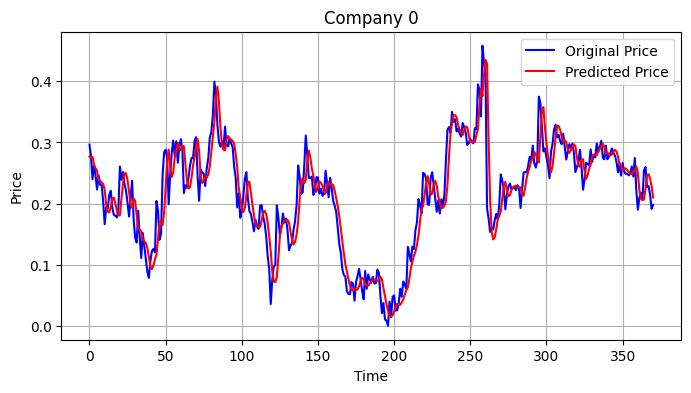

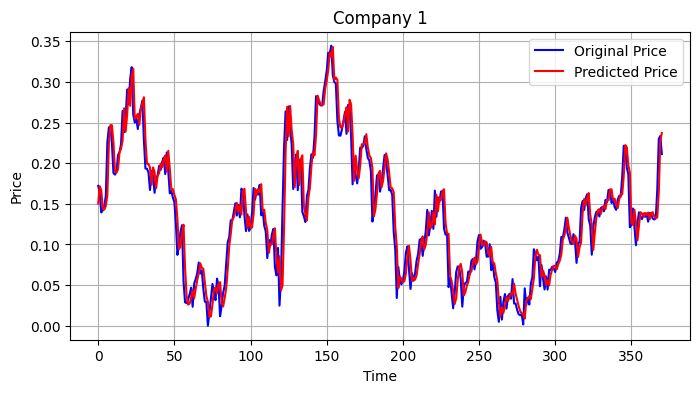

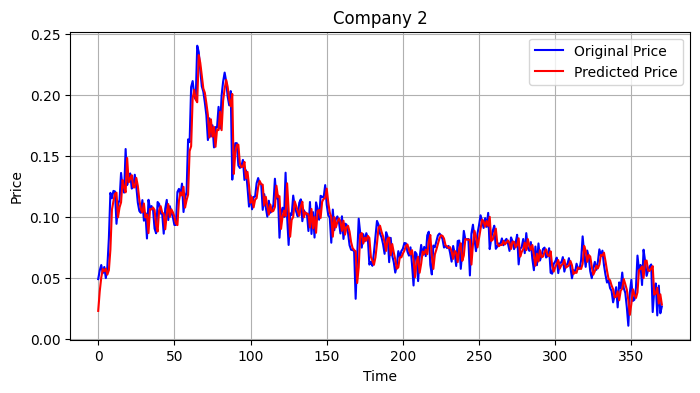

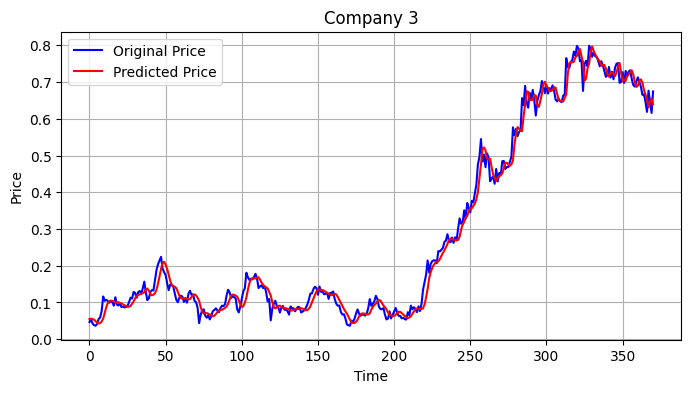

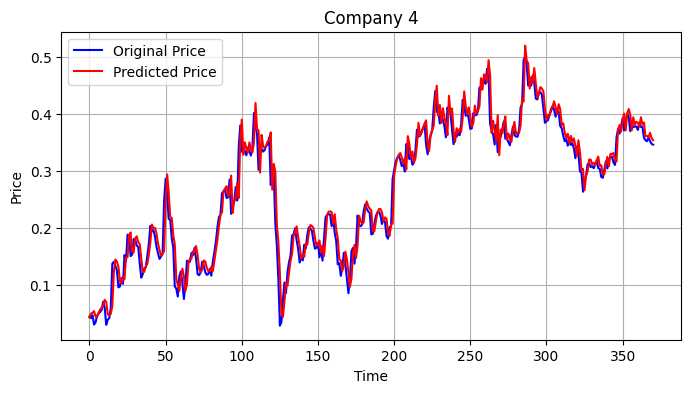

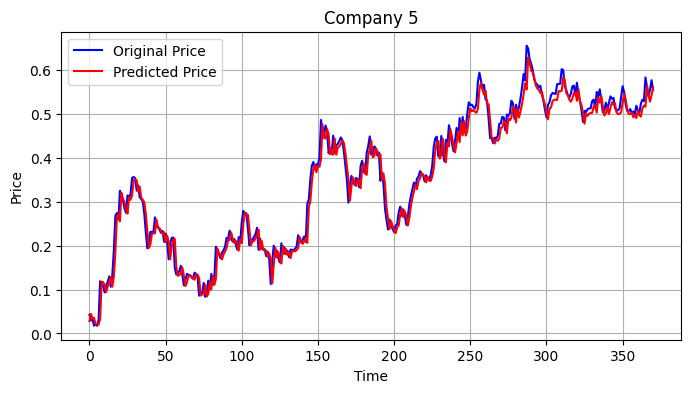

In [ ]:
features = ['y_test_0', 'y_test_1', 'y_test_2', 'y_test_3', 'y_test_4', 'y_test_5']
targets = ['y_pred_0', 'y_pred_1', 'y_pred_2', 'y_pred_3', 'y_pred_4', 'y_pred_5']



# Iterate over each company's data
for i, (feature, target) in enumerate(zip(features, targets)):
  plt.figure(figsize=(8, 4))
  plt.plot(eval(feature), 'b', label="Original Price")
  plt.plot(eval(target), 'r', label="Predicted Price")
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.title(f"Company {i}")
  plt.show()


# Working on Test data


In [ ]:
df2


,Date,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,2038-03-01,0,1,2,3,4,5
1,2038-03-02,6,7,8,9,10,11
2,2038-03-03,12,13,14,15,16,17
3,2038-03-06,18,19,20,21,22,23
4,2038-03-08,24,25,26,27,28,29
...,...,...,...,...,...,...,...
91,2038-07-17,546,547,548,549,550,551
92,2038-07-18,552,553,554,555,556,557
93,2038-07-19,558,559,560,561,562,563
94,2038-07-20,564,565,566,567,568,569


In [ ]:
#dropping date column
df3 = df2.drop(['Date'] , axis=1)
df3

,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
...,...,...,...,...,...,...
91,546,547,548,549,550,551
92,552,553,554,555,556,557
93,558,559,560,561,562,563
94,564,565,566,567,568,569


# Forecasting
####1.Checking the shape of x_test
####2.Reshaping the size for predicting closing prince of 1 day using last 10 days.
####3.Repeating the same process for next 96 days.
####4.Scale the test dataset according to given dataset to inverse MinMax scaler

## Company 1

In [ ]:
x_test_0.shape

(371, 10, 1)

In [ ]:
for sample in x_test_0:
    x_input_0 = sample[-10:].reshape((1, 10))
print( x_input_0.shape)

(1, 10)


In [ ]:
lst_output_0 = []
n_steps = 10
next_number_of_days = 96
temp_input_0 = list(x_input_0[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_0_model.h5')

i = 0
while i < next_number_of_days:
    if len(temp_input_0) > n_steps:
        x_input_0 = np.array(temp_input_0[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_0 = x_input_0.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_0 = model.predict(x_input_0, verbose=0)
        temp_input_0.append(yhat_0[0][0])  # Append predicted value to temp_input_0
        lst_output_0.append(yhat_0[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_0 = np.array(temp_input_0, dtype=float).reshape((1, len(temp_input_0), 1))  # Ensure dtype=float and reshape input directly
        yhat_0 = model.predict(x_input_0, verbose=0)
        temp_input_0.append(yhat_0[0][0])  # Append predicted value to temp_input_0
        lst_output_0.append(yhat_0[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_0)


[0.45794234, 0.44264197, 0.4383497, 0.43814042, 0.44005832, 0.44076145, 0.44094193, 0.4417245, 0.4420162, 0.44234562, 0.44329187, 0.44363996, 0.44412804, 0.44465688, 0.44519654, 0.44572335, 0.44625163, 0.4467891, 0.44732702, 0.44787234, 0.448426, 0.448979, 0.44953847, 0.45010337, 0.4506731, 0.45124742, 0.4518271, 0.4524116, 0.45300126, 0.4535961, 0.45419618, 0.45480138, 0.455412, 0.456028, 0.4566494, 0.45727623, 0.45790848, 0.4585463, 0.45918974, 0.4598389, 0.46049377, 0.46115437, 0.46182072, 0.46249312, 0.4631714, 0.4638557, 0.464546, 0.4652425, 0.46594515, 0.4666539, 0.46736908, 0.46809065, 0.46881852, 0.46955281, 0.47029382, 0.4710413, 0.47179538, 0.47255635, 0.47332397, 0.47409838, 0.47487983, 0.47566816, 0.47646368, 0.47726604, 0.47807577, 0.47889268, 0.4797169, 0.48054853, 0.4813876, 0.48223418, 0.4830882, 0.48395005, 0.48481947, 0.4856968, 0.48658186, 0.48747498, 0.488376, 0.48928517, 0.49020243, 0.491128, 0.49206185, 0.49300396, 0.49395466, 0.49491376, 0.4958815, 0.49685785, 0.

In [ ]:
lst_output_0 = np.array(lst_output_0)
minimum_0 = df['Close_Company_0'].min()
maximum_0 = df['Close_Company_0'].max()
lst_output_0=(lst_output_0*(maximum_0-minimum_0))+minimum_0
lst_output_0

array([208.63403, 205.46042, 204.57011, 204.5267 , 204.92451, 205.07036,
       205.10779, 205.27011, 205.33063, 205.39896, 205.59521, 205.66742,
       205.76866, 205.87836, 205.9903 , 206.09956, 206.20914, 206.32062,
       206.43219, 206.5453 , 206.66016, 206.77484, 206.8909 , 207.00806,
       207.12625, 207.24536, 207.3656 , 207.48685, 207.60916, 207.73253,
       207.857  , 207.98254, 208.10919, 208.23697, 208.36584, 208.49586,
       208.62701, 208.75931, 208.89276, 209.02742, 209.16325, 209.30028,
       209.43849, 209.57796, 209.71866, 209.8606 , 210.00377, 210.14824,
       210.29398, 210.441  , 210.58932, 210.73901, 210.88998, 211.0423 ,
       211.19598, 211.35103, 211.50745, 211.66528, 211.8245 , 211.98514,
       212.14722, 212.31073, 212.47574, 212.64218, 212.81012, 212.97957,
       213.15053, 213.32303, 213.49707, 213.67267, 213.84981, 214.02856,
       214.20891, 214.39088, 214.57446, 214.7597 , 214.9466 , 215.1352 ,
       215.32544, 215.51743, 215.71112, 215.90654, 

In [ ]:
len(lst_output_0)

96

## Company 2

In [ ]:
x_test_1.shape

(371, 10, 1)

In [ ]:
for sample in x_test_1:
    x_input_1 = sample[-10:].reshape((1, 10))
print( x_input_1.shape)

(1, 10)


In [ ]:
temp_input_1 = list(x_input_1)
temp_input_1 = temp_input_1[0].tolist()

In [ ]:
lst_output_1 = []
n_steps = 10
next_number_of_days = 96
temp_input_1 = list(x_input_1[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_1_model.h5')

i = 0
while i < next_number_of_days:
    if len(temp_input_1) > n_steps:
        x_input_1 = np.array(temp_input_1[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_1 = x_input_1.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_1 = model.predict(x_input_1, verbose=0)
        temp_input_1.append(yhat_1[0][0])  # Append predicted value to temp_input_0
        lst_output_1.append(yhat_1[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_1 = np.array(temp_input_1, dtype=float).reshape((1, len(temp_input_1), 1))  # Ensure dtype=float and reshape input directly
        yhat_1 = model.predict(x_input_1, verbose=0)
        temp_input_1.append(yhat_1[0][0])  # Append predicted value to temp_input_0
        lst_output_1.append(yhat_1[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_1)


[0.688184, 0.6937147, 0.69605166, 0.6982086, 0.7019901, 0.7079636, 0.71594334, 0.7254087, 0.7355055, 0.74534875, 0.7548464, 0.76401407, 0.7729059, 0.7815952, 0.79014266, 0.7985819, 0.80692047, 0.8151472, 0.82324266, 0.8311857, 0.8389602, 0.846555, 0.85396224, 0.86117697, 0.86819595, 0.8750167, 0.8816361, 0.8880525, 0.89426464, 0.90027153, 0.90607303, 0.9116697, 0.9170627, 0.92225426, 0.92724663, 0.93204284, 0.9366464, 0.94106114, 0.94529104, 0.94934046, 0.9532139, 0.9569164, 0.960453, 0.9638283, 0.9670481, 0.9701173, 0.97304106, 0.97582513, 0.9784743, 0.98099416, 0.9833897, 0.9856658, 0.98782754, 0.98987985, 0.9918276, 0.9936753, 0.9954275, 0.9970885, 0.9986625, 1.0001534, 1.0015656, 1.0029025, 1.0041682, 1.005366, 1.0064992, 1.0075712, 1.0085847, 1.0095431, 1.010449, 1.0113055, 1.0121151, 1.01288, 1.0136023, 1.0142845, 1.0149289, 1.0155374, 1.0161119, 1.0166544, 1.0171665, 1.0176497, 1.018106, 1.0185366, 1.0189428, 1.0193264, 1.0196882, 1.0200298, 1.0203518, 1.0206554, 1.0209419, 1.02

In [ ]:
lst_output_1 = np.array(lst_output_1)
minimum_1 = df['Close_Company_1'].min()
maximum_1 = df['Close_Company_1'].max()
lst_output_1=(lst_output_1*(maximum_1-minimum_1))+minimum_1
lst_output_1

array([104.86774 , 105.337906, 105.53656 , 105.719925, 106.0414  ,
       106.549194, 107.22755 , 108.032196, 108.89052 , 109.72729 ,
       110.53468 , 111.31401 , 112.0699  , 112.80858 , 113.53519 ,
       114.25261 , 114.96147 , 115.66081 , 116.349014, 117.02425 ,
       117.68515 , 118.33078 , 118.960464, 119.57378 , 120.170456,
       120.75029 , 121.313   , 121.85846 , 122.38655 , 122.89719 ,
       123.39038 , 123.866135, 124.3246  , 124.76593 , 125.19034 ,
       125.59805 , 125.989395, 126.3647  , 126.72427 , 127.06851 ,
       127.3978  , 127.71254 , 128.01318 , 128.30013 , 128.57384 ,
       128.83475 , 129.0833  , 129.31996 , 129.54517 , 129.75938 ,
       129.96303 , 130.15651 , 130.34029 , 130.51476 , 130.68033 ,
       130.8374  , 130.98634 , 131.12755 , 131.26135 , 131.38809 ,
       131.50815 , 131.6218  , 131.72939 , 131.83122 , 131.92755 ,
       132.01868 , 132.10484 , 132.18631 , 132.26332 , 132.33612 ,
       132.40495 , 132.46997 , 132.53137 , 132.58937 , 132.644

## Company 3

In [ ]:
x_test_2.shape

(371, 10, 1)

In [ ]:
for sample in x_test_2:
    x_input_2 = sample[-10:].reshape((1, 10))
print( x_input_2.shape)

(1, 10)


In [ ]:
lst_output_2 = []
n_steps = 10
next_number_of_days = 96
temp_input_2 = list(x_input_2[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_2_model.h5')

i = 0
while i < next_number_of_days:
    if len(temp_input_2) > n_steps:
        x_input_2 = np.array(temp_input_2[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_2 = x_input_2.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_2 = model.predict(x_input_2, verbose=0)
        temp_input_2.append(yhat_2[0][0])  # Append predicted value to temp_input_0
        lst_output_2.append(yhat_2[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_2 = np.array(temp_input_2, dtype=float).reshape((1, len(temp_input_2), 1))  # Ensure dtype=float and reshape input directly
        yhat_2 = model.predict(x_input_2, verbose=0)
        temp_input_2.append(yhat_2[0][0])  # Append predicted value to temp_input_0
        lst_output_2.append(yhat_2[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_2)


[0.11653508, 0.11443212, 0.114452824, 0.11482111, 0.11532844, 0.115740955, 0.11623473, 0.11678585, 0.11725107, 0.117813535, 0.118296005, 0.118791796, 0.119276956, 0.11975349, 0.12022164, 0.12068153, 0.1211332, 0.1215768, 0.12201258, 0.12244055, 0.12286102, 0.12327404, 0.12367977, 0.12407836, 0.12446994, 0.124854654, 0.12523268, 0.12560405, 0.12596893, 0.12632751, 0.12667981, 0.12702598, 0.12736617, 0.12770046, 0.12802899, 0.12835185, 0.12866916, 0.12898098, 0.12928747, 0.12958871, 0.12988476, 0.13017575, 0.1304618, 0.13074294, 0.13101931, 0.13129097, 0.13155802, 0.13182056, 0.13207862, 0.1323323, 0.13258171, 0.13282688, 0.13306797, 0.13330497, 0.13353798, 0.1337671, 0.13399234, 0.13421382, 0.13443159, 0.1346457, 0.13485622, 0.13506323, 0.13526678, 0.13546696, 0.1356638, 0.13585739, 0.1360477, 0.13623491, 0.13641897, 0.1366, 0.13677804, 0.1369531, 0.13712528, 0.13729462, 0.13746116, 0.13762496, 0.13778605, 0.1379445, 0.13810033, 0.13825358, 0.13840434, 0.13855259, 0.13869846, 0.1388419,

In [ ]:
lst_output_2 = np.array(lst_output_2)
minimum_2 = df['Close_Company_2'].min()
maximum_2 = df['Close_Company_2'].max()
lst_output_2=(lst_output_2*(maximum_2-minimum_2))+minimum_2
lst_output_2

array([7.921433 , 7.8210464, 7.8220344, 7.8396153, 7.863833 , 7.883525 ,
       7.9070954, 7.9334035, 7.955611 , 7.9824615, 8.005493 , 8.02916  ,
       8.052319 , 8.0750675, 8.097414 , 8.119368 , 8.140928 , 8.162105 ,
       8.182907 , 8.203337 , 8.223408 , 8.243124 , 8.262491 , 8.281519 ,
       8.300211 , 8.318576 , 8.336622 , 8.354349 , 8.371767 , 8.388885 ,
       8.405702 , 8.422226 , 8.438465 , 8.454424 , 8.470106 , 8.485518 ,
       8.500666 , 8.515551 , 8.530181 , 8.544561 , 8.558693 , 8.572584 ,
       8.586239 , 8.599659 , 8.612852 , 8.62582  , 8.638567 , 8.6511   ,
       8.66342  , 8.675529 , 8.687435 , 8.699139 , 8.710647 , 8.72196  ,
       8.733084 , 8.74402  , 8.754772 , 8.765345 , 8.77574  , 8.785961 ,
       8.796011 , 8.805893 , 8.815609 , 8.825165 , 8.834562 , 8.843802 ,
       8.852888 , 8.861824 , 8.870609 , 8.8792515, 8.887751 , 8.896107 ,
       8.904326 , 8.912411 , 8.92036  , 8.928179 , 8.935869 , 8.943433 ,
       8.950871 , 8.958187 , 8.965384 , 8.972461 , 

## Company 4

In [ ]:
x_test_3.shape

(371, 10, 1)

In [ ]:
for sample in x_test_3:
    x_input_3 = sample[-10:].reshape((1, 10))
print( x_input_3.shape)

(1, 10)


In [ ]:
lst_output_3 = []
n_steps = 10
next_number_of_days = 96
temp_input_3 = list(x_input_3[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_3_model.h5')

i = 0
while i < next_number_of_days:
    if len(temp_input_3) > n_steps:
        x_input_3 = np.array(temp_input_3[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_3 = x_input_3.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_3 = model.predict(x_input_3, verbose=0)
        temp_input_3.append(yhat_3[0][0])  # Append predicted value to temp_input_0
        lst_output_3.append(yhat_3[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_3 = np.array(temp_input_3, dtype=float).reshape((1, len(temp_input_3), 1))  # Ensure dtype=float and reshape input directly
        yhat_3 = model.predict(x_input_3, verbose=0)
        temp_input_3.append(yhat_3[0][0])  # Append predicted value to temp_input_0
        lst_output_3.append(yhat_3[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_3)


[0.76058644, 0.75036335, 0.73955667, 0.72888476, 0.71842146, 0.70815355, 0.6980798, 0.68816465, 0.6784197, 0.66884285, 0.65941423, 0.6501199, 0.64094824, 0.63188803, 0.6229293, 0.61406237, 0.60527873, 0.59657, 0.58792895, 0.57934827, 0.5708214, 0.5623424, 0.55390537, 0.5455052, 0.5371371, 0.5287966, 0.5204795, 0.5121821, 0.5039012, 0.4956335, 0.48737636, 0.47912768, 0.4708852, 0.46264726, 0.45441264, 0.44618008, 0.43794915, 0.4297194, 0.42149085, 0.41326383, 0.40503922, 0.3968178, 0.38860115, 0.3803911, 0.3721897, 0.3639994, 0.3558231, 0.347664, 0.3395255, 0.3314116, 0.3233265, 0.3152745, 0.30726054, 0.2992897, 0.29136717, 0.28349864, 0.27568978, 0.26794657, 0.2602751, 0.25268158, 0.24517228, 0.23775347, 0.23043159, 0.22321269, 0.21610314, 0.20910907, 0.20223632, 0.1954906, 0.18887739, 0.18240182, 0.17606896, 0.16988315, 0.16384862, 0.15796912, 0.15224795, 0.14668803, 0.14129172, 0.13606103, 0.13099736, 0.12610172, 0.121374585, 0.11681606, 0.112425685, 0.108202636, 0.10414558, 0.100252

In [ ]:
lst_output_3 = np.array(lst_output_3)
minimum_3 = df['Close_Company_3'].min()
maximum_3 = df['Close_Company_3'].max()
lst_output_3=(lst_output_3*(maximum_3-minimum_3))+minimum_3
lst_output_3

array([91.17843 , 90.21764 , 89.20202 , 88.19905 , 87.21569 , 86.2507  ,
       85.303955, 84.37211 , 83.45627 , 82.55621 , 81.6701  , 80.7966  ,
       79.93463 , 79.083145, 78.24118 , 77.40785 , 76.58235 , 75.7639  ,
       74.9518  , 74.14537 , 73.344   , 72.547134, 71.7542  , 70.964745,
       70.1783  , 69.39444 , 68.61279 , 67.832985, 67.05473 , 66.277725,
       65.5017  , 64.72647 , 63.951836, 63.17762 , 62.403717, 61.63001 ,
       60.856453, 60.083004, 59.309673, 58.536484, 57.763523, 56.99086 ,
       56.218647, 55.447052, 54.676273, 53.906532, 53.13811 , 52.371307,
       51.606438, 50.84388 , 50.08403 , 49.32729 , 48.574127, 47.825012,
       47.08044 , 46.340942, 45.607056, 44.879333, 44.158356, 43.444706,
       42.738968, 42.041737, 41.353615, 40.67517 , 40.007004, 39.34969 ,
       38.70378 , 38.069805, 37.448284, 36.8397  , 36.24453 , 35.663174,
       35.09604 , 34.543472, 34.00579 , 33.48326 , 32.976105, 32.484516,
       32.008625, 31.548525, 31.104261, 30.675842, 

## Company 5

In [ ]:
x_test_4.shape

(371, 10, 1)

In [ ]:
for sample in x_test_4:
    x_input_4 = sample[-10:].reshape((1, 10))
print( x_input_4.shape)

(1, 10)


In [ ]:
lst_output_4 = []
n_steps = 10
next_number_of_days = 96
temp_input_4 = list(x_input_4[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_4_model.h5')

i = 0
while i < next_number_of_days:
    if len(temp_input_4) > n_steps:
        x_input_4 = np.array(temp_input_4[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_4 = x_input_4.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_4 = model.predict(x_input_4, verbose=0)
        temp_input_4.append(yhat_4[0][0])  # Append predicted value to temp_input_0
        lst_output_4.append(yhat_4[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_4 = np.array(temp_input_4, dtype=float).reshape((1, len(temp_input_4), 1))  # Ensure dtype=float and reshape input directly
        yhat_4 = model.predict(x_input_4, verbose=0)
        temp_input_4.append(yhat_4[0][0])  # Append predicted value to temp_input_0
        lst_output_4.append(yhat_4[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_4)


[0.7057091, 0.7222533, 0.73836106, 0.75393003, 0.7691535, 0.78421044, 0.7992146, 0.8142132, 0.829202, 0.8441732, 0.85911185, 0.8739795, 0.8887307, 0.90332055, 0.91770744, 0.9318521, 0.9457176, 0.95926845, 0.9724726, 0.9853009, 0.9977275, 1.0097301, 1.0212902, 1.0323935, 1.0430292, 1.053191, 1.0628755, 1.0720831, 1.0808176, 1.0890851, 1.0968949, 1.1042571, 1.1111848, 1.1176925, 1.1237956, 1.1295108, 1.1348546, 1.1398444, 1.1444981, 1.1488335, 1.152868, 1.1566184, 1.160101, 1.1633327, 1.1663291, 1.1691053, 1.1716753, 1.1740532, 1.1762524, 1.1782848, 1.180162, 1.1818954, 1.183495, 1.1849709, 1.1863319, 1.1875864, 1.1887431, 1.1898086, 1.1907897, 1.1916933, 1.1925254, 1.1932912, 1.1939962, 1.1946448, 1.1952415, 1.1957904, 1.1962951, 1.1967595, 1.1971865, 1.1975793, 1.1979401, 1.1982719, 1.1985768, 1.198857, 1.1991146, 1.1993514, 1.1995692, 1.1997691, 1.1999526, 1.2001213, 1.2002765, 1.2004191, 1.2005501, 1.2006704, 1.2007805, 1.2008821, 1.2009755, 1.2010612, 1.2011397, 1.2012117, 1.2012779

In [ ]:
lst_output_4 = np.array(lst_output_4)
minimum_4 = df['Close_Company_4'].min()
maximum_4 = df['Close_Company_4'].max()
lst_output_4=(lst_output_4*(maximum_4-minimum_4))+minimum_4
lst_output_4

array([ 8119.216 ,  8215.511 ,  8309.265 ,  8399.883 ,  8488.49  ,
        8576.128 ,  8663.459 ,  8750.758 ,  8837.999 ,  8925.138 ,
        9012.087 ,  9098.623 ,  9184.481 ,  9269.401 ,  9353.139 ,
        9435.467 ,  9516.17  ,  9595.042 ,  9671.896 ,  9746.5625,
        9818.891 ,  9888.751 ,  9956.036 , 10020.662 , 10082.566 ,
       10141.713 , 10198.081 , 10251.673 , 10302.512 , 10350.632 ,
       10396.089 , 10438.94  , 10479.263 , 10517.14  , 10552.663 ,
       10585.928 , 10617.03  , 10646.074 , 10673.16  , 10698.395 ,
       10721.877 , 10743.705 , 10763.977 , 10782.786 , 10800.227 ,
       10816.385 , 10831.344 , 10845.184 , 10857.984 , 10869.813 ,
       10880.739 , 10890.829 , 10900.14  , 10908.7295, 10916.651 ,
       10923.953 , 10930.686 , 10936.888 , 10942.598 , 10947.857 ,
       10952.7   , 10957.157 , 10961.261 , 10965.036 , 10968.509 ,
       10971.704 , 10974.642 , 10977.345 , 10979.83  , 10982.116 ,
       10984.216 , 10986.147 , 10987.922 , 10989.553 , 10991.0

## Company 6

In [ ]:
x_test_5.shape


(371, 10, 1)

In [ ]:
for sample in x_test_5:
    x_input_5 = sample[-10:].reshape((1, 10))
print( x_input_5.shape)

(1, 10)


In [ ]:
lst_output_5 = []
n_steps = 10
next_number_of_days = 96
temp_input_5 = list(x_input_5[0])  # Convert x_input_0 to a list

# Access the model for company 0
from tensorflow.keras.models import load_model
model = load_model('/content/Company_5_model.h5')

i = 0
while i < next_number_of_days:
    if len(temp_input_5) > n_steps:
        x_input_5 = np.array(temp_input_5[-n_steps:], dtype=float)  # Ensure dtype=float
        x_input_5 = x_input_5.reshape((1, n_steps, 1))  # Reshape input directly
        yhat_5 = model.predict(x_input_5, verbose=0)
        temp_input_5.append(yhat_5[0][0])  # Append predicted value to temp_input_0
        lst_output_5.append(yhat_5[0][0])  # Append predicted value to lst_output_0
    else:
        x_input_5 = np.array(temp_input_5, dtype=float).reshape((1, len(temp_input_5), 1))  # Ensure dtype=float and reshape input directly
        yhat_5 = model.predict(x_input_5, verbose=0)
        temp_input_5.append(yhat_5[0][0])  # Append predicted value to temp_input_0
        lst_output_5.append(yhat_5[0][0])  # Append predicted value to lst_output_0
    i += 1

print(lst_output_5)

[0.8549505, 0.8304515, 0.8120105, 0.7973801, 0.78446597, 0.77244806, 0.7610672, 0.75023115, 0.7398969, 0.7300431, 0.7206566, 0.7117024, 0.7031412, 0.6949366, 0.68705744, 0.6794766, 0.6721705, 0.6651177, 0.6582988, 0.65169656, 0.6452948, 0.6390791, 0.63303596, 0.6271536, 0.6214203, 0.61582625, 0.610362, 0.6050185, 0.599788, 0.5946626, 0.58963543, 0.58470017, 0.5798506, 0.57508117, 0.57038647, 0.5657616, 0.5612019, 0.55670303, 0.5522606, 0.5478711, 0.5435306, 0.53923553, 0.53498256, 0.53076875, 0.52659094, 0.52244633, 0.5183321, 0.51424575, 0.5101849, 0.5061469, 0.5021297, 0.49813095, 0.49414864, 0.49018073, 0.48622528, 0.48228028, 0.47834405, 0.4744148, 0.47049084, 0.46657056, 0.4626525, 0.458735, 0.45481646, 0.45089564, 0.44697115, 0.4430416, 0.43910572, 0.4351622, 0.43120983, 0.42724764, 0.42327428, 0.41928884, 0.4152903, 0.4112776, 0.40724984, 0.4032061, 0.39914554, 0.39506748, 0.39097115, 0.3868558, 0.38272083, 0.3785658, 0.37439016, 0.3701934, 0.36597535, 0.3617356, 0.35747397, 0.3

In [ ]:
lst_output_5 = np.array(lst_output_5)
minimum_5 = df['Close_Company_5'].min()
maximum_5 = df['Close_Company_5'].max()
lst_output_5=(lst_output_5*(maximum_5-minimum_5))+minimum_5
lst_output_5

array([166.09085 , 163.52475 , 161.59317 , 160.06073 , 158.70807 ,
       157.44926 , 156.2572  , 155.1222  , 154.03973 , 153.00761 ,
       152.02444 , 151.08655 , 150.18982 , 149.33044 , 148.50514 ,
       147.7111  , 146.94583 , 146.20709 , 145.49286 , 144.80133 ,
       144.13077 , 143.47972 , 142.84674 , 142.2306  , 141.63008 ,
       141.04413 , 140.4718  , 139.9121  , 139.36423 , 138.8274  ,
       138.30081 , 137.78387 , 137.27592 , 136.77635 , 136.2846  ,
       135.8002  , 135.32259 , 134.85136 , 134.38605 , 133.92627 ,
       133.47163 , 133.02176 , 132.57628 , 132.13492 , 131.69731 ,
       131.2632  , 130.83226 , 130.40424 , 129.97888 , 129.55594 ,
       129.13516 , 128.71631 , 128.2992  , 127.88358 , 127.46927 ,
       127.05606 , 126.64377 , 126.2322  , 125.8212  , 125.41057 ,
       125.00018 , 124.58984 , 124.1794  , 123.76872 , 123.35766 ,
       122.94606 , 122.5338  , 122.12074 , 121.70676 , 121.29175 ,
       120.875565, 120.458115, 120.03929 , 119.61899 , 119.197

# Plotting the test result

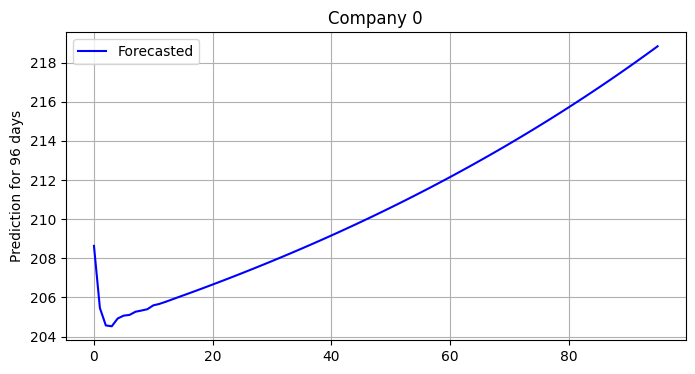

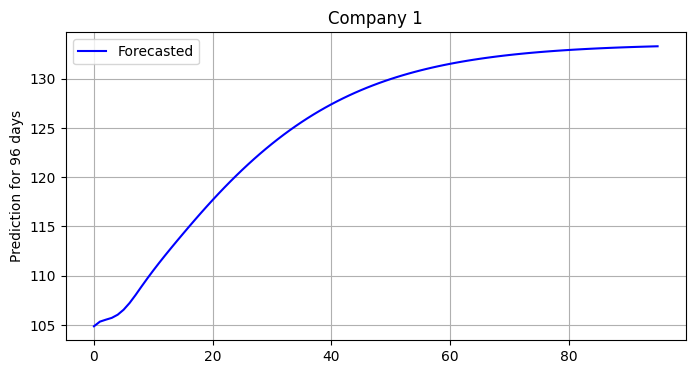

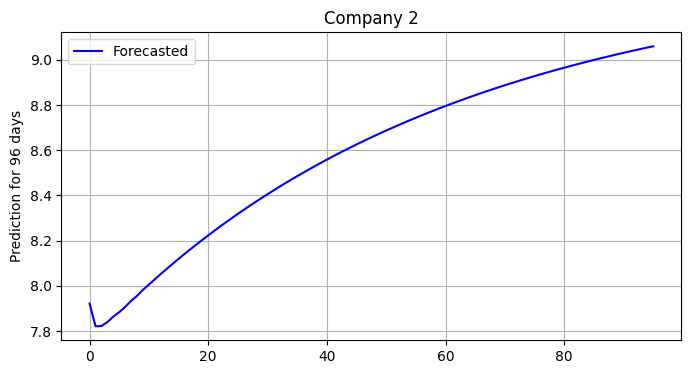

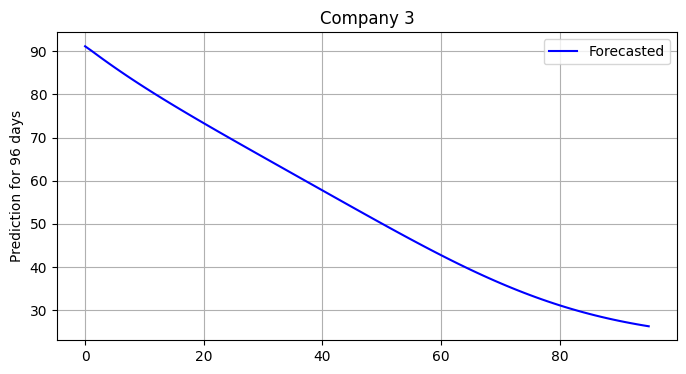

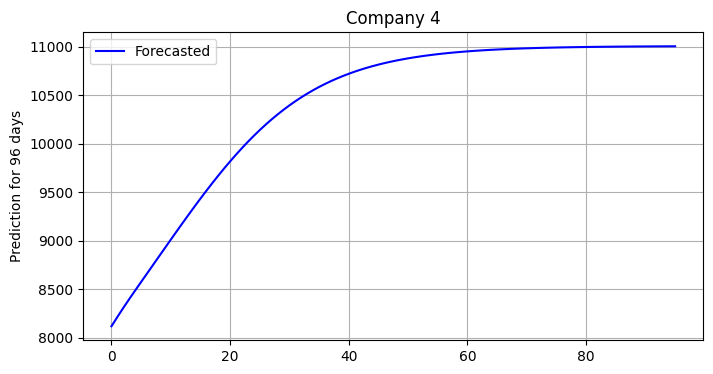

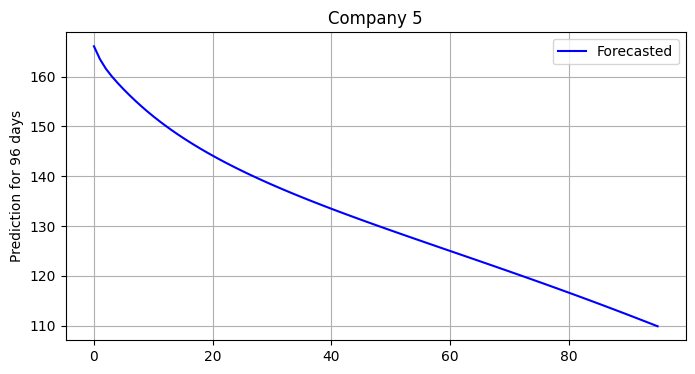

In [ ]:
features = ['lst_output_0', 'lst_output_1', 'lst_output_2', 'lst_output_3', 'lst_output_4', 'lst_output_5']



# Iterate over each company's data
for i, (feature, target) in enumerate(zip(features, targets)):
  plt.figure(figsize=(8, 4))
  plt.plot(eval(feature), 'b', label="Forecasted")
  plt.ylabel('Prediction for 96 days')
  plt.legend()
  plt.grid(True)
  plt.title(f"Company {i}")
  plt.show()


# Converting the predicted result data in submission form

In [ ]:
test_d

,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
...,...,...,...,...,...,...
91,546,547,548,549,550,551
92,552,553,554,555,556,557
93,558,559,560,561,562,563
94,564,565,566,567,568,569


In [ ]:
test_d["Id_Company_0"] = lst_output_0.data
test_d["Id_Company_1"] = lst_output_1.data
test_d["Id_Company_2"] = lst_output_2.data
test_d["Id_Company_3"] = lst_output_3.data
test_d["Id_Company_4"] = lst_output_4.data
test_d["Id_Company_5"] = lst_output_5.data

In [ ]:
test_d

,Id_Company_0,Id_Company_1,Id_Company_2,Id_Company_3,Id_Company_4,Id_Company_5
0,208.634033,104.867737,7.921433,91.178429,8119.215820,166.090851
1,205.460419,105.337906,7.821046,90.217644,8215.510742,163.524750
2,204.570114,105.536560,7.822034,89.202019,8309.264648,161.593170
3,204.526703,105.719925,7.839615,88.199051,8399.882812,160.060730
4,204.924515,106.041397,7.863833,87.215691,8488.490234,158.708069
...,...,...,...,...,...,...
91,217.959671,133.220398,9.037170,27.235054,11003.999023,111.717056
92,218.175232,133.239685,9.043074,26.970036,11004.325195,111.257004
93,218.392670,133.257858,9.048881,26.718082,11004.624023,110.794800
94,218.612061,133.275009,9.054594,26.478792,11004.897461,110.330490


In [ ]:
# Create an empty list to store the concatenated values
concatenated_values = []
data = range(576)
# Iterate over each row and column
for index, row in test_d.iterrows():
    for column in test_d.columns:
        concatenated_values.append(row[column])

# Create a DataFrame from the concatenated values
result_df = pd.DataFrame({'Id': data, 'Close': concatenated_values})

# Display the result DataFrame
result_df

,Id,Close
0,0,208.634033
1,1,104.867737
2,2,7.921433
3,3,91.178429
4,4,8119.215820
...,...,...
571,571,133.291183
572,572,9.060217
573,573,26.251762
574,574,11005.151367


In [ ]:
# Assuming result_df is your DataFrame
result_df.to_csv('submission3.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful